# Radiation Forcasting

## Data Preprocessing

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
pd.set_option('display.max_columns', None)

In [2]:
# View a single year (2005) data
path = "../datasets/solar_weather_data/"
pd.read_csv(path + "2005.csv", skiprows=2)

Year  Month  Day  Hour  Minute  Solar Zenith Angle  Surface Albedo  \
0     2005      1    1     0      30              161.43            0.14   
1     2005      1    1     1      30              150.95            0.14   
2     2005      1    1     2      30              138.11            0.14   
3     2005      1    1     3      30              124.56            0.14   
4     2005      1    1     4      30              110.80            0.14   
...    ...    ...  ...   ...     ...                 ...             ...   
8755  2005     12   31    19      30              116.42            0.12   
8756  2005     12   31    20      30              130.12            0.12   
8757  2005     12   31    21      30              143.47            0.12   
8758  2005     12   31    22      30              155.69            0.12   
8759  2005     12   31    23      30              163.85            0.12   

      Precipitable Water  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
0                    3.8             0             0             0   
1                    3.7             0             0             0   
2                    3.6             0             0             0   
3                    3.5             0             0             0   
4                    3.4             0             0             0   
...                  ...           ...           ...           ...   
8755                 3.6             0             0             0   
8756                 3.6             0             0             0   
8757                 3.6             0             0             0   
8758                 3.7             0             0             0   
8759                 3.6             0             0             0   

      Cloud Type  Dew Point  Relative Humidity  Pressure  DHI  DNI  Fill Flag  \
0              0       22.6             100.00       988    0    0          0   
1              0       22.4             100.00       987    0    0          0   
2              0       22.3             100.00       987    0    0          0   
3              0       22.0             100.00       988    0    0          0   
4              0       21.7             100.00       988    0    0          0   
...          ...        ...                ...       ...  ...  ...        ...   
8755           0       22.6              91.69       985    0    0          0   
8756           0       22.8              95.52       986    0    0          0   
8757           0       23.1              99.28       986    0    0          0   
8758           0       22.8             100.00       986    0    0          0   
8759           0       22.5             100.00       985    0    0          0   

      GHI  Temperature  Wind Direction  Wind Speed  
0       0         22.6             224         0.8  
1       0         22.4             240         0.7  
2       0         22.3             260         0.7  
3       0         22.0             281         0.8  
4       0         21.7             301         0.9  
...   ...          ...             ...         ...  
8755    0         24.0             185         1.5  
8756    0         23.6             179         1.3  
8757    0         23.2             176         1.2  
8758    0         22.8             175         1.1  
8759    0         22.5             178         1.0  

[8760 rows x 22 columns]

In [3]:
# Merge all data
# Directory containing your CSV files
directory = "../datasets/solar_weather_data/"
merged_df = pd.DataFrame()

# Iterate through the files in the directory
for year in range(2005, 2023):
    file_path = os.path.join(directory, str(year) + '.csv')
    df = pd.read_csv(file_path, skiprows=2)
    merged_df = pd.concat([merged_df, df], ignore_index=True)


In [4]:
merged_df.head()

Year  Month  Day  Hour  Minute  Solar Zenith Angle  Surface Albedo  \
0  2005      1    1     0      30              161.43            0.14   
1  2005      1    1     1      30              150.95            0.14   
2  2005      1    1     2      30              138.11            0.14   
3  2005      1    1     3      30              124.56            0.14   
4  2005      1    1     4      30              110.80            0.14   

   Precipitable Water  Clearsky DHI  Clearsky DNI  Clearsky GHI  Cloud Type  \
0                 3.8             0             0             0           0   
1                 3.7             0             0             0           0   
2                 3.6             0             0             0           0   
3                 3.5             0             0             0           0   
4                 3.4             0             0             0           0   

   Dew Point  Relative Humidity  Pressure  DHI  DNI  Fill Flag  GHI  \
0       22.6              100.0       988    0    0          0    0   
1       22.4              100.0       987    0    0          0    0   
2       22.3              100.0       987    0    0          0    0   
3       22.0              100.0       988    0    0          0    0   
4       21.7              100.0       988    0    0          0    0   

   Temperature  Wind Direction  Wind Speed  
0         22.6             224         0.8  
1         22.4             240         0.7  
2         22.3             260         0.7  
3         22.0             281         0.8  
4         21.7             301         0.9

In [5]:
import pandas as pd

# The `adjust_time` function below rounds timestamps to the nearest hour.
# Since the dataset contains times like 7:30, 8:30 instead of exact hour marks,
# we round them to the closest full hour (e.g., 7:30 → 8:00, 8:30 → 9:00)
# to maintain consistency in time-based analysis for the training.

def adjust_time(row):
    if row['Minute'] == 30:
        if row['Hour'] == 23:
            # Leave the hour as 23 and set minute to 59
            return pd.Series({'Hour': row['Hour'], 'Minute': 59})
        else:
            # Increment hour and set minute to 0
            return pd.Series({'Hour': row['Hour'] + 1, 'Minute': 0})
    else:
        # Leave hour and minute unchanged
        return pd.Series({'Hour': row['Hour'], 'Minute': row['Minute']})

# Apply the function to update the time
merged_df[['Hour', 'Minute']] = merged_df.apply(adjust_time, axis=1).astype(int)

# Display the modified DataFrame
merged_df.head()


Year  Month  Day  Hour  Minute  Solar Zenith Angle  Surface Albedo  \
0  2005      1    1     1       0              161.43            0.14   
1  2005      1    1     2       0              150.95            0.14   
2  2005      1    1     3       0              138.11            0.14   
3  2005      1    1     4       0              124.56            0.14   
4  2005      1    1     5       0              110.80            0.14   

   Precipitable Water  Clearsky DHI  Clearsky DNI  Clearsky GHI  Cloud Type  \
0                 3.8             0             0             0           0   
1                 3.7             0             0             0           0   
2                 3.6             0             0             0           0   
3                 3.5             0             0             0           0   
4                 3.4             0             0             0           0   

   Dew Point  Relative Humidity  Pressure  DHI  DNI  Fill Flag  GHI  \
0       22.6              100.0       988    0    0          0    0   
1       22.4              100.0       987    0    0          0    0   
2       22.3              100.0       987    0    0          0    0   
3       22.0              100.0       988    0    0          0    0   
4       21.7              100.0       988    0    0          0    0   

   Temperature  Wind Direction  Wind Speed  
0         22.6             224         0.8  
1         22.4             240         0.7  
2         22.3             260         0.7  
3         22.0             281         0.8  
4         21.7             301         0.9

In [6]:
# Save the merged dataframe to a new CSV file
merged_df.to_csv("../datasets/merged_data.csv", index=False)

merged_df.shape

(157776, 22)

In [8]:
merged_df.head(25)

Year  Month  Day  Hour  Minute  Solar Zenith Angle  Surface Albedo  \
0   2005      1    1     1       0              161.43            0.14   
1   2005      1    1     2       0              150.95            0.14   
2   2005      1    1     3       0              138.11            0.14   
3   2005      1    1     4       0              124.56            0.14   
4   2005      1    1     5       0              110.80            0.14   
5   2005      1    1     6       0               97.01            0.14   
6   2005      1    1     7       0               83.23            0.14   
7   2005      1    1     8       0               69.93            0.14   
8   2005      1    1     9       0               57.14            0.14   
9   2005      1    1    10       0               45.42            0.14   
10  2005      1    1    11       0               35.91            0.14   
11  2005      1    1    12       0               30.73            0.14   
12  2005      1    1    13       0               32.09            0.14   
13  2005      1    1    14       0               39.31            0.14   
14  2005      1    1    15       0               49.90            0.14   
15  2005      1    1    16       0               62.13            0.14   
16  2005      1    1    17       0               75.18            0.14   
17  2005      1    1    18       0               88.44            0.14   
18  2005      1    1    19       0              102.49            0.14   
19  2005      1    1    20       0              116.29            0.14   
20  2005      1    1    21       0              130.01            0.14   
21  2005      1    1    22       0              143.37            0.14   
22  2005      1    1    23       0              155.64            0.14   
23  2005      1    1    23      59              163.91            0.14   
24  2005      1    2     1       0              161.56            0.14   

    Precipitable Water  Clearsky DHI  Clearsky DNI  Clearsky GHI  Cloud Type  \
0                  3.8             0             0             0           0   
1                  3.7             0             0             0           0   
2                  3.6             0             0             0           0   
3                  3.5             0             0             0           0   
4                  3.4             0             0             0           0   
5                  3.4             0             0             0           0   
6                  3.3            29            23            32           0   
7                  3.2           156           189           221           0   
8                  3.1           240           362           436           0   
9                  3.0           207           652           665           0   
10                 2.8           210           732           803           0   
11                 2.7           208           767           868           0   
12                 2.6           240           700           833           0   
13                 2.5           226           673           746           0   
14                 2.5           203           603           591           0   
15                 2.5           177           422           374           0   
16                 2.5           101           217           156           0   
17                 2.5             3             4             3           0   
18                 2.5             0             0             0           0   
19                 2.5             0             0             0           0   
20                 2.5             0             0             0           0   
21                 2.5             0             0             0           0   
22                 2.6             0             0             0           0   
23                 2.6             0             0             0           0   
24                 2.7             0             0             0           0   

## Exploratory Data Analysis

In [9]:
merged_df = pd.read_csv("../datasets/merged_data.csv") 

In [10]:
merged_df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Solar Zenith Angle',
       'Surface Albedo', 'Precipitable Water', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Cloud Type', 'Dew Point', 'Relative Humidity',
       'Pressure', 'DHI', 'DNI', 'Fill Flag', 'GHI', 'Temperature',
       'Wind Direction', 'Wind Speed'],
      dtype='object')

In [14]:
# Select relevant columns
cols = ['Precipitable Water', 'Dew Point', 
        'Relative Humidity', 'Pressure', 'Temperature','Wind Direction', 
        'Wind Speed','Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
        'DHI', 'DNI', 'GHI'
       ]

stat = merged_df[cols].describe().T.round(2)
stat['range'] = stat.apply(lambda x: f"{x['min']} - {x['max']}", axis=1)
stat

count    mean     std     min     25%    50%    75%  \
Precipitable Water  157776.0    4.65    0.99    0.80    4.20    4.9    5.4   
Dew Point           157776.0   22.81    2.49    5.00   22.40   23.4   24.2   
Relative Humidity   157776.0   88.44   13.87   19.28   79.95   94.4  100.0   
Pressure            157776.0  987.37    1.92  980.00  986.00  987.0  989.0   
Temperature         157776.0   25.11    2.91   11.30   23.00   24.6   27.3   
Wind Direction      157776.0  198.79   59.40    1.00  190.00  210.0  229.0   
Wind Speed          157776.0    1.50    0.77    0.10    0.90    1.3    2.0   
Clearsky DHI        157776.0   94.45  123.89    0.00    0.00    0.0  172.0   
Clearsky DNI        157776.0  237.70  299.11    0.00    0.00    0.0  524.0   
Clearsky GHI        157776.0  268.96  346.26    0.00    0.00    0.0  589.0   
DHI                 157776.0  117.39  161.45    0.00    0.00    0.0  220.0   
DNI                 157776.0  115.92  211.62    0.00    0.00    0.0  133.0   
GHI                 157776.0  201.81  284.82    0.00    0.00    0.0  392.0   

                       max          range  
Precipitable Water     6.9      0.8 - 6.9  
Dew Point             27.3     5.0 - 27.3  
Relative Humidity    100.0  19.28 - 100.0  
Pressure             994.0  980.0 - 994.0  
Temperature           35.5    11.3 - 35.5  
Wind Direction       360.0    1.0 - 360.0  
Wind Speed             5.6      0.1 - 5.6  
Clearsky DHI         670.0    0.0 - 670.0  
Clearsky DNI         934.0    0.0 - 934.0  
Clearsky GHI        1021.0   0.0 - 1021.0  
DHI                  740.0    0.0 - 740.0  
DNI                  921.0    0.0 - 921.0  
GHI                 1020.0   0.0 - 1020.0

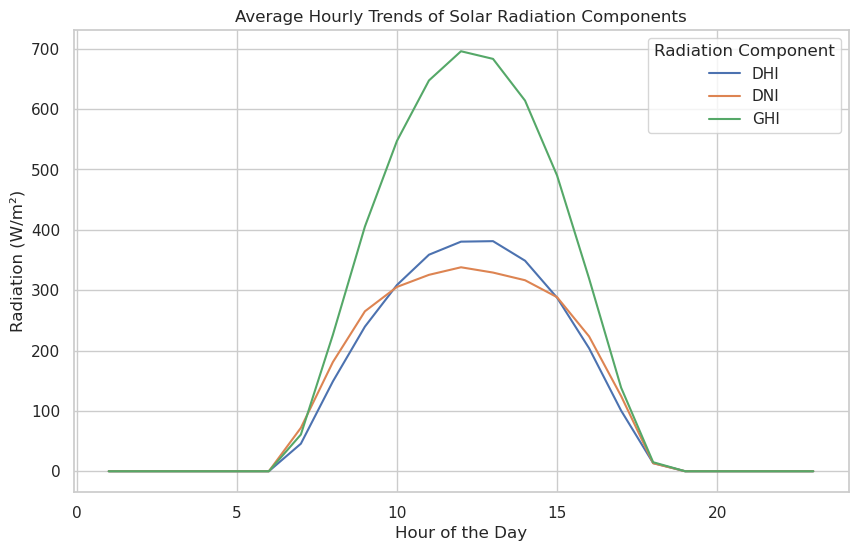

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Year', 'Month', 'Day', 'Hour', 'Temperature', 'Clearsky DHI', 
        'Clearsky DNI', 'Clearsky GHI', 'DHI', 'DNI', 'GHI']

# Group by Hour and calculate the mean
hourly_mean = merged_df[cols].groupby('Hour')[['DHI', 'DNI', 'GHI']].mean().reset_index()

# Plot the hourly data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_mean, x='Hour', y='DHI', label='DHI',)
sns.lineplot(data=hourly_mean, x='Hour', y='DNI', label='DNI',)
sns.lineplot(data=hourly_mean, x='Hour', y='GHI', label='GHI',)

# Add plot details
plt.title('Average Hourly Trends of Solar Radiation Components')
plt.xlabel('Hour of the Day')
plt.ylabel('Radiation (W/m²)')
plt.legend(title='Radiation Component')
plt.show()


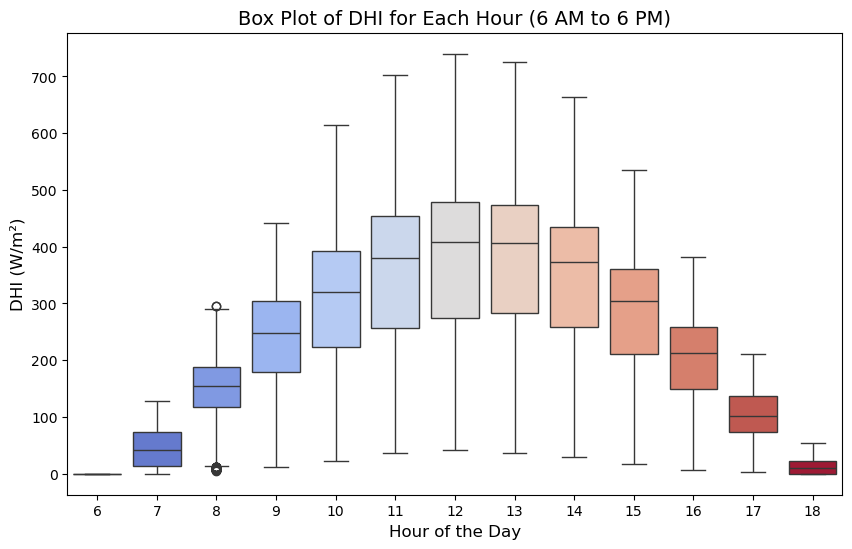

In [20]:

# Filter the data to only include hours from 6 AM to 6 PM
filtered_df = merged_df[(merged_df['Hour'] >= 6) & (merged_df['Hour'] <= 18)]

# Create a box plot for GHI by Hour (for hours between 6 AM and 6 PM)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='DHI', hue='Hour', palette='coolwarm', legend=False, data=filtered_df)

# Add labels and title
plt.title('Box Plot of DHI for Each Hour (6 AM to 6 PM)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('DHI (W/m²)', fontsize=12)

# Display the plot
plt.show()


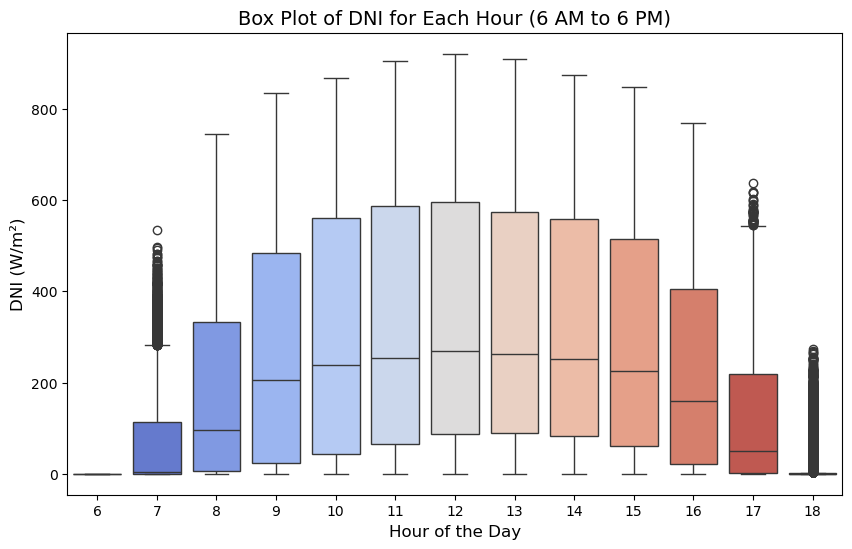

In [21]:
# Create a box plot for DNI by Hour (for hours between 6 AM and 6 PM)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='DNI', hue='Hour', palette='coolwarm', legend=False, data=filtered_df)

# Add labels and title
plt.title('Box Plot of DNI for Each Hour (6 AM to 6 PM)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('DNI (W/m²)', fontsize=12)

# Display the plot
plt.show()


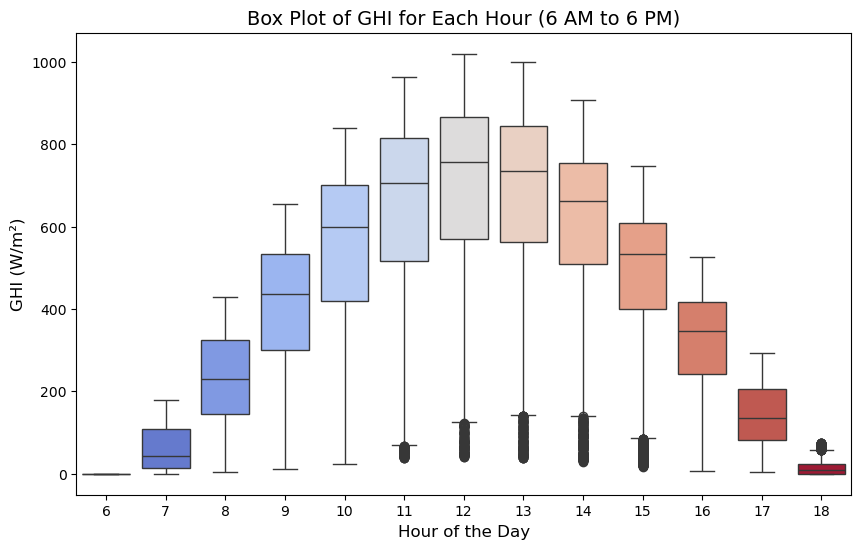

In [22]:
# Create a box plot for GHI by Hour (for hours between 6 AM and 6 PM)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='GHI', hue='Hour', palette='coolwarm', legend=False, data=filtered_df)

# Add labels and title
plt.title('Box Plot of GHI for Each Hour (6 AM to 6 PM)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('GHI (W/m²)', fontsize=12)

# Display the plot
plt.show()


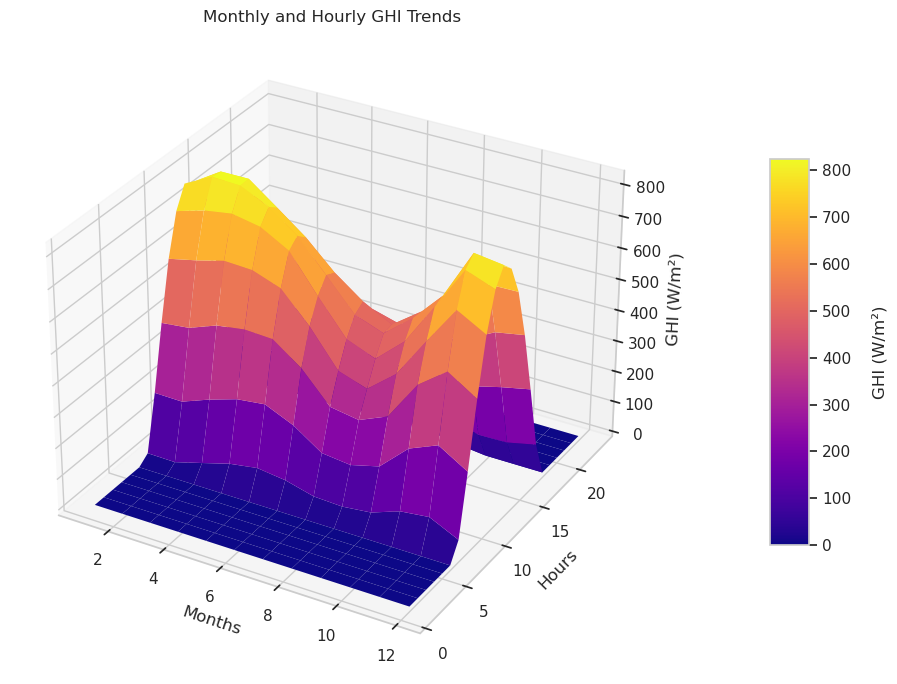

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a pivot table for Months (x-axis), Hours (y-axis), and GHI (z-axis)
pivot_table = merged_df.pivot_table(
    values='GHI',
    index='Hour',
    columns='Month',
    aggfunc='mean'
)

# Extract X, Y, and Z values from the pivot table
x = pivot_table.columns.values  # Months
y = pivot_table.index.values    # Hours
X, Y = np.meshgrid(x, y)        # Create a meshgrid
Z = pivot_table.values          # GHI values

# Create a 3D surface plot
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(
    X, Y, Z,
    cmap='plasma',
    edgecolor='none'
)

# Add color bar for intensity
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10, pad=0.1)
cbar.set_label('GHI (W/m²)', labelpad=15)

# Set axis labels
ax.set_xlabel('Months')
ax.set_ylabel('Hours')
ax.set_zlabel('GHI (W/m²)')
ax.set_title('Monthly and Hourly GHI Trends')

# Show plot
plt.tight_layout()
plt.show()


In [23]:
cols = ['Precipitable Water', 'Dew Point', 'Relative Humidity', 'Pressure',
        'Temperature','Wind Direction','Wind Speed','Cloud Type',
        'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
        'DHI', 'DNI', 'GHI'
       ]

# Calculate correlation matrix
corr_matrix = merged_df[cols].corr()
corr_matrix

Precipitable Water  Dew Point  Relative Humidity  \
Precipitable Water            1.000000   0.740144           0.483281   
Dew Point                     0.740144   1.000000           0.436810   
Relative Humidity             0.483281   0.436810           1.000000   
Pressure                      0.174921  -0.095242           0.207679   
Temperature                   0.122028   0.373987          -0.662415   
Wind Direction                0.483992   0.548711           0.403421   
Wind Speed                    0.137518   0.038333          -0.229274   
Cloud Type                    0.457668   0.304601           0.270238   
Clearsky DHI                 -0.113788  -0.010615          -0.745243   
Clearsky DNI                  0.144550   0.185388          -0.559859   
Clearsky GHI                  0.057068   0.119699          -0.672750   
DHI                          -0.016132   0.056854          -0.679642   
DNI                          -0.124673   0.016185          -0.565466   
GHI                          -0.071203   0.045168          -0.720181   

                    Pressure  Temperature  Wind Direction  Wind Speed  \
Precipitable Water  0.174921     0.122028        0.483992    0.137518   
Dew Point          -0.095242     0.373987        0.548711    0.038333   
Relative Humidity   0.207679    -0.662415        0.403421   -0.229274   
Pressure            1.000000    -0.304499        0.076423    0.215563   
Temperature        -0.304499     1.000000        0.045123    0.243154   
Wind Direction      0.076423     0.045123        1.000000    0.027921   
Wind Speed          0.215563     0.243154        0.027921    1.000000   
Cloud Type          0.072149    -0.019991        0.209933    0.071796   
Clearsky DHI       -0.138914     0.753438       -0.083003    0.432853   
Clearsky DNI        0.054229     0.694996        0.044663    0.531233   
Clearsky GHI       -0.021945     0.766182        0.000755    0.528123   
DHI                -0.081692     0.729494       -0.031447    0.474253   
DNI                -0.102983     0.588427       -0.089697    0.217572   
GHI                -0.108387     0.766155       -0.065183    0.400846   

                    Cloud Type  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
Precipitable Water    0.457668     -0.113788      0.144550      0.057068   
Dew Point             0.304601     -0.010615      0.185388      0.119699   
Relative Humidity     0.270238     -0.745243     -0.559859     -0.672750   
Pressure              0.072149     -0.138914      0.054229     -0.021945   
Temperature          -0.019991      0.753438      0.694996      0.766182   
Wind Direction        0.209933     -0.083003      0.044663      0.000755   
Wind Speed            0.071796      0.432853      0.531233      0.528123   
Cloud Type            1.000000     -0.095629     -0.008212     -0.035099   
Clearsky DHI         -0.095629      1.000000      0.677901      0.839175   
Clearsky DNI         -0.008212      0.677901      1.000000      0.938967   
Clearsky GHI         -0.035099      0.839175      0.938967      1.000000   
DHI                  -0.015783      0.896616      0.769152      0.897361   
DNI                  -0.307893      0.567185      0.628952      0.634021   
GHI                  -0.161671      0.848792      0.808694      0.907768   

                         DHI       DNI       GHI  
Precipitable Water -0.016132 -0.124673 -0.071203  
Dew Point           0.056854  0.016185  0.045168  
Relative Humidity  -0.679642 -0.565466 -0.720181  
Pressure           -0.081692 -0.102983 -0.108387  
Temperature         0.729494  0.588427  0.766155  
Wind Direction     -0.031447 -0.089697 -0.065183  
Wind Speed          0.474253  0.217572  0.400846  
Cloud Type         -0.015783 -0.307893 -0.161671  
Clearsky DHI        0.896616  0.567185  0.848792  
Clearsky DNI        0.769152  0.628952  0.808694  
Clearsky GHI        0.897361  0.634021  0.907768  
DHI                 1.000000  0.468240  0.856601  
DNI                 0.468240  1.000000 

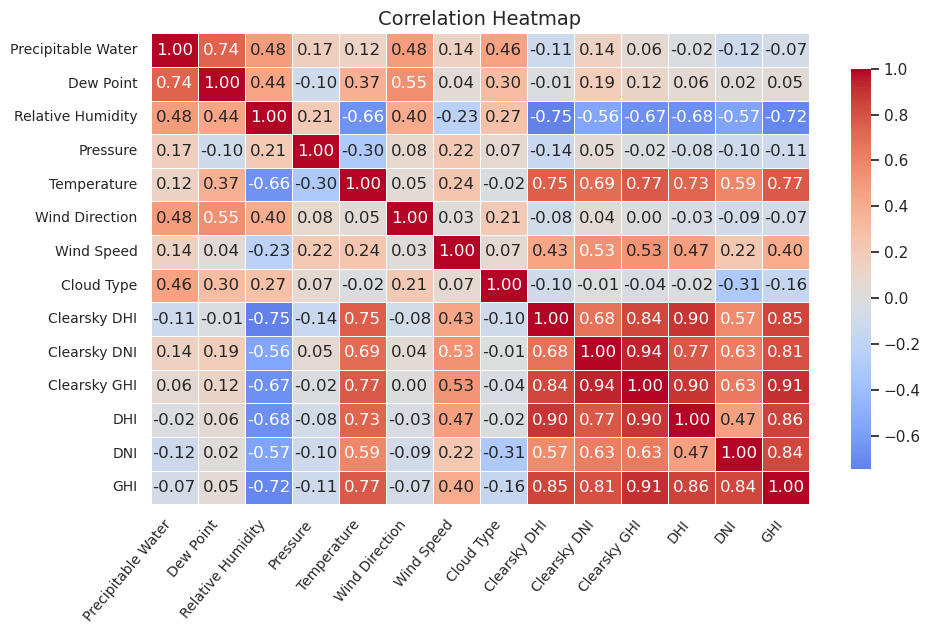

In [75]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6.5))
sns.heatmap(
    corr_matrix,
    annot=True,      # Display correlation values
    fmt=".2f",       # Format values to 2 decimal places
    cmap="coolwarm", # Use diverging color palette
    center=0,        # Center the palette at 0
    linewidths=0.5,  # Add grid lines between cells
    cbar_kws={"shrink": 0.85} # Adjust color bar size
)
plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=50, ha='right', fontsize=10) # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=10) # Keep y-axis labels horizontal
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()


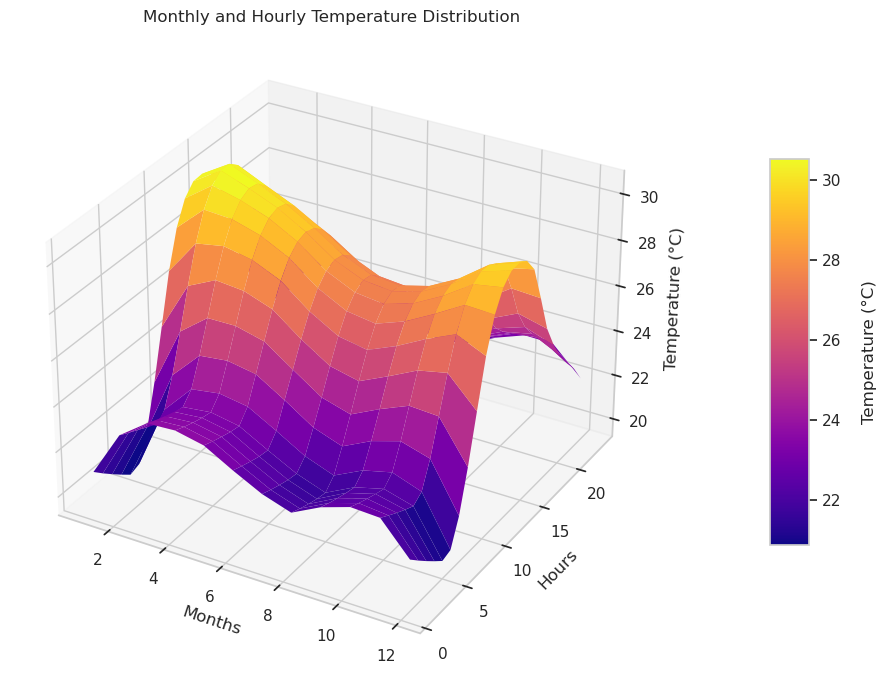

In [56]:
from mpl_toolkits.mplot3d import Axes3D

# Create a pivot table for Months (x-axis), Hours (y-axis), and GHI (z-axis)
pivot_table = merged_df.pivot_table(
    values='Temperature',
    index='Hour',
    columns='Month',
    aggfunc='mean'
)

# Extract X, Y, and Z values from the pivot table
x = pivot_table.columns.values  # Months
y = pivot_table.index.values    # Hours
X, Y = np.meshgrid(x, y)        # Create a meshgrid
Z = pivot_table.values          # GHI values

# Create a 3D surface plot
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(
    X, Y, Z,
    cmap='plasma',
    edgecolor='none'
)

# Add color bar for intensity
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10, pad=0.1)
cbar.set_label('Temperature (°C)', labelpad=15)

# Set axis labels
ax.set_xlabel('Months')
ax.set_ylabel('Hours')
ax.set_zlabel('Temperature (°C)')
ax.set_title('Monthly and Hourly Temperature Distribution')

# Show plot
plt.tight_layout()
plt.show()


## Current and Forecasted Weather Data
Visit [OpenWeather](https://openweathermap.org/api) for Information on how to get weather data through their APIs 

Check out the 'request' library section of this [tutorial](https://github.com/peterobarotu/Python_for_Data_Analyst/blob/main/LESSON%2010.%20Modules%20and%20Packages.ipynb) on working with APIs and collecting weather data.

In [27]:
# Cloud type to weather icon mapping dictionary
weather_icon_to_cloud_type = {
    "01d": 0, "01n": 0,  # Clear sky (Cloud Type 0)
    "02d": 1, "02n": 1,  # Few clouds (Cloud Type 1)
    "50d": 2, "50n": 2,  # Fog (Cloud Type 2)
    "03d": 3, "03n": 3,  # Scattered clouds (Cloud Type 3)
    "04d": 4, "04n": 4,  # Broken clouds (Cloud Type 4)
    "11d": 9, "11n": 9,  # Thunderstorm (Cloud Type 9)
    "09d": 5, "09n": 5,  # Shower rain
    "10d": 5, "10n": 5,  # Rain
    "13d": 12, "13n": 12 # Snow
}

# Function to map icon to cloud type
def get_cloud_type(weather_icon):
    return weather_icon_to_cloud_type.get(weather_icon, 10)

# Function to process current weather data
def extract_current_weather(response):
    dt = response['dt'] + response['timezone']
    weather_icon = response['weather'][0]['icon']
    cloud_type = get_cloud_type(weather_icon)

    weather_data = {
        'Month': pd.to_datetime(dt, unit='s').month,
        'Day': pd.to_datetime(dt, unit='s').day,
        'Hour': pd.to_datetime(dt, unit='s').hour,
        'Minute': pd.to_datetime(dt, unit='s').minute,
        'Precipitable Water': response.get('precipitable_water', 4.9),
        'Dew Point': response['main'].get('dew_point', response['main']['temp'] - ((100 - response['main']['humidity']) / 5)),
        'Relative Humidity': response['main']['humidity'],
        'Pressure': response['main']['pressure'],
        'Temperature': response['main']['temp'],
        'Temperature Min': response['main'].get('temp_min', None),
        'Temperature Max': response['main'].get('temp_max', None),
        'Wind Direction': response['wind']['deg'],
        'Wind Speed': response['wind']['speed'],
        'Cloud Type': cloud_type,
        'Cloud Description': response['weather'][0]['description']
    }
    return weather_data

# Function to process forecast data
def extract_forecast_data(response):
    data = []
    for item in response['list']:
        weather_icon = item['weather'][0]['icon']
        cloud_type = get_cloud_type(weather_icon)

        entry = {
            'Month': pd.to_datetime(item['dt_txt']).month,
            'Day': pd.to_datetime(item['dt_txt']).day,
            'Hour': pd.to_datetime(item['dt_txt']).hour,
            'Minute': pd.to_datetime(item['dt_txt']).minute,
            'Precipitable Water': item.get('precipitable_water', 4.9),
            'Dew Point': item['main'].get('dew_point', item['main']['temp'] - ((100 - item['main']['humidity']) / 5)),
            'Relative Humidity': item['main']['humidity'],
            'Pressure': item['main']['pressure'],
            'Temperature': item['main']['temp'],
            'Temperature Min': item['main'].get('temp_min', None),
            'Temperature Max': item['main'].get('temp_max', None),
            'Wind Direction': item['wind']['deg'],
            'Wind Speed': item['wind']['speed'],
            'Cloud Type': cloud_type,
            'Cloud Description': item['weather'][0]['description']
        }
        data.append(entry)
    return pd.DataFrame(data)

# Main function to fetch and process weather data
def get_weather_data(data_type='both'):
    # Coordinates and API keys
    latitude = 7.451541139578495      # CPEEL UI coordinates
    longitude = 3.889850809097754
    # Define the API url for current weather
    current_url = "https://api.openweathermap.org/data/2.5/weather"
    current_api_key = 'e9c6e72f2ae584b2a98bd0471b506f89'
    
    # Define the API url for forcast weather
    forecast_url ="https://pro.openweathermap.org/data/2.5/forecast/hourly"
    forecast_api_key = 'YOUR_API_KEY'   # Required a paid subscription Key
    
    # Prepare dataframes for current and forecast data
    current_df, forecast_df = None, None

    # Fetch current weather data
    if data_type in ['current', 'both']:
        params = {'lat': latitude, 'lon': longitude, 'units': 'metric', 'appid': current_api_key}
        try:
            response_weather = requests.get(url=current_url, params=params, timeout=10)
            response_weather.raise_for_status()
            response_weather = response_weather.json()
            current_data = extract_current_weather(response_weather)
            current_df = pd.DataFrame([current_data])
        except requests.exceptions.RequestException as err:
            print(f"Error fetching current weather data: {err}")

    # Fetch forecast data
    if data_type in ['forecast', 'both']:
        params = {'lat': latitude, 'lon': longitude, 'units': 'metric', 'appid': forecast_api_key}
        try:
            response_forecast = requests.get(url=forecast_url, params=params, timeout=10)
            response_forecast.raise_for_status()
            response_forecast = response_forecast.json()
            forecast_df = extract_forecast_data(response_forecast)
        except requests.exceptions.RequestException as err:
            print(f"Error fetching forecast data: {err}")

    # Return data based on the data_type argument
    if data_type == 'current':
        return current_df
    elif data_type == 'forecast':
        return forecast_df
    elif data_type == 'both':
        return (current_df, forecast_df)

# Get current weather data
current_df = get_weather_data(data_type='current')
current_df

# Get both current and forecast weather data
# current_df, forecast_df = get_weather_data(data_type='both')
# forecast_df.head(10)

Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  
0        2.38           5        light rain

In [7]:
current_df

Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0     11   24     4       1                 4.9      15.68                 71   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        21.48            21.48            21.48               0   

   Wind Speed  Cloud Type Cloud Description  
0        1.17           0         clear sky

In [65]:
forecast_df = forecast_df.loc[(forecast_df['Hour'] > 6 ) & (forecast_df['Hour'] <= 18)].reset_index(drop=True)
forecast_df

Month  Day  Hour  Minute  Precipitable Water  Dew Point  \
0      11   29    16       0                 4.9      19.00   
1      11   29    17       0                 4.9      17.93   
2      11   29    18       0                 4.9      16.10   
3      11   30     7       0                 4.9      12.21   
4      11   30     8       0                 4.9      13.29   
5      11   30     9       0                 4.9      14.63   
6      11   30    10       0                 4.9      16.28   
7      11   30    11       0                 4.9      17.76   
8      11   30    12       0                 4.9      18.82   
9      11   30    13       0                 4.9      19.57   
10     11   30    14       0                 4.9      19.65   
11     11   30    15       0                 4.9      19.38   
12     11   30    16       0                 4.9      19.03   
13     11   30    17       0                 4.9      16.67   
14     11   30    18       0                 4.9      14.86   
15     12    1     7       0                 4.9      13.45   
16     12    1     8       0                 4.9      13.71   
17     12    1     9       0                 4.9      15.23   
18     12    1    10       0                 4.9      16.83   
19     12    1    11       0                 4.9      18.49   
20     12    1    12       0                 4.9      19.74   
21     12    1    13       0                 4.9      20.48   
22     12    1    14       0                 4.9      20.69   
23     12    1    15       0                 4.9      19.97   
24     12    1    16       0                 4.9      19.48   
25     12    1    17       0                 4.9      17.14   
26     12    1    18       0                 4.9      15.28   
27     12    2     7       0                 4.9      20.70   
28     12    2     8       0                 4.9      20.81   
29     12    2     9       0                 4.9      21.01   
30     12    2    10       0                 4.9      20.91   
31     12    2    11       0                 4.9      21.41   
32     12    2    12       0                 4.9      21.87   
33     12    2    13       0                 4.9      22.01   
34     12    2    14       0                 4.9      21.65   
35     12    2    15       0                 4.9      21.14   
36     12    2    16       0                 4.9      20.47   
37     12    2    17       0                 4.9      19.10   
38     12    2    18       0                 4.9      18.42   
39     12    3     7       0                 4.9      21.55   
40     12    3     8       0                 4.9      21.49   
41     12    3     9       0                 4.9      21.22   
42     12    3    10       0                 4.9      21.69   
43     12    3    11       0                 4.9      22.08   
44     12    3    12       0                 4.9      22.38   
45     12    3    13       0                 4.9      22.27   
46     12    3    14       0                 4.9      21.21   
47     12    3    15       0                 4.9      20.81   

    Relative Humidity  Pressure  Temperature  Temperature Min  \
0                  22      1009        34.60            33.84   
1                  26      1009        32.73            29.64   
2                  30      1010        30.10            26.97   
3                  45      1015        23.21            23.21   
4                  33      1015        26.69            26.69   
5                  26      1015        29.43            29.43   
6                  23      1014        31.68            31.68   
7                  21      1013        33.56            33.56   
8                  20      1012        34.82            34.82   
9                  20      1011        35.57            35.57   
10                 20      1009        35.65            35.65   
11                 21      1009        35.18            35.18   
12                 24      1009        34.23            34.23   
13    

## Training Data

We'll seperate out the 2022 data as a validation set and use the rest as a training and testing set

In [58]:
# Filter out rows where the year is 2022
training_data = merged_df[merged_df['Year'] != 2022]

# Save the filtered DataFrame to a CSV file
training_data.to_csv('training_data.csv', index=False)


## Annual Forcasting

In [59]:
# Load dataset
df = pd.read_csv('training_data.csv')

# Filter out night (inutile) data
df = df.loc[(df['Hour'] > 7 ) & (df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()
df.shape

(68299, 22)

### Clearsky Forecasting

#### RF

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load dataset
df = pd.read_csv('training_data.csv')

# Filter out night (inutile) data
df = df.loc[(df['Hour'] >= 7 ) & (df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed'
                  ]

target_columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features 
scaler_rf = StandardScaler()
X_train_scaled = scaler_rf.fit_transform(X_train)
X_test_scaled = scaler_rf.transform(X_test)
joblib.dump(scaler_rf, 'feature_scaler_clr_annual_rf.pkl')

# Standardizing the target variables
target_scaler_rf = MinMaxScaler()
y_train_scaled = target_scaler_rf.fit_transform(y_train)
y_test_scaled = target_scaler_rf.transform(y_test)
joblib.dump(target_scaler_rf, 'target_scaler_clr_annual_rf.pkl')

# Train a Random Forest model using MultiOutputRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_output_rf = MultiOutputRegressor(rf)
multi_output_rf.fit(X_train_scaled, y_train_scaled)

# Save the RF model
joblib.dump(multi_output_rf, 'clr_annual_rf.pkl')

# Predictions on training and testing sets
train_pred_scaled = multi_output_rf.predict(X_train_scaled)
test_pred_scaled = multi_output_rf.predict(X_test_scaled)

# Inverse transform predictions to get original scale
train_pred = target_scaler_rf.inverse_transform(train_pred_scaled)
test_pred = target_scaler_rf.inverse_transform(test_pred_scaled)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each component
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test.iloc[:, i], test_pred[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test.iloc[:, i], test_pred[:, i])
    nrmse = rmse / np.mean(y_test.iloc[:, i])
    r2 = r2_score(y_test.iloc[:, i], test_pred[:, i])

    print(f"Test MSE for {target} (Random Forest): {mse}")
    print(f"Test RMSE for {target} (Random Forest): {rmse}")
    print(f"Test MAE for {target} (Random Forest): {mae}")
    print(f"Test nRMSE for {target} (Random Forest): {nrmse}")
    print(f"Test R-squared for {target} (Random Forest): {r2}")
    print()


Test MSE for Clearsky DHI (Random Forest): 1729.4950940209371
Test RMSE for Clearsky DHI (Random Forest): 41.587198679653056
Test MAE for Clearsky DHI (Random Forest): 28.165263051939338
Test nRMSE for Clearsky DHI (Random Forest): 0.22147784309103197
Test R-squared for Clearsky DHI (Random Forest): 0.8620193930892007

Test MSE for Clearsky DNI (Random Forest): 7852.094125520063
Test RMSE for Clearsky DNI (Random Forest): 88.61204277929757
Test MAE for Clearsky DNI (Random Forest): 65.29280700577104
Test nRMSE for Clearsky DNI (Random Forest): 0.18574376909270618
Test R-squared for Clearsky DNI (Random Forest): 0.8831522330249831

Test MSE for Clearsky GHI (Random Forest): 584.2804507314455
Test RMSE for Clearsky GHI (Random Forest): 24.171893817643777
Test MAE for Clearsky GHI (Random Forest): 16.663894779224265
Test nRMSE for Clearsky GHI (Random Forest): 0.04480828133461538
Test R-squared for Clearsky GHI (Random Forest): 0.9939004069066033



#### Prediction

In [28]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load Trained Models
scaler_rf = joblib.load('feature_scaler_clr_annual_rf.pkl')
target_scaler_rf = joblib.load('target_scaler_clr_annual_rf.pkl')

multi_output_rf = joblib.load('clr_annual_rf.pkl')

# Define a function to make predictions
def make_prediction(df):
    # Define feature columns
    feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                       'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                       'Wind Direction', 'Wind Speed']

    # Ensure the DataFrame has the correct columns
    df = df[feature_columns]

    # Standardize the features
    X_scaled = scaler_rf.transform(df)

    # Make predictions
    pred_scaled = multi_output_rf.predict(X_scaled)

    # Inverse transform predictions to get original scale
    pred = target_scaler_rf.inverse_transform(pred_scaled)

    # Create a DataFrame for the predictions
    pred_df = pd.DataFrame(pred, columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'])

    return pred_df



new_data = current_df  # Substitute with your weather data

# Make predictions
clr_annual_rf_predictions = make_prediction(new_data)
clr_annual_rf_predictions = pd.concat([new_data, clr_annual_rf_predictions], axis=1)
clr_annual_rf_predictions


Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain        243.48        476.33   

   Clearsky GHI  
0        483.61

#### CNN

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Input, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
df = pd.read_csv('training_data.csv')

# Filter out night (inutile) data
df = df.loc[(df['Hour'] >= 7 ) & (df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed']

target_columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the feature scaler
joblib.dump(scaler, 'feature_scaler_clr_annual_cnn.pkl')

# Standardizing the target variables
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_test_scaled = target_scaler.transform(y_test)

# Save the target scaler
joblib.dump(target_scaler, 'target_scaler_clr_annual_cnn.pkl')

# Reshape input data for CNN model
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Input(shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', padding='same',))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=256, kernel_size=2, activation='relu', padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=3))

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train_scaled, epochs=40, batch_size=64, validation_data=(X_test_cnn, y_test_scaled),
              callbacks=[early_stopping, reduce_lr])

# Generate predictions from CNN model
cnn_preds = cnn_model.predict(X_test_cnn)

# Inverse transform predictions to get original scale
cnn_preds = target_scaler.inverse_transform(cnn_preds)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each component
metrics = {}
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test[target], cnn_preds[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test[target], cnn_preds[:, i])
    nrmse = rmse / np.mean(y_test[target])
    r2 = r2_score(y_test[target], cnn_preds[:, i])

    metrics[target] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'nRMSE': nrmse,
        'R-squared': r2
    }

# Print out the metrics
for target, values in metrics.items():
    print(f"{target}:\n MSE: {values['MSE']}\n RMSE: {values['RMSE']}\n MAE: {values['MAE']}\n nRMSE: {values['nRMSE']}\n R-squared: {values['R-squared']}\n\n")

# Save the trained model
cnn_model.save('clr_annual_cnn.h5')


Epoch 1/40
932/932 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0083 - val_mse: 0.0083 - learning_rate: 0.0010
Epoch 2/40
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0075 - val_mse: 0.0075 - learning_rate: 0.0010
Epoch 3/40
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0077 - val_mse: 0.0077 - learning_rate: 0.0010
Epoch 4/40
932/932 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0070 - val_mse: 0.0070 - learning_rate: 0.0010
Epoch 5/40
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0072 - val_mse: 0.0072 - learning_rate: 0.0010
Epoch 6/40
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0063 - val_mse: 0.0063 - learning_rate: 0.0010
Epoch 7/40
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0062 - val_mse: 0.0062 - learning_rate: 0.0010
Epoch

Clearsky DHI - MSE: 2042.2569159730012, RMSE: 45.19133673585017, MAE: 31.71416614789912, nRMSE: 0.24067213239716373, R-squared: 0.8370669857879802
Clearsky DNI - MSE: 8049.170091676072, RMSE: 89.71716720715202, MAE: 67.49025710544848, nRMSE: 0.18806027111780185, R-squared: 0.8802195266409715
Clearsky GHI - MSE: 911.5801993589466, RMSE: 30.19238644689993, MAE: 23.03446907079623, nRMSE: 0.055968678179804915, R-squared: 0.9904835626776042


#### Predictions

In [29]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf

# Load the saved feature scaler and target scaler
scaler = joblib.load('feature_scaler_clr_annual_cnn.pkl')
target_scaler = joblib.load('target_scaler_clr_annual_cnn.pkl')

# Load the trained CNN model
cnn_model = tf.keras.models.load_model('clr_annual_cnn.h5')

# Load your new dataset 
df_new = current_df

# Define columns of interest 
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed']

# Select relevant columns from the DataFrame
X_new = df_new[feature_columns]

# Standardize the features
X_new_scaled = scaler.transform(X_new)

# Reshape the data for CNN input (samples, time steps, features)
X_new_cnn = X_new_scaled.reshape((X_new_scaled.shape[0], X_new_scaled.shape[1], 1))

# Generate predictions for the new data
cnn_preds_new = cnn_model.predict(X_new_cnn)

# Inverse transform the predictions to get the original scale
cnn_preds_new_inv = target_scaler.inverse_transform(cnn_preds_new)

# Create a DataFrame with the predictions
clr_annual_cnn_predictions = pd.DataFrame(cnn_preds_new_inv, columns=['Clearsky DHI',	'Clearsky DNI', 'Clearsky GHI'])

# Combine the predictions with the original new data
clr_annual_cnn_predictions = pd.concat([df_new, clr_annual_cnn_predictions], axis=1)

# Output the final DataFrame with the predictions
clr_annual_cnn_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain    188.341202    762.376709   

   Clearsky GHI  
0    897.584167

#### LSTM

In [69]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
df = pd.read_csv('training_data.csv')

# Filter out night (inutile) data
df = df.loc[(df['Hour'] >= 7 ) & (df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed']

target_columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Check for NaNs or infinite values and handle them
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (important for LSTM)
scaler_lstm = StandardScaler()
X_train = scaler_lstm.fit_transform(X_train)
X_test = scaler_lstm.transform(X_test)
joblib.dump(scaler_lstm, 'feature_scaler_clr_annual_lstm.pkl')

# Standardizing the target variables
target_scaler_lstm = MinMaxScaler()
y_train = target_scaler_lstm.fit_transform(y_train)
y_test = target_scaler_lstm.transform(y_test)
joblib.dump(target_scaler_lstm, 'target_scaler_clr_annual_lstm.pkl')

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model 
model_lstm = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=100, return_sequences=True),
    Dropout(0.3),
    LSTM(units=100, return_sequences=True),
    Dropout(0.3),
    LSTM(units=100),
    Dropout(0.3),
    Dense(units=3)  # Output layer with 3 units for DHI, DNI, GHI
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with callbacks
history = model_lstm.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test),
                         callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
losses = model_lstm.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {losses[0]}")

# Make predictions
y_pred = model_lstm.predict(X_test)

# Inverse transform the predictions and the actual values
y_pred_inv = target_scaler_lstm.inverse_transform(y_pred)
y_test_inv = target_scaler_lstm.inverse_transform(y_test)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each target variable
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_inv[:, i], y_pred_inv[:, i])
    nrmse = rmse / np.mean(y_test_inv[:, i])
    r2 = r2_score(y_test_inv[:, i], y_pred_inv[:, i])

    print(f"Test MSE for {target}: {mse}")
    print(f"Test RMSE for {target}: {rmse}")
    print(f"Test MAE for {target}: {mae}")
    print(f"Test nRMSE for {target}: {nrmse}")
    print(f"Test R-squared for {target}: {r2}\n")

# Save the trained model
model_lstm.save('clr_annual_lstm.h5')


Epoch 1/40
932/932 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0501 - mse: 0.0501 - val_loss: 0.0088 - val_mse: 0.0088 - learning_rate: 0.0010
Epoch 2/40
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0078 - val_mse: 0.0078 - learning_rate: 0.0010
Epoch 3/40
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0073 - val_mse: 0.0073 - learning_rate: 0.0010
Epoch 4/40
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0070 - val_mse: 0.0070 - learning_rate: 0.0010
Epoch 5/40
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0068 - val_mse: 0.0068 - learning_rate: 0.0010
Epoch 6/40
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0066 - val_mse: 0.0066 - learning_rate: 0.0010
Epoch 7/40
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0063 - val_mse: 0.0063 - learning_rate: 0.0010
Epoch

466/466 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


Test MSE for Clearsky DHI: 2298.745527843771
Test RMSE for Clearsky DHI: 47.945234672945034
Test MAE for Clearsky DHI: 32.80146493701835
Test nRMSE for Clearsky DHI: 0.2553383612984873
Test R-squared for Clearsky DHI: 0.8166041036127222

Test MSE for Clearsky DNI: 9169.586958799126
Test RMSE for Clearsky DNI: 95.75796028946694
Test MAE for Clearsky DNI: 71.23105106219687
Test nRMSE for Clearsky DNI: 0.20072265469711892
Test R-squared for Clearsky DNI: 0.8635464956110738

Test MSE for Clearsky GHI: 711.1639923552375
Test RMSE for Clearsky GHI: 26.66765817156125
Test MAE for Clearsky GHI: 19.56099892298562
Test nRMSE for Clearsky GHI: 0.049434766630261105
Test R-squared for Clearsky GHI: 0.9925758067540819



#### Prediction

In [30]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf

# Load the saved scalers
scaler_lstm = joblib.load('feature_scaler_clr_annual_lstm.pkl')
target_scaler_lstm = joblib.load('target_scaler_clr_annual_lstm.pkl')

# Load your new dataset 
df_new = current_df

# Define columns of interest
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed']

# Select relevant columns from the DataFrame
X_new = df_new[feature_columns]

# Standardize the features
X_new = scaler_lstm.transform(X_new)

# Reshape the data for LSTM input (samples, time steps, features)
X_new = X_new.reshape(X_new.shape[0], 1, X_new.shape[1])

# Load the trained LSTM model
model_lstm = tf.keras.models.load_model('clr_annual_lstm.h5')

# Make predictions
y_pred_new = model_lstm.predict(X_new)

# Inverse transform the predictions to get the actual GHI, DNI, DHI values
y_pred_new_inv = target_scaler_lstm.inverse_transform(y_pred_new)

# Extract predictions for GHI, DNI, and DHI
predicted_ghi = y_pred_new_inv[:, 2]
predicted_dni = y_pred_new_inv[:, 1]
predicted_dhi = y_pred_new_inv[:, 0]

# Create a DataFrame with the predictions
clr_annual_lstm_predictions = pd.DataFrame({
    'Clearsky DHI': predicted_dhi,
    'Clearsky DNI': predicted_dni,
    'Clearsky GHI': predicted_ghi,
})

# combine with the original data
clr_annual_lstm_predictions = pd.concat([df_new, clr_annual_lstm_predictions], axis=1)

# Output the final DataFrame
clr_annual_lstm_predictions



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain    232.331421    447.567474   

   Clearsky GHI  
0    501.687988

### Cloudysky Forecasting

In [71]:
# Load dataset
df = pd.read_csv('training_data.csv')

# Filter out night (inutile) data
df = df.loc[(df['Hour'] >= 7 ) & (df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Remove data with missing cloud properties
df =  df.query("`Fill Flag` != 4")
df.shape

(74472, 22)

#### RF

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load dataset
df = pd.read_csv('training_data.csv')

# Filter out night (inutile) data
df = df.loc[(df['Hour'] >= 7 ) & (df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Remove data with missing cloud properties
df =  df.query("`Fill Flag` != 4")

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',]

target_columns = ['DHI', 'DNI', 'GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features 
cld_scaler_rf = StandardScaler()
X_train_scaled = cld_scaler_rf.fit_transform(X_train)
X_test_scaled = cld_scaler_rf.transform(X_test)
joblib.dump(cld_scaler_rf, 'feature_scaler_cld_annual_rf.pkl')

# Standardizing the target variables
cld_target_scaler_rf_ = MinMaxScaler()
y_train_scaled = cld_target_scaler_rf_.fit_transform(y_train)
y_test_scaled = cld_target_scaler_rf_.transform(y_test)
joblib.dump(cld_target_scaler_rf_, 'target_scaler_cld_annual_rf.pkl')

# Train a Random Forest model using MultiOutputRegressor
cld_rf = RandomForestRegressor(random_state=42)
cld_rf = MultiOutputRegressor(cld_rf)
cld_rf.fit(X_train_scaled, y_train_scaled)

# Save the RF model
joblib.dump(cld_rf, 'cld_annual_rf.pkl')

# Predictions on training and testing sets
train_pred_scaled = cld_rf.predict(X_train_scaled)
test_pred_scaled = cld_rf.predict(X_test_scaled)

# Inverse transform predictions to get original scale
train_pred = cld_target_scaler_rf_.inverse_transform(train_pred_scaled)
test_pred = cld_target_scaler_rf_.inverse_transform(test_pred_scaled)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each component
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test.iloc[:, i], test_pred[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test.iloc[:, i], test_pred[:, i])
    nrmse = rmse / np.mean(y_test.iloc[:, i])
    r2 = r2_score(y_test.iloc[:, i], test_pred[:, i])

    print(f"Test MSE for {target} (Random Forest): {mse}")
    print(f"Test RMSE for {target} (Random Forest): {rmse}")
    print(f"Test MAE for {target} (Random Forest): {mae}")
    print(f"Test nRMSE for {target} (Random Forest): {nrmse}")
    print(f"Test R-squared for {target} (Random Forest): {r2}")
    print()


Test MSE for DHI (Random Forest): 2560.356305525344
Test RMSE for DHI (Random Forest): 50.59996349332027
Test MAE for DHI (Random Forest): 27.517968445787265
Test nRMSE for DHI (Random Forest): 0.21730648036839986
Test R-squared for DHI (Random Forest): 0.8947230056889887

Test MSE for DNI (Random Forest): 5932.325998999664
Test RMSE for DNI (Random Forest): 77.02159436807098
Test MAE for DNI (Random Forest): 35.57331252098038
Test nRMSE for DNI (Random Forest): 0.3319247950815875
Test R-squared for DNI (Random Forest): 0.9057837385701988

Test MSE for GHI (Random Forest): 6014.022551775763
Test RMSE for GHI (Random Forest): 77.55012928277917
Test MAE for GHI (Random Forest): 41.36026518966117
Test nRMSE for GHI (Random Forest): 0.19306166453015167
Test R-squared for GHI (Random Forest): 0.926149332551702



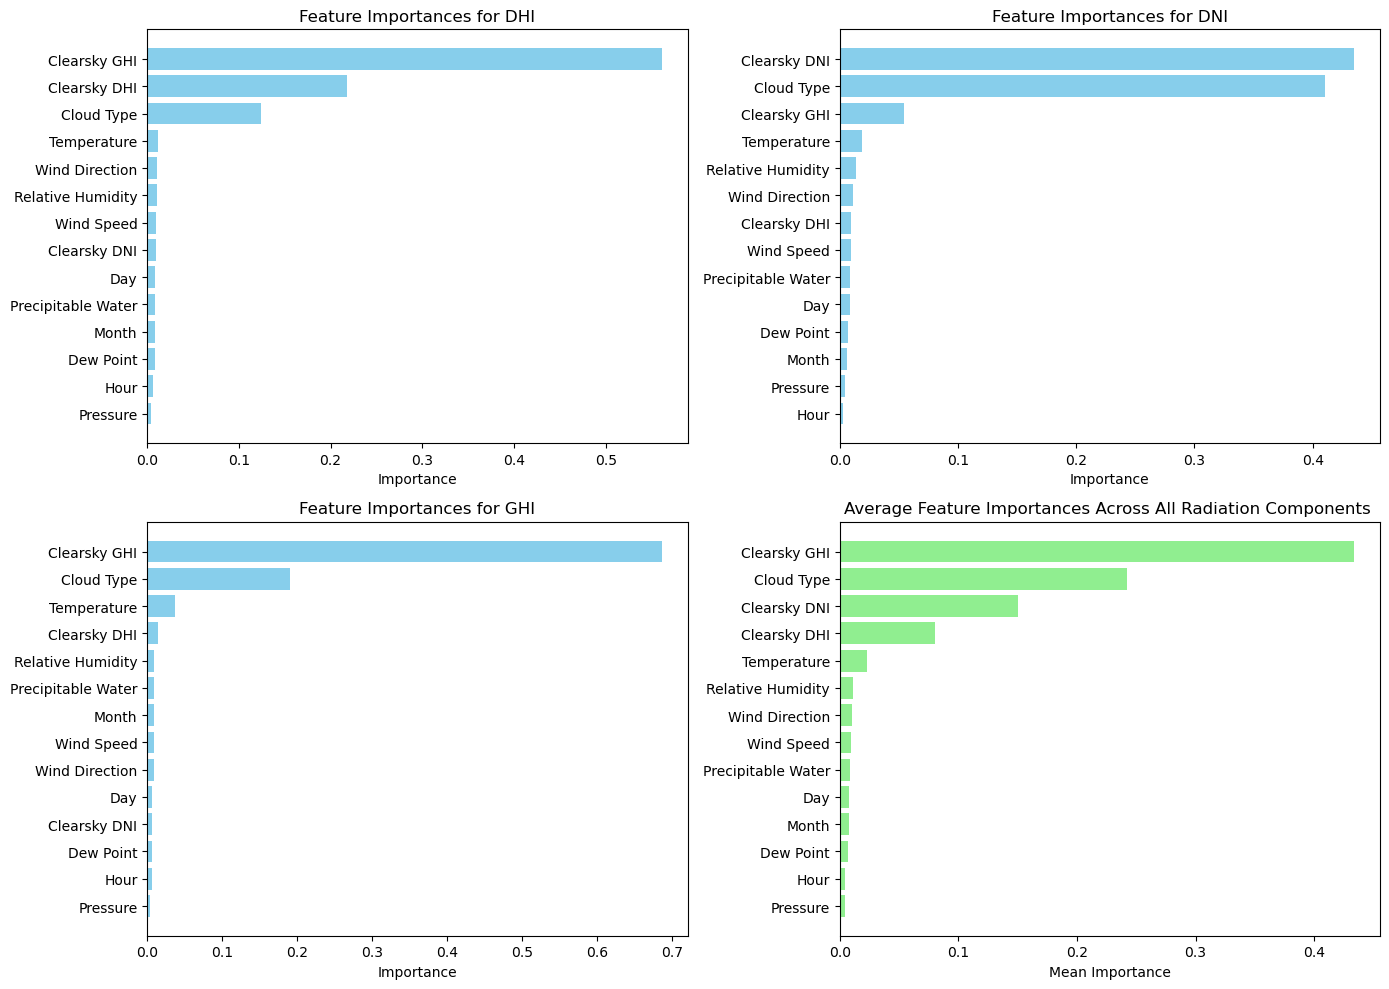

In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load the multi-regressor model
rf_model = joblib.load('cld_annual_rf.pkl')

# Define target columns and feature columns
target_columns = ['DHI', 'DNI', 'GHI']
feature_columns = [
    'Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point',
    'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction',
    'Wind Speed', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
]

# Initialize a DataFrame to hold all feature importances
all_importances = pd.DataFrame(0, index=feature_columns, columns=target_columns)

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

# Loop through the first three subplots for individual feature importance
for i, (estimator, target) in enumerate(zip(rf_model.estimators_, target_columns)):
    # Get feature importances for the current estimator
    importances = estimator.feature_importances_
    
    # Update the aggregate importance DataFrame
    all_importances[target] = importances
    
    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Plot the feature importances in the corresponding subplot
    axes[i].barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    axes[i].set_title(f'Feature Importances for {target}')
    axes[i].set_xlabel('Importance')
    axes[i].invert_yaxis()  # Sorts features by importance

# Fourth plot: Average feature importance
mean_importances = all_importances.mean(axis=1).sort_values(ascending=False)
axes[3].barh(mean_importances.index, mean_importances, color='lightgreen')
axes[3].set_title('Average Feature Importances Across All Radiation Components ')
axes[3].set_xlabel('Mean Importance')
axes[3].invert_yaxis()  # Sorts features by mean importance

# Adjust layout to fit the subplots nicely
plt.tight_layout()

# Show the combined plot
plt.show()


In [3]:
all_importances['mean'] = all_importances.mean(axis=1)
all_importances

DHI       DNI       GHI      mean
Month               0.008304  0.006289  0.008436  0.007676
Day                 0.009020  0.008364  0.006865  0.008083
Hour                0.006124  0.002471  0.005939  0.004845
Precipitable Water  0.008441  0.008866  0.008668  0.008658
Dew Point           0.008281  0.006726  0.006004  0.007003
Relative Humidity   0.010862  0.013791  0.009614  0.011423
Pressure            0.004645  0.004503  0.003510  0.004219
Temperature         0.011314  0.018818  0.037646  0.022593
Wind Direction      0.010935  0.010903  0.008400  0.010079
Wind Speed          0.009869  0.009296  0.008424  0.009196
Clearsky DHI        0.217326  0.009646  0.013935  0.080302
Clearsky DNI        0.009282  0.435167  0.006270  0.150240
Clearsky GHI        0.561131  0.054696  0.685742  0.433856
Cloud Type          0.124467  0.410463  0.190547  0.241826

#### Prediction

In [31]:
import pandas as pd
import numpy as np
import joblib

# Load the saved models and scalers
cld_scaler_rf = joblib.load('feature_scaler_cld_annual_rf.pkl')
cld_target_scaler_rf_ = joblib.load('target_scaler_cld_annual_rf.pkl')
cld_rf = joblib.load('cld_annual_rf.pkl')

# Use the first stage predicions -- the clearsky predictions along with the weather variables
new_data = clr_annual_rf_predictions

# Ensure new data has the same features as the training data
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type' ]

# Check if all required columns are present
if not all(column in new_data.columns for column in feature_columns):
    missing_columns = [col for col in feature_columns if col not in new_data.columns]
    raise ValueError(f"Missing required columns: {missing_columns}")

# Extract features
X_new = new_data[feature_columns]

# Apply the feature scaler
X_new_scaled = cld_scaler_rf.transform(X_new)

# Make predictions
pred_scaled = cld_rf.predict(X_new_scaled)

# Inverse transform predictions to original scale
predictions = cld_target_scaler_rf_.inverse_transform(pred_scaled)

# Convert predictions to DataFrame
pred_df = pd.DataFrame(predictions, columns=['DHI', 'DNI', 'GHI'])

# Combine predictions with original data for reference
cld_annual_rf_predictions = pd.concat([new_data, pred_df], axis=1)
cld_annual_rf_predictions

Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain        243.48        476.33   

   Clearsky GHI     DHI    DNI     GHI  
0        483.61  137.64  16.16  124.55

#### Plot RF
Use the plot below only if you have forcasted weather data 

/tmp/ipykernel_8395/2042107232.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



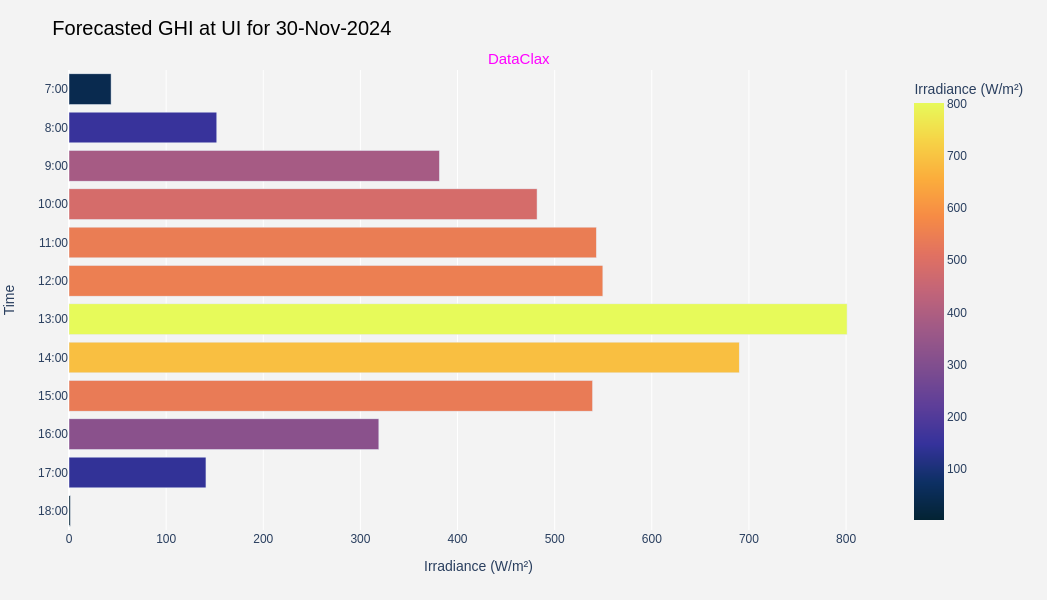

In [120]:
import plotly.express as px

final_pred = cld_annual_rf_predictions.query("`Day` == 30") # Change the day
# Create a new column for time in "Hour:Minute" format
final_pred['Time'] = final_pred['Hour'].astype(str) + ":" + final_pred['Minute'].astype(str).str.zfill(2)

# Plot the GHI as a horizontal bar plot using Plotly
fig = px.bar(final_pred, 
             y='Time', 
             x='GHI', 
             orientation='h',
             title='Forecasted GHI at UI for 30-Nov-2024',
             labels={'GHI': 'Irradiance (W/m²)', 'Time': 'Time'},
             color='GHI',  # Color based on GHI values for a gradient effect
             color_continuous_scale='thermal'  
            )

# Update layout to invert the y-axis, as well as adjust the width and height
fig.update_layout(
    yaxis=dict(autorange="reversed"),  # Invert the y-axis
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis_title_font=dict(size=14, family='Arial'),
    yaxis_title_font=dict(size=14, family='Arial'),
    plot_bgcolor='rgb(243, 243, 243)',  
    paper_bgcolor='rgb(243, 243, 243)', 
    showlegend=False,
    width=900,  
    height=600,  
    margin=dict(l=50, r=50, t=70, b=70),  # Adjust margins for a better layout
    annotations=[
        dict(
            x=0.55,  # Place signature towards the bottom-right
            y=1.05,
            xref="paper",
            yref="paper",
            text="DataClax",
            showarrow=False,
            font=dict(size=15, color="magenta", family="Arial"),
            align="right"
        )
    ]
)

# Show the plot
fig.show()


#### LSTM

In [96]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
df = pd.read_csv('training_data.csv')

# Filter out night (inutile) data
df = df.loc[(df['Hour'] >= 7 ) & (df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Remove data with missing cloud properties
df =  df.query("`Fill Flag` != 4")

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type']

target_columns = ['DHI', 'DNI', 'GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Check for NaNs or infinite values and handle them
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (important for LSTM)
scaler_lstm = StandardScaler()
X_train = scaler_lstm.fit_transform(X_train)
X_test = scaler_lstm.transform(X_test)
joblib.dump(scaler_lstm, 'feature_scaler_cld_annual_lstm.pkl')

# Standardizing the target variables
target_scaler_lstm = MinMaxScaler()
y_train = target_scaler_lstm.fit_transform(y_train)
y_test = target_scaler_lstm.transform(y_test)
joblib.dump(target_scaler_lstm, 'target_scaler_cld_annual_lstm.pkl')

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
model_lstm = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(units=100, return_sequences=True),
    Dropout(0.3),
    LSTM(units=100),
    Dropout(0.3),
    Dense(units=3)  # Output layer with 3 units for DHI, DNI, GHI
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with callbacks
history = model_lstm.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test),
                         callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
losses = model_lstm.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {losses[0]}")

# Make predictions
y_pred = model_lstm.predict(X_test)

# Inverse transform the predictions and the actual values
y_pred_inv = target_scaler_lstm.inverse_transform(y_pred)
y_test_inv = target_scaler_lstm.inverse_transform(y_test)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each target variable
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_inv[:, i], y_pred_inv[:, i])
    nrmse = rmse / np.mean(y_test_inv[:, i])
    r2 = r2_score(y_test_inv[:, i], y_pred_inv[:, i])

    print(f"Test MSE for {target}: {mse}")
    print(f"Test RMSE for {target}: {rmse}")
    print(f"Test MAE for {target}: {mae}")
    print(f"Test nRMSE for {target}: {nrmse}")
    print(f"Test R-squared for {target}: {r2}\n")

# Save the trained model
model_lstm.save('cld_annual_lstm.h5')


Epoch 1/40


/home/peter/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



931/931 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0099 - val_mse: 0.0099 - learning_rate: 0.0010
Epoch 2/40
931/931 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0092 - val_mse: 0.0092 - learning_rate: 0.0010
Epoch 3/40
931/931 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0085 - val_mse: 0.0085 - learning_rate: 0.0010
Epoch 4/40
931/931 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0083 - val_mse: 0.0083 - learning_rate: 0.0010
Epoch 5/40
931/931 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0083 - val_mse: 0.0083 - learning_rate: 0.0010
Epoch 6/40
931/931 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0080 - val_mse: 0.0080 - learning_rate: 0.0010
Epoch 7/40
931/931 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0082 - val_mse: 0.0082 - learning_rate: 0.0010
Epoch 8/40
931/9

Test MSE for DHI: 2572.8825810202566
Test RMSE for DHI: 50.72358998553096
Test MAE for DHI: 29.305082265960166
Test nRMSE for DHI: 0.21783740640169916
Test R-squared for DHI: 0.8942079490028665

Test MSE for DNI: 5976.91089974162
Test RMSE for DNI: 77.31048376346911
Test MAE for DNI: 39.77484150531709
Test nRMSE for DNI: 0.3331697648093048
Test R-squared for DNI: 0.9050756482419137

Test MSE for GHI: 6150.169111692861
Test RMSE for GHI: 78.4230139161513
Test MAE for GHI: 45.01898751664218
Test nRMSE for GHI: 0.19523471777738896
Test R-squared for GHI: 0.9244774874207424



#### Predictions

In [32]:
import pandas as pd
import numpy as np
import joblib

# Load the saved models and scalers
scaler_lstm = joblib.load('feature_scaler_cld_annual_lstm.pkl')
target_scaler_lstm = joblib.load('target_scaler_cld_annual_lstm.pkl')
model_lstm = tf.keras.models.load_model('cld_annual_lstm.h5')

# Use the first stage LSTM predicions -- the clearsky predictions along with the weather variables
new_data =  clr_annual_lstm_predictions

# Ensure new data has the same features as the training data
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type']

# Check if all required columns are present
if not all(column in new_data.columns for column in feature_columns):
    missing_columns = [col for col in feature_columns if col not in new_data.columns]
    raise ValueError(f"Missing required columns: {missing_columns}")

# Extract features
X_new = new_data[feature_columns]

# Apply the feature scaler
X_new_scaled = scaler_lstm.transform(X_new)

# Reshape the scaled data for LSTM input
X_new_scaled = X_new_scaled.reshape(X_new_scaled.shape[0], 1, X_new_scaled.shape[1])

# Make predictions using the loaded LSTM model
pred_scaled = model_lstm.predict(X_new_scaled)

# Inverse transform predictions to the original scale
predictions = target_scaler_lstm.inverse_transform(pred_scaled)

# Convert predictions to DataFrame
pred_df = pd.DataFrame(predictions, columns=['DHI', 'DNI', 'GHI'])

# Combine predictions with original data for reference
cld_annual_lstm_predictions = pd.concat([new_data, pred_df], axis=1)

# Display the final predictions DataFrame
cld_annual_lstm_predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain    232.331421    447.567474   

   Clearsky GHI         DHI       DNI        GHI  
0    501.687988  169.930252  2.081171  169.31192

#### CNN

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Input, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
df = pd.read_csv('training_data.csv')

# Filter out night (inutile) data
df = df.loc[(df['Hour'] >=7 ) & (df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Remove data with missing cloud properties
df =  df.query("`Fill Flag` != 4")

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type']

target_columns = ['DHI', 'DNI', 'GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the feature scaler
joblib.dump(scaler, 'feature_scaler_cld_annual_cnn.pkl')

# Standardizing the target variables
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_test_scaled = target_scaler.transform(y_test)

# Save the target scaler
joblib.dump(target_scaler, 'target_scaler_cld_annual_cnn.pkl')

# Reshape input data for CNN model
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Input(shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', padding='same',))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=256, kernel_size=2, activation='relu', padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=3))

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train_scaled, epochs=40, batch_size=64, validation_data=(X_test_cnn, y_test_scaled),
              callbacks=[early_stopping, reduce_lr])

# Generate predictions from CNN model
cnn_preds = cnn_model.predict(X_test_cnn)

# Inverse transform predictions to get original scale
cnn_preds = target_scaler.inverse_transform(cnn_preds)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each component
metrics = {}
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test[target], cnn_preds[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test[target], cnn_preds[:, i])
    nrmse = rmse / np.mean(y_test[target])
    r2 = r2_score(y_test[target], cnn_preds[:, i])

    metrics[target] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'nRMSE': nrmse,
        'R-squared': r2
    }

# Print out the metrics
for target, values in metrics.items():
    print(f"{target} - MSE: {values['MSE']}, RMSE: {values['RMSE']}, MAE: {values['MAE']}, nRMSE: {values['nRMSE']}, R-squared: {values['R-squared']}")

# Save the trained model
cnn_model.save('cld_annual_cnn.h5')


Epoch 1/40
931/931 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0086 - val_mse: 0.0086 - learning_rate: 0.0010
Epoch 2/40
931/931 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0074 - val_mse: 0.0074 - learning_rate: 0.0010
Epoch 3/40
931/931 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0071 - val_mse: 0.0071 - learning_rate: 0.0010
Epoch 4/40
931/931 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0071 - val_mse: 0.0071 - learning_rate: 0.0010
Epoch 5/40
931/931 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0067 - val_mse: 0.0067 - learning_rate: 0.0010
Epoch 6/40
931/931 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0066 - val_mse: 0.0066 - learning_rate: 0.0010
Epoch 7/40
931/931 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0066 - val_mse: 0.0066 - learning_rate: 0.0010
Epoch

DHI - MSE: 2673.5268940671494, RMSE: 51.70615915021294, MAE: 31.824096017789824, nRMSE: 0.22205714555079453, R-squared: 0.8900696457717077
DNI - MSE: 6210.928359472778, RMSE: 78.80944333944237, MAE: 42.41597056036109, nRMSE: 0.33962953565892984, R-squared: 0.9013590200308399
GHI - MSE: 6340.098715824734, RMSE: 79.62473683362937, MAE: 47.75565122400766, nRMSE: 0.198226416552079, R-squared: 0.9221452001849407


#### Prediction

In [33]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# Load the saved feature scaler and target scaler
feature_scaler = joblib.load('feature_scaler_cld_annual_cnn.pkl')
target_scaler = joblib.load('target_scaler_cld_annual_cnn.pkl')

# Use the first stage LSTM predicions -- the clearsky predictions along with the weather variables
cnn_model = load_model('cld_annual_cnn.h5')

# New data for prediction
new_data = clr_annual_cnn_predictions

feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 'Relative Humidity',
                   'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed', 
                   'Clearsky DHI',	'Clearsky DNI', 'Clearsky GHI', 'Cloud Type'
                  ]

# Scale the features
new_data_scaled = feature_scaler.transform(new_data[feature_columns])

# Reshape for CNN model input
new_data_cnn = new_data_scaled.reshape((new_data_scaled.shape[0], new_data_scaled.shape[1], 1))

# Predict using the trained model
predictions_scaled = cnn_model.predict(new_data_cnn)

# Inverse transform predictions to the original scale
predictions = target_scaler.inverse_transform(predictions_scaled)


# Convert predictions to DataFrame
pred_df = pd.DataFrame(predictions, columns=['DHI', 'DNI', 'GHI'])

# Combine predictions with original data for reference
cld_annual_cnn_predictions = pd.concat([new_data, pred_df], axis=1)
cld_annual_cnn_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain    188.341202    762.376709   

   Clearsky GHI         DHI        DNI         GHI  
0    897.584167  588.088013 -36.673481  587.625793

## Wet Season

In [34]:
# Load dataset
df = pd.read_csv('../datasets/merged_data.csv')

# Extract Wet season dataset
wet_df =  df.loc[(df['Month'] >= 5 ) & (df['Month'] <= 10)]

# Drop NaNs
wet_df = wet_df.dropna()
wet_df.shape

(79488, 22)

In [35]:
cols = ['Precipitable Water', 'Dew Point', 
        'Relative Humidity', 'Pressure', 'Temperature','Wind Direction', 
        'Wind Speed','Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
        'DHI', 'DNI', 'GHI'
       ]

wet_stat = wet_df[cols].describe().T.round(2)
wet_stat['range'] = wet_stat.apply(lambda x: f"{x['min']} - {x['max']}", axis=1)
wet_stat

count    mean     std     min    25%     50%    75%  \
Precipitable Water  79488.0    5.26    0.41    2.90    5.0    5.30    5.5   
Dew Point           79488.0   23.46    1.07   17.80   22.7   23.50   24.2   
Relative Humidity   79488.0   92.79    8.97   59.44   85.5   98.11  100.0   
Pressure            79488.0  988.30    1.66  982.00  987.0  988.00  989.0   
Temperature         79488.0   24.81    2.32   17.80   22.9   24.30   26.7   
Wind Direction      79488.0  213.99   31.09    3.00  201.0  215.00  230.0   
Wind Speed          79488.0    1.62    0.79    0.10    1.0    1.50    2.1   
Clearsky DHI        79488.0   75.37   89.60    0.00    0.0    0.00  149.0   
Clearsky DNI        79488.0  287.44  329.74    0.00    0.0    0.00  645.0   
Clearsky GHI        79488.0  286.80  360.15    0.00    0.0    0.00  628.0   
DHI                 79488.0  111.19  154.91    0.00    0.0    0.00  201.0   
DNI                 79488.0   90.88  194.67    0.00    0.0    0.00   59.0   
GHI                 79488.0  176.78  255.69    0.00    0.0    0.00  337.0   

                       max          range  
Precipitable Water     6.9      2.9 - 6.9  
Dew Point             26.8    17.8 - 26.8  
Relative Humidity    100.0  59.44 - 100.0  
Pressure             994.0  982.0 - 994.0  
Temperature           31.9    17.8 - 31.9  
Wind Direction       357.0    3.0 - 357.0  
Wind Speed             5.1      0.1 - 5.1  
Clearsky DHI         622.0    0.0 - 622.0  
Clearsky DNI         934.0    0.0 - 934.0  
Clearsky GHI        1021.0   0.0 - 1021.0  
DHI                  635.0    0.0 - 635.0  
DNI                  909.0    0.0 - 909.0  
GHI                 1015.0   0.0 - 1015.0

/tmp/ipykernel_6564/3355402983.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hour', y='DNI', data=filtered_df, palette='coolwarm')


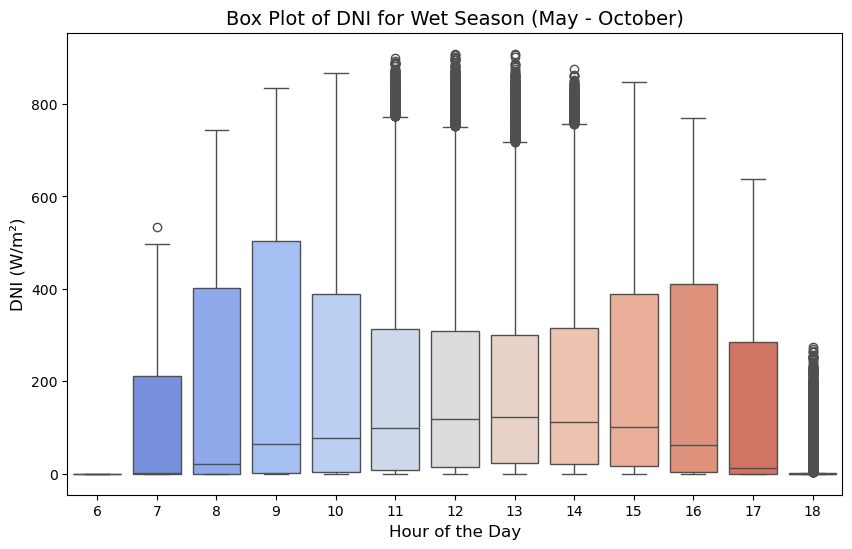

In [36]:
# Filter the data to only include hours from 6 AM to 6 PM
filtered_df = wet_df[(wet_df['Hour'] >= 6) & (wet_df['Hour'] <= 18)]

# Create a box plot for DNI by Hour (for hours between 6 AM and 6 PM)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='DNI', data=filtered_df, palette='coolwarm')

# Add labels and title
plt.title('Box Plot of DNI for Wet Season (May - October)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('DNI (W/m²)', fontsize=12)

# Display the plot
plt.show()


### Clearsky Forecasting

#### RF

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load dataset
df = pd.read_csv('training_data.csv')

# Extract Wet season dataset
wet_df =  df.loc[(df['Month'] >= 5 ) & (df['Month'] <= 10)]

# Filter out night (inutile) data
df = wet_df.loc[(wet_df['Hour'] >= 7 ) & (wet_df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed'
                  ]

target_columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features 
scaler_rf = StandardScaler()
X_train_scaled = scaler_rf.fit_transform(X_train)
X_test_scaled = scaler_rf.transform(X_test)
joblib.dump(scaler_rf, 'feature_scaler_clr_wet_rf.pkl')

# Standardizing the target variables
target_scaler_rf = MinMaxScaler()
y_train_scaled = target_scaler_rf.fit_transform(y_train)
y_test_scaled = target_scaler_rf.transform(y_test)
joblib.dump(target_scaler_rf, 'target_scaler_clr_wet_rf.pkl')

# Train a Random Forest model using MultiOutputRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_output_rf = MultiOutputRegressor(rf)
multi_output_rf.fit(X_train_scaled, y_train_scaled)

# Save the RF model
joblib.dump(multi_output_rf, 'clr_wet_rf.pkl')

# Predictions on training and testing sets
train_pred_scaled = multi_output_rf.predict(X_train_scaled)
test_pred_scaled = multi_output_rf.predict(X_test_scaled)

# Inverse transform predictions to get original scale
train_pred = target_scaler_rf.inverse_transform(train_pred_scaled)
test_pred = target_scaler_rf.inverse_transform(test_pred_scaled)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each component
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test.iloc[:, i], test_pred[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test.iloc[:, i], test_pred[:, i])
    nrmse = rmse / np.mean(y_test.iloc[:, i])
    r2 = r2_score(y_test.iloc[:, i], test_pred[:, i])

    print(f"Test MSE for {target} (Random Forest): {mse}")
    print(f"Test RMSE for {target} (Random Forest): {rmse}")
    print(f"Test MAE for {target} (Random Forest): {mae}")
    print(f"Test nRMSE for {target} (Random Forest): {nrmse}")
    print(f"Test R-squared for {target} (Random Forest): {r2}")
    print()


Test MSE for Clearsky DHI (Random Forest): 1086.7606338971761
Test RMSE for Clearsky DHI (Random Forest): 32.9660527497178
Test MAE for Clearsky DHI (Random Forest): 23.078381726158767
Test nRMSE for Clearsky DHI (Random Forest): 0.2196681615782875
Test R-squared for Clearsky DHI (Random Forest): 0.757247114075414

Test MSE for Clearsky DNI (Random Forest): 5698.322299107618
Test RMSE for Clearsky DNI (Random Forest): 75.48723268942648
Test MAE for Clearsky DNI (Random Forest): 57.04317128396377
Test nRMSE for Clearsky DNI (Random Forest): 0.1301757808384036
Test R-squared for Clearsky DNI (Random Forest): 0.8898962405606161

Test MSE for Clearsky GHI (Random Forest): 275.94477316196054
Test RMSE for Clearsky GHI (Random Forest): 16.611585510178145
Test MAE for Clearsky GHI (Random Forest): 12.028554874800205
Test nRMSE for Clearsky GHI (Random Forest): 0.028736529212584443
Test R-squared for Clearsky GHI (Random Forest): 0.9970812254186844



#### Prediction

In [37]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load Trained Models
scaler_rf = joblib.load('feature_scaler_clr_wet_rf.pkl')
target_scaler_rf = joblib.load('target_scaler_clr_wet_rf.pkl')
multi_output_rf = joblib.load('clr_wet_rf.pkl')

# Define a function to make predictions
def make_prediction(df):
    # Define feature columns
    feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                       'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                       'Wind Direction', 'Wind Speed'
                      ]

    # Ensure the DataFrame has the correct columns
    df = df[feature_columns]

    # Standardize the features
    X_scaled = scaler_rf.transform(df)

    # Make predictions
    pred_scaled = multi_output_rf.predict(X_scaled)

    # Inverse transform predictions to get original scale
    pred = target_scaler_rf.inverse_transform(pred_scaled)

    # Create a DataFrame for the predictions
    pred_df = pd.DataFrame(pred, columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'])

    return pred_df


# Load your new dataset
# new_data = forecast_df
new_data = current_df

# Make predictions
clr_wet_rf_predictions = make_prediction(new_data)
clr_wet_rf_predictions = pd.concat([new_data, clr_wet_rf_predictions], axis=1)
clr_wet_rf_predictions


Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain        156.36        654.79   

   Clearsky GHI  
0        609.82

#### CNN

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Input, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
df = pd.read_csv('training_data.csv')

# Extract Wet season dataset
wet_df =  df.loc[(df['Month'] >= 5 ) & (df['Month'] <= 10)]

# Filter out night (inutile) data
df = wet_df.loc[(wet_df['Hour'] >= 7) & (wet_df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed']

target_columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the feature scaler
joblib.dump(scaler, 'feature_scaler_clr_wet_cnn.pkl')

# Standardizing the target variables
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_test_scaled = target_scaler.transform(y_test)

# Save the target scaler
joblib.dump(target_scaler, 'target_scaler_clr_wet_cnn.pkl')

# Reshape input data for CNN model
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Input(shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', padding='same',))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=256, kernel_size=2, activation='relu', padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=3))

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train_scaled, epochs=40, batch_size=64, validation_data=(X_test_cnn, y_test_scaled),
              callbacks=[early_stopping, reduce_lr])

# Generate predictions from CNN model
cnn_preds = cnn_model.predict(X_test_cnn)

# Inverse transform predictions to get original scale
cnn_preds = target_scaler.inverse_transform(cnn_preds)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each component
metrics = {}
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test[target], cnn_preds[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test[target], cnn_preds[:, i])
    nrmse = rmse / np.mean(y_test[target])
    r2 = r2_score(y_test[target], cnn_preds[:, i])

    metrics[target] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'nRMSE': nrmse,
        'R-squared': r2
    }

# Print out the metrics
for target, values in metrics.items():
    print(f"{target} - MSE: {values['MSE']}, RMSE: {values['RMSE']}, MAE: {values['MAE']}, nRMSE: {values['nRMSE']}, R-squared: {values['R-squared']}")

# Save the trained model
cnn_model.save('clr_wet_cnn.h5')


Epoch 1/40
470/470 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0079 - val_mse: 0.0079 - learning_rate: 0.0010
Epoch 2/40
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0065 - val_mse: 0.0065 - learning_rate: 0.0010
Epoch 3/40
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0052 - val_mse: 0.0052 - learning_rate: 0.0010
Epoch 4/40
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0050 - val_mse: 0.0050 - learning_rate: 0.0010
Epoch 5/40
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0053 - val_mse: 0.0053 - learning_rate: 0.0010
Epoch 6/40
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0046 - val_mse: 0.0046 - learning_rate: 0.0010
Epoch 7/40
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0045 - val_mse: 0.0045 - learning_rate: 0.0010
Epoch 

Clearsky DHI - MSE: 1333.4878502310848, RMSE: 36.51695291547591, MAE: 26.22643226221577, nRMSE: 0.24332946301713806, R-squared: 0.7021349376374304
Clearsky DNI - MSE: 5657.841850880091, RMSE: 75.21862702070605, MAE: 58.06581678724569, nRMSE: 0.12971257730824953, R-squared: 0.8906784092937431
Clearsky GHI - MSE: 837.3283339365678, RMSE: 28.936626167135792, MAE: 21.96205445941484, nRMSE: 0.050057726437734575, R-squared: 0.9911432543936065


#### Predictions

In [38]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf

# Load the saved feature scaler and target scaler
scaler = joblib.load('feature_scaler_clr_wet_cnn.pkl')
target_scaler = joblib.load('target_scaler_clr_wet_cnn.pkl')

# Load the trained CNN model
cnn_model = tf.keras.models.load_model('clr_wet_cnn.h5')

# Load your new dataset 
df_new = current_df
# df_new = forecast_df

# Define columns of interest 
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed']

# Select relevant columns from the DataFrame
X_new = df_new[feature_columns]

# Standardize the features
X_new_scaled = scaler.transform(X_new)

# Reshape the data for CNN input (samples, time steps, features)
X_new_cnn = X_new_scaled.reshape((X_new_scaled.shape[0], X_new_scaled.shape[1], 1))

# Generate predictions for the new data
cnn_preds_new = cnn_model.predict(X_new_cnn)

# Inverse transform the predictions to get the original scale
cnn_preds_new_inv = target_scaler.inverse_transform(cnn_preds_new)

# Create a DataFrame with the predictions
clr_wet_cnn_predictions = pd.DataFrame(cnn_preds_new_inv, columns=['Clearsky DHI',	'Clearsky DNI', 'Clearsky GHI'])

# Combine the predictions with the original new data
clr_wet_cnn_predictions = pd.concat([df_new, clr_wet_cnn_predictions], axis=1)

# Output the final DataFrame with the predictions
clr_wet_cnn_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain    154.555099    675.366821   

   Clearsky GHI  
0    710.232788

#### LSTM

In [101]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
df = pd.read_csv('training_data.csv')

# Extract Wet season dataset
wet_df =  df.loc[(df['Month'] >= 5 ) & (df['Month'] <= 10)]

# Filter out night (inutile) data
df = wet_df.loc[(wet_df['Hour'] >= 7 ) & (wet_df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed']

target_columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Check for NaNs or infinite values and handle them
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (important for LSTM)
scaler_lstm = StandardScaler()
X_train = scaler_lstm.fit_transform(X_train)
X_test = scaler_lstm.transform(X_test)
joblib.dump(scaler_lstm, 'feature_scaler_clr_wet_lstm.pkl')

# Standardizing the target variables
target_scaler_lstm = MinMaxScaler()
y_train = target_scaler_lstm.fit_transform(y_train)
y_test = target_scaler_lstm.transform(y_test)
joblib.dump(target_scaler_lstm, 'target_scaler_clr_wet_lstm.pkl')

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model 
model_lstm = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=100, return_sequences=True),
    Dropout(0.3),
    LSTM(units=100, return_sequences=True),
    Dropout(0.3),
    LSTM(units=100),
    Dropout(0.3),
    Dense(units=3)  # Output layer with 3 units for DHI, DNI, GHI
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with callbacks
history = model_lstm.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test),
                         callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
losses = model_lstm.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {losses[0]}")

# Make predictions
y_pred = model_lstm.predict(X_test)

# Inverse transform the predictions and the actual values
y_pred_inv = target_scaler_lstm.inverse_transform(y_pred)
y_test_inv = target_scaler_lstm.inverse_transform(y_test)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each target variable
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_inv[:, i], y_pred_inv[:, i])
    nrmse = rmse / np.mean(y_test_inv[:, i])
    r2 = r2_score(y_test_inv[:, i], y_pred_inv[:, i])

    print(f"Test MSE for {target}: {mse}")
    print(f"Test RMSE for {target}: {rmse}")
    print(f"Test MAE for {target}: {mae}")
    print(f"Test nRMSE for {target}: {nrmse}")
    print(f"Test R-squared for {target}: {r2}\n")

# Save the trained model
model_lstm.save('clr_wet_lstm.h5')


Epoch 1/40
470/470 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0773 - mse: 0.0773 - val_loss: 0.0087 - val_mse: 0.0087 - learning_rate: 0.0010
Epoch 2/40
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0053 - val_mse: 0.0053 - learning_rate: 0.0010
Epoch 3/40
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0046 - val_mse: 0.0046 - learning_rate: 0.0010
Epoch 4/40
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0043 - val_mse: 0.0043 - learning_rate: 0.0010
Epoch 5/40
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0043 - val_mse: 0.0043 - learning_rate: 0.0010
Epoch 6/40
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0042 - val_mse: 0.0042 - learning_rate: 0.0010
Epoch 7/40
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0040 - val_mse: 0.0040 - learning_rate: 0.0010
Epoch

Test MSE for Clearsky DHI: 1404.6895918070006
Test RMSE for Clearsky DHI: 37.47918878266979
Test MAE for Clearsky DHI: 26.301694147181625
Test nRMSE for Clearsky DHI: 0.24974128870812792
Test R-squared for Clearsky DHI: 0.6862303973814705

Test MSE for Clearsky DNI: 5873.773160275268
Test RMSE for Clearsky DNI: 76.6405451459948
Test MAE for Clearsky DNI: 58.3134243449094
Test nRMSE for Clearsky DNI: 0.1321646383476214
Test R-squared for Clearsky DNI: 0.8865061551288986

Test MSE for Clearsky GHI: 413.1762044163991
Test RMSE for Clearsky GHI: 20.326736196851652
Test MAE for Clearsky GHI: 15.187758782663177
Test nRMSE for Clearsky GHI: 0.03516340135981764
Test R-squared for Clearsky GHI: 0.9956296754990636



#### Prediction

In [39]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf

# Load the saved scalers
scaler_lstm = joblib.load('feature_scaler_clr_wet_lstm.pkl')
target_scaler_lstm = joblib.load('target_scaler_clr_wet_lstm.pkl')

# Load your new dataset 
df_new = current_df
# df_new = forecast_df


# Define columns of interest 
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed']

# Select relevant columns from the DataFrame
X_new = df_new[feature_columns]

# Standardize the features
X_new = scaler_lstm.transform(X_new)

# Reshape the data for LSTM input (samples, time steps, features)
X_new = X_new.reshape(X_new.shape[0], 1, X_new.shape[1])

# Load the trained LSTM model
model_lstm = tf.keras.models.load_model('clr_wet_lstm.h5')

# Make predictions
y_pred_new = model_lstm.predict(X_new)

# Inverse transform the predictions to get the actual GHI, DNI, DHI values
y_pred_new_inv = target_scaler_lstm.inverse_transform(y_pred_new)

# Extract predictions for GHI, DNI, and DHI
predicted_ghi = y_pred_new_inv[:, 2]
predicted_dni = y_pred_new_inv[:, 1]
predicted_dhi = y_pred_new_inv[:, 0]

# Create a DataFrame with the predictions
clr_wet_lstm_predictions = pd.DataFrame({
    'Clearsky DHI': predicted_dhi,
    'Clearsky DNI': predicted_dni,
    'Clearsky GHI': predicted_ghi,
})

# combine with the original data
clr_wet_lstm_predictions = pd.concat([df_new, clr_wet_lstm_predictions], axis=1)

# Output the final DataFrame
clr_wet_lstm_predictions
# df_results


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain    130.885696    665.657715   

   Clearsky GHI  
0    543.075012

### Cloudysky Forecasting

#### RF

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load dataset
df = pd.read_csv('training_data.csv')

# Extract Wet season dataset
wet_df =  df.loc[(df['Month'] >= 5 ) & (df['Month'] <= 10)]

# Filter out night (inutile) data
df = wet_df.loc[(wet_df['Hour'] >= 7 ) & (wet_df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Remove data with missing cloud properties
df =  df.query("`Fill Flag` != 4")

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',]

target_columns = ['DHI', 'DNI', 'GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
cld_scaler_rf = StandardScaler()
X_train_scaled = cld_scaler_rf.fit_transform(X_train)
X_test_scaled = cld_scaler_rf.transform(X_test)
joblib.dump(cld_scaler_rf, 'feature_scaler_cld_wet_rf.pkl')

# Standardizing the target variables
cld_target_scaler_rf_ = MinMaxScaler()
y_train_scaled = cld_target_scaler_rf_.fit_transform(y_train)
y_test_scaled = cld_target_scaler_rf_.transform(y_test)
joblib.dump(cld_target_scaler_rf_, 'target_scaler_cld_wet_rf.pkl')

# Train a Random Forest model using MultiOutputRegressor
cld_rf = RandomForestRegressor(random_state=42)
cld_rf = MultiOutputRegressor(cld_rf)
cld_rf.fit(X_train_scaled, y_train_scaled)

# Save the Pure RF model
joblib.dump(cld_rf, 'cld_wet_rf.pkl')

# Predictions on training and testing sets
train_pred_scaled = cld_rf.predict(X_train_scaled)
test_pred_scaled = cld_rf.predict(X_test_scaled)

# Inverse transform predictions to get original scale
train_pred = cld_target_scaler_rf_.inverse_transform(train_pred_scaled)
test_pred = cld_target_scaler_rf_.inverse_transform(test_pred_scaled)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each component
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test.iloc[:, i], test_pred[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test.iloc[:, i], test_pred[:, i])
    nrmse = rmse / np.mean(y_test.iloc[:, i])
    r2 = r2_score(y_test.iloc[:, i], test_pred[:, i])

    print(f"Test MSE for {target} (Random Forest): {mse}")
    print(f"Test RMSE for {target} (Random Forest): {rmse}")
    print(f"Test MAE for {target} (Random Forest): {mae}")
    print(f"Test nRMSE for {target} (Random Forest): {nrmse}")
    print(f"Test R-squared for {target} (Random Forest): {r2}")
    print()


Test MSE for DHI (Random Forest): 3690.535168665867
Test RMSE for DHI (Random Forest): 60.749775050331394
Test MAE for DHI (Random Forest): 39.02561775289886
Test nRMSE for DHI (Random Forest): 0.2723698892144731
Test R-squared for DHI (Random Forest): 0.8385571430921117

Test MSE for DNI (Random Forest): 8427.518681340796
Test RMSE for DNI (Random Forest): 91.8015178596781
Test MAE for DNI (Random Forest): 47.87583499933367
Test nRMSE for DNI (Random Forest): 0.5007497493667188
Test R-squared for DNI (Random Forest): 0.8576848940265045

Test MSE for GHI (Random Forest): 9250.890795748368
Test RMSE for GHI (Random Forest): 96.18155122344601
Test MAE for GHI (Random Forest): 61.40656137544986
Test nRMSE for GHI (Random Forest): 0.27105993321989197
Test R-squared for GHI (Random Forest): 0.8628455214436189



#### Prediction

In [41]:
import pandas as pd
import numpy as np
import joblib

# Load the saved models and scalers
cld_scaler_rf = joblib.load('feature_scaler_cld_wet_rf.pkl')
cld_target_scaler_rf_ = joblib.load('target_scaler_cld_wet_rf.pkl')
cld_rf = joblib.load('cld_wet_rf.pkl')

# Use the first stage RF predicions -- the clearsky predictions along with the weather variables
new_data = clr_wet_rf_predictions

# Ensure new data has the same features as the training data
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type' ]

# Check if all required columns are present
if not all(column in new_data.columns for column in feature_columns):
    missing_columns = [col for col in feature_columns if col not in new_data.columns]
    raise ValueError(f"Missing required columns: {missing_columns}")

# Extract features
X_new = new_data[feature_columns]

# Apply the feature scaler
X_new_scaled = cld_scaler_rf.transform(X_new)

# Make predictions
pred_scaled = cld_rf.predict(X_new_scaled)

# Inverse transform predictions to original scale
predictions = cld_target_scaler_rf_.inverse_transform(pred_scaled)

# Convert predictions to DataFrame
pred_df = pd.DataFrame(predictions, columns=['DHI', 'DNI', 'GHI'])

# Combine predictions with original data for reference
cld_pure_rf_predictions = pd.concat([new_data, pred_df], axis=1)
cld_pure_rf_predictions

Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain        156.36        654.79   

   Clearsky GHI     DHI    DNI     GHI  
0        609.82  191.84  47.31  216.32

#### LSTM

In [105]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
df = pd.read_csv('training_data.csv')

# Extract Wet season dataset
wet_df =  df.loc[(df['Month'] >= 5 ) & (df['Month'] <= 10)]

# Filter out night (inutile) data
df = wet_df.loc[(wet_df['Hour'] >= 7 ) & (wet_df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Remove data with missing cloud properties
df =  df.query("`Fill Flag` != 4")


# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type']

target_columns = ['DHI', 'DNI', 'GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Check for NaNs or infinite values and handle them
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (important for LSTM)
scaler_lstm = StandardScaler()
X_train = scaler_lstm.fit_transform(X_train)
X_test = scaler_lstm.transform(X_test)
joblib.dump(scaler_lstm, 'feature_scaler_cld_wet_lstm.pkl')

# Standardizing the target variables
target_scaler_lstm = MinMaxScaler()
y_train = target_scaler_lstm.fit_transform(y_train)
y_test = target_scaler_lstm.transform(y_test)
joblib.dump(target_scaler_lstm, 'target_scaler_cld_wet_lstm.pkl')

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
model_lstm = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(units=100, return_sequences=True),
    Dropout(0.3),
    LSTM(units=100),
    Dropout(0.3),
    Dense(units=3)  # Output layer with 3 units for DHI, DNI, GHI
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with callbacks
history = model_lstm.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test),
                         callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
losses = model_lstm.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {losses[0]}")

# Make predictions
y_pred = model_lstm.predict(X_test)

# Inverse transform the predictions and the actual values
y_pred_inv = target_scaler_lstm.inverse_transform(y_pred)
y_test_inv = target_scaler_lstm.inverse_transform(y_test)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each target variable
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_inv[:, i], y_pred_inv[:, i])
    nrmse = rmse / np.mean(y_test_inv[:, i])
    r2 = r2_score(y_test_inv[:, i], y_pred_inv[:, i])

    print(f"Test MSE for {target}: {mse}")
    print(f"Test RMSE for {target}: {rmse}")
    print(f"Test MAE for {target}: {mae}")
    print(f"Test nRMSE for {target}: {nrmse}")
    print(f"Test R-squared for {target}: {r2}\n")

# Save the trained model
model_lstm.save('cld_wet_lstm.h5')


Epoch 1/40


/home/peter/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0527 - mse: 0.0527 - val_loss: 0.0164 - val_mse: 0.0164 - learning_rate: 0.0010
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0146 - val_mse: 0.0146 - learning_rate: 0.0010
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0139 - val_mse: 0.0139 - learning_rate: 0.0010
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0131 - val_mse: 0.0131 - learning_rate: 0.0010
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0126 - val_mse: 0.0126 - learning_rate: 0.0010
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0124 - val_mse: 0.0124 - learning_rate: 0.0010
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0123 - val_mse: 0.0123 - learning_rate: 0.0010
Epoch 8/40
469/4

Test MSE for DHI: 3682.509537868025
Test RMSE for DHI: 60.683684280604
Test MAE for DHI: 40.332115373785584
Test nRMSE for DHI: 0.27207357312747793
Test R-squared for DHI: 0.8389082251724269

Test MSE for DNI: 8305.699951582546
Test RMSE for DNI: 91.13561297090477
Test MAE for DNI: 49.541723476196786
Test nRMSE for DNI: 0.4971174378981328
Test R-squared for DNI: 0.8597420411050968

Test MSE for GHI: 9200.517107943971
Test RMSE for GHI: 95.91932603987567
Test MAE for GHI: 64.42308563959213
Test nRMSE for GHI: 0.2703209272479253
Test R-squared for GHI: 0.8635923659406861



#### Predictions

In [7]:
clr_wet_lstm_predictions

Clearsky DHI  Clearsky DNI  Clearsky GHI
0    174.494293    688.322021    717.695251

In [43]:
import pandas as pd
import numpy as np
import joblib

# Load the saved models and scalers
scaler_lstm = joblib.load('feature_scaler_cld_wet_lstm.pkl')
target_scaler_lstm = joblib.load('target_scaler_cld_wet_lstm.pkl')
model_lstm = tf.keras.models.load_model('cld_wet_lstm.h5')

# Use the first stage LSTM predicions -- the clearsky predictions along with the weather variables
new_data = clr_wet_lstm_predictions

# Ensure new data has the same features as the training data
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type']

# Check if all required columns are present
if not all(column in new_data.columns for column in feature_columns):
    missing_columns = [col for col in feature_columns if col not in new_data.columns]
    raise ValueError(f"Missing required columns: {missing_columns}")

# Extract features
X_new = new_data[feature_columns]

# Apply the feature scaler
X_new_scaled = scaler_lstm.transform(X_new)

# Reshape the scaled data for LSTM input
X_new_scaled = X_new_scaled.reshape(X_new_scaled.shape[0], 1, X_new_scaled.shape[1])

# Make predictions using the loaded LSTM model
pred_scaled = model_lstm.predict(X_new_scaled)

# Inverse transform predictions to the original scale
predictions = target_scaler_lstm.inverse_transform(pred_scaled)

# Convert predictions to DataFrame
pred_df = pd.DataFrame(predictions, columns=['DHI', 'DNI', 'GHI'])

# Combine predictions with original data for reference
cld_wet_lstm_predictions = pd.concat([new_data, pred_df], axis=1)

# Display the final predictions DataFrame
cld_wet_lstm_predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain    130.885696    665.657715   

   Clearsky GHI         DHI         DNI         GHI  
0    543.075012  306.899872  167.705841  441.560669

####  CNN

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Input, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
df = pd.read_csv('training_data.csv')

# Extract Wet season dataset
wet_df =  df.loc[(df['Month'] >= 5 ) & (df['Month'] <= 10)]

# Filter out night (inutile) data
df = wet_df.loc[(wet_df['Hour'] >= 7 ) & (wet_df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Remove data with missing cloud properties
df =  df.query("`Fill Flag` != 4")

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type'
                  ]

target_columns = ['DHI', 'DNI', 'GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the feature scaler
joblib.dump(scaler, 'feature_scaler_cld_wet_cnn.pkl')

# Standardizing the target variables
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_test_scaled = target_scaler.transform(y_test)

# Save the target scaler
joblib.dump(target_scaler, 'target_scaler_cld_wet_cnn.pkl')

# Reshape input data for CNN model
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Input(shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', padding='same',))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=256, kernel_size=2, activation='relu', padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=3))

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train_scaled, epochs=40, batch_size=64, validation_data=(X_test_cnn, y_test_scaled),
              callbacks=[early_stopping, reduce_lr])

# Generate predictions from CNN model
cnn_preds = cnn_model.predict(X_test_cnn)

# Inverse transform predictions to get original scale
cnn_preds = target_scaler.inverse_transform(cnn_preds)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each component
metrics = {}
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test[target], cnn_preds[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test[target], cnn_preds[:, i])
    nrmse = rmse / np.mean(y_test[target])
    r2 = r2_score(y_test[target], cnn_preds[:, i])

    metrics[target] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'nRMSE': nrmse,
        'R-squared': r2
    }

# Print out the metrics
for target, values in metrics.items():
    print(f"{target} - MSE: {values['MSE']}, RMSE: {values['RMSE']}, MAE: {values['MAE']}, nRMSE: {values['nRMSE']}, R-squared: {values['R-squared']}")

# Save the trained model
cnn_model.save('cld_wet_cnn.h5')


Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0136 - val_mse: 0.0136 - learning_rate: 0.0010
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0130 - val_mse: 0.0130 - learning_rate: 0.0010
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0111 - val_mse: 0.0111 - learning_rate: 0.0010
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0112 - val_mse: 0.0112 - learning_rate: 0.0010
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0108 - val_mse: 0.0108 - learning_rate: 0.0010
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0103 - val_mse: 0.0103 - learning_rate: 0.0010
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0104 - val_mse: 0.0104 - learning_rate: 0.0010
Epoch

DHI - MSE: 3769.9683847940855, RMSE: 61.40006828004417, MAE: 41.47254819774984, nRMSE: 0.2752854604209022, R-squared: 0.8350823285302558
DNI - MSE: 8572.858023141993, RMSE: 92.58972957700003, MAE: 53.16632947907116, nRMSE: 0.5050492079061754, R-squared: 0.855230555494292
GHI - MSE: 9490.565274361632, RMSE: 97.41953230416183, MAE: 67.12169307616891, nRMSE: 0.2745488254741533, R-squared: 0.8592920876324034


#### Prediction

In [44]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# Load the saved feature scaler and target scaler
feature_scaler = joblib.load('feature_scaler_cld_wet_cnn.pkl')
target_scaler = joblib.load('target_scaler_cld_wet_cnn.pkl')

# Load the trained CNN model
cnn_model = load_model('cld_wet_cnn.h5')

# New data for prediction 
# Use the first stage CNN predicions -- the clearsky predictions along with the weather variables
new_data = clr_wet_cnn_predictions

feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 'Relative Humidity',
                   'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed', 
                   'Clearsky DHI',	'Clearsky DNI', 'Clearsky GHI', 'Cloud Type'
                  ]

# Scale the features
new_data_scaled = feature_scaler.transform(new_data[feature_columns])

# Reshape for CNN model input
new_data_cnn = new_data_scaled.reshape((new_data_scaled.shape[0], new_data_scaled.shape[1], 1))

# Predict using the trained model
predictions_scaled = cnn_model.predict(new_data_cnn)

# Inverse transform predictions to the original scale
predictions = target_scaler.inverse_transform(predictions_scaled)


# Convert predictions to DataFrame
pred_df = pd.DataFrame(predictions, columns=['DHI', 'DNI', 'GHI'])

# Combine predictions with original data for reference
cld_wet_cnn_predictions = pd.concat([new_data, pred_df], axis=1)
cld_wet_cnn_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain    154.555099    675.366821   

   Clearsky GHI         DHI         DNI         GHI  
0    710.232788  283.851196  111.275162  361.654022

## Dry Season

In [45]:
# Load dataset
df = pd.read_csv('../datasets/merged_data.csv')

# Extract Wet season dataset
dry_df =  df.loc[(df['Month'] <= 4 ) | (df['Month'] >= 11)]

# Drop NaNs
dry_df = dry_df.dropna()
dry_df.shape


cols = ['Precipitable Water', 'Dew Point', 
        'Relative Humidity', 'Pressure', 'Temperature','Wind Direction', 
        'Wind Speed','Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
        'DHI', 'DNI', 'GHI'
       ]

dry_stat = dry_df[cols].describe().T.round(2)
dry_stat['range'] = dry_stat.apply(lambda x: f"{x['min']} - {x['max']}", axis=1)
dry_stat

count    mean     std     min     25%    50%     75%  \
Precipitable Water  78288.0    4.02    1.02    0.80    3.40    4.2    4.80   
Dew Point           78288.0   22.14    3.23    5.00   21.30   23.3   24.20   
Relative Humidity   78288.0   84.03   16.36   19.28   72.98   88.7   99.81   
Pressure            78288.0  986.43    1.70  980.00  985.00  986.0  988.00   
Temperature         78288.0   25.41    3.38   11.30   23.20   24.9   28.20   
Wind Direction      78288.0  183.35   75.22    1.00  153.00  202.0  228.00   
Wind Speed          78288.0    1.37    0.72    0.10    0.90    1.2    1.70   
Clearsky DHI        78288.0  113.83  148.45    0.00    0.00    0.0  221.00   
Clearsky DNI        78288.0  187.20  254.66    0.00    0.00    0.0  389.00   
Clearsky GHI        78288.0  250.85  330.59    0.00    0.00    0.0  553.00   
DHI                 78288.0  123.69  167.60    0.00    0.00    0.0  236.00   
DNI                 78288.0  141.34  224.71    0.00    0.00    0.0  233.00   
GHI                 78288.0  227.22  309.56    0.00    0.00    0.0  482.00   

                       max          range  
Precipitable Water     6.6      0.8 - 6.6  
Dew Point             27.3     5.0 - 27.3  
Relative Humidity    100.0  19.28 - 100.0  
Pressure             993.0  980.0 - 993.0  
Temperature           35.5    11.3 - 35.5  
Wind Direction       360.0    1.0 - 360.0  
Wind Speed             5.6      0.1 - 5.6  
Clearsky DHI         670.0    0.0 - 670.0  
Clearsky DNI         921.0    0.0 - 921.0  
Clearsky GHI        1020.0   0.0 - 1020.0  
DHI                  740.0    0.0 - 740.0  
DNI                  921.0    0.0 - 921.0  
GHI                 1020.0   0.0 - 1020.0

In [52]:
dry_df.shape

(78288, 22)

/tmp/ipykernel_6564/4228218890.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hour', y='DNI', data=filtered_df, palette='coolwarm')


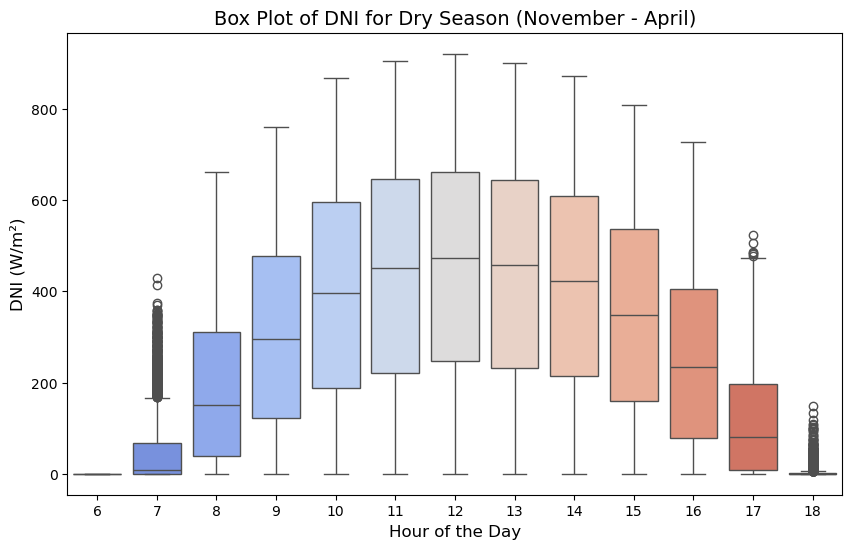

In [46]:
# Filter the data to only include hours from 6 AM to 6 PM
filtered_df = dry_df[(dry_df['Hour'] >= 6) & (dry_df['Hour'] <= 18)]

# Create a box plot for DNI by Hour (for hours between 6 AM and 6 PM)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='DNI', data=filtered_df, palette='coolwarm')

# Add labels and title
plt.title('Box Plot of DNI for Dry Season (November - April)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('DNI (W/m²)', fontsize=12)

# Display the plot
plt.show()


### Clearsky Forecasting

#### RF

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load dataset
df = pd.read_csv('training_data.csv')

# Extract dry season dataset
dry_df =  df.loc[(df['Month'] >= 11 ) | (df['Month'] <= 4)]

# Filter out night (inutile) data
df = dry_df.loc[(dry_df['Hour'] >= 7 ) & (dry_df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed'
                  ]

target_columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler_rf = StandardScaler()
X_train_scaled = scaler_rf.fit_transform(X_train)
X_test_scaled = scaler_rf.transform(X_test)
joblib.dump(scaler_rf, 'feature_scaler_clr_dry_rf.pkl')

# Standardizing the target variables
target_scaler_rf = MinMaxScaler()
y_train_scaled = target_scaler_rf.fit_transform(y_train)
y_test_scaled = target_scaler_rf.transform(y_test)
joblib.dump(target_scaler_rf, 'target_scaler_clr_dry_rf.pkl')

# Train a Random Forest model using MultiOutputRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_output_rf = MultiOutputRegressor(rf)
multi_output_rf.fit(X_train_scaled, y_train_scaled)

# Save the Pure RF model
joblib.dump(multi_output_rf, 'clr_dry_rf.pkl')

# Predictions on training and testing sets
train_pred_scaled = multi_output_rf.predict(X_train_scaled)
test_pred_scaled = multi_output_rf.predict(X_test_scaled)

# Inverse transform predictions to get original scale
train_pred = target_scaler_rf.inverse_transform(train_pred_scaled)
test_pred = target_scaler_rf.inverse_transform(test_pred_scaled)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each component
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test.iloc[:, i], test_pred[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test.iloc[:, i], test_pred[:, i])
    nrmse = rmse / np.mean(y_test.iloc[:, i])
    r2 = r2_score(y_test.iloc[:, i], test_pred[:, i])

    print(f"Test MSE for {target} (Random Forest): {mse}")
    print(f"Test RMSE for {target} (Random Forest): {rmse}")
    print(f"Test MAE for {target} (Random Forest): {mae}")
    print(f"Test nRMSE for {target} (Random Forest): {nrmse}")
    print(f"Test R-squared for {target} (Random Forest): {r2}")
    print()


Test MSE for Clearsky DHI (Random Forest): 2164.2966863962138
Test RMSE for Clearsky DHI (Random Forest): 46.52200217527416
Test MAE for Clearsky DHI (Random Forest): 32.239552400270455
Test nRMSE for Clearsky DHI (Random Forest): 0.2056931376188401
Test R-squared for Clearsky DHI (Random Forest): 0.8770865018583922

Test MSE for Clearsky DNI (Random Forest): 10296.564085179176
Test RMSE for Clearsky DNI (Random Forest): 101.47198670164676
Test MAE for Clearsky DNI (Random Forest): 75.88804192021637
Test nRMSE for Clearsky DNI (Random Forest): 0.2685910369801952
Test R-squared for Clearsky DNI (Random Forest): 0.829146444046068

Test MSE for Clearsky GHI (Random Forest): 890.2333962677483
Test RMSE for Clearsky GHI (Random Forest): 29.836779254265167
Test MAE for Clearsky GHI (Random Forest): 21.64843002028397
Test nRMSE for Clearsky GHI (Random Forest): 0.05930255466955369
Test R-squared for Clearsky GHI (Random Forest): 0.9904197947272191



#### Prediction

In [51]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load Trained Models
scaler_rf = joblib.load('feature_scaler_clr_dry_rf.pkl')
target_scaler_rf = joblib.load('target_scaler_clr_dry_rf.pkl')
multi_output_rf = joblib.load('clr_dry_rf.pkl')

# Define a function to make predictions
def make_prediction(df):
    # Define feature columns
    feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                       'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                       'Wind Direction', 'Wind Speed'
                      ]

    # Ensure the DataFrame has the correct columns
    df = df[feature_columns]

    # Standardize the features
    X_scaled = scaler_rf.transform(df)

    # Make predictions
    pred_scaled = multi_output_rf.predict(X_scaled)

    # Inverse transform predictions to get original scale
    pred = target_scaler_rf.inverse_transform(pred_scaled)

    # Create a DataFrame for the predictions
    pred_df = pd.DataFrame(pred, columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'])

    return pred_df


# Load your new dataset (replace 'new_data.csv' with your actual dataset path)
# new_data = forecast_df
new_data = current_df

# Make predictions
clr_dry_rf_predictions = make_prediction(new_data)
clr_dry_rf_predictions = pd.concat([new_data, clr_dry_rf_predictions], axis=1)
clr_dry_rf_predictions


Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain        225.25         334.9   

   Clearsky GHI  
0        474.54

#### CNN

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Input, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
df = pd.read_csv('training_data.csv')

# Extract dry season dataset
dry_df =  df.loc[(df['Month'] >= 11 ) | (df['Month'] <= 4)]

# Filter out night (inutile) data
df = dry_df.loc[(dry_df['Hour'] >= 7 ) & (dry_df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed'
                  ]

target_columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the feature scaler
joblib.dump(scaler, 'feature_scaler_clr_dry_cnn.pkl')

# Standardizing the target variables
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_test_scaled = target_scaler.transform(y_test)

# Save the target scaler
joblib.dump(target_scaler, 'target_scaler_clr_dry_cnn.pkl')

# Reshape input data for CNN model
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Input(shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', padding='same',))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=256, kernel_size=2, activation='relu', padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=3))

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train_scaled, epochs=40, batch_size=64, validation_data=(X_test_cnn, y_test_scaled),
              callbacks=[early_stopping, reduce_lr])

# Generate predictions from CNN model
cnn_preds = cnn_model.predict(X_test_cnn)

# Inverse transform predictions to get original scale
cnn_preds = target_scaler.inverse_transform(cnn_preds)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each component
metrics = {}
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test[target], cnn_preds[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test[target], cnn_preds[:, i])
    nrmse = rmse / np.mean(y_test[target])
    r2 = r2_score(y_test[target], cnn_preds[:, i])

    metrics[target] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'nRMSE': nrmse,
        'R-squared': r2
    }

# Print out the metrics
for target, values in metrics.items():
    print(f"{target} - MSE: {values['MSE']}, RMSE: {values['RMSE']}, MAE: {values['MAE']}, nRMSE: {values['nRMSE']}, R-squared: {values['R-squared']}")

# Save the trained model
cnn_model.save('clr_dry_cnn.h5')


Epoch 1/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0121 - val_mse: 0.0121 - learning_rate: 0.0010
Epoch 2/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0110 - val_mse: 0.0110 - learning_rate: 0.0010
Epoch 3/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0102 - val_mse: 0.0102 - learning_rate: 0.0010
Epoch 4/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0103 - val_mse: 0.0103 - learning_rate: 0.0010
Epoch 5/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0099 - val_mse: 0.0099 - learning_rate: 0.0010
Epoch 6/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0093 - val_mse: 0.0093 - learning_rate: 0.0010
Epoch 7/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0092 - val_mse: 0.0092 - learning_rate: 0.0010
Epoch 

Clearsky DHI - MSE: 2618.082152986582, RMSE: 51.167198017739665, MAE: 36.693255931457365, nRMSE: 0.2262314821228208, R-squared: 0.8513153774764954
Clearsky DNI - MSE: 10419.616116618958, RMSE: 102.07652088810119, MAE: 77.61773411568312, nRMSE: 0.27019120732580193, R-squared: 0.827104609802633
Clearsky GHI - MSE: 1271.5725331274423, RMSE: 35.65911570871384, MAE: 27.473736366780727, nRMSE: 0.0708748300465993, R-squared: 0.9863160313490115


#### Predictions

In [48]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf

# Load the saved feature scaler and target scaler
scaler = joblib.load('feature_scaler_clr_dry_cnn.pkl')
target_scaler = joblib.load('target_scaler_clr_dry_cnn.pkl')

# Load the trained CNN model
cnn_model = tf.keras.models.load_model('clr_dry_cnn.h5')

# Load your new dataset 
df_new = current_df
# df_new = forecast_df

# Define columns of interest 
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed']

# Select relevant columns from the DataFrame
X_new = df_new[feature_columns]

# Standardize the features
X_new_scaled = scaler.transform(X_new)

# Reshape the data for CNN input (samples, time steps, features)
X_new_cnn = X_new_scaled.reshape((X_new_scaled.shape[0], X_new_scaled.shape[1], 1))

# Generate predictions for the new data
cnn_preds_new = cnn_model.predict(X_new_cnn)

# Inverse transform the predictions to get the original scale
cnn_preds_new_inv = target_scaler.inverse_transform(cnn_preds_new)

# Create a DataFrame with the predictions
clr_dry_cnn_predictions = pd.DataFrame(cnn_preds_new_inv, columns=['Clearsky DHI',	'Clearsky DNI', 'Clearsky GHI'])

# Combine the predictions with the original new data
clr_dry_cnn_predictions = pd.concat([df_new, clr_dry_cnn_predictions], axis=1)

# Output the final DataFrame with the predictions
clr_dry_cnn_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain    173.626465    526.256531   

   Clearsky GHI  
0    635.189392

#### LSTM

In [112]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
df = pd.read_csv('training_data.csv')

# Extract dry season dataset
dry_df =  df.loc[(df['Month'] >= 11 ) | (df['Month'] <= 4)]

# Filter out night (inutile) data
df = dry_df.loc[(dry_df['Hour'] >= 7 ) & (dry_df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed']

target_columns = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Check for NaNs or infinite values and handle them
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (important for LSTM)
scaler_lstm = StandardScaler()
X_train = scaler_lstm.fit_transform(X_train)
X_test = scaler_lstm.transform(X_test)
joblib.dump(scaler_lstm, 'feature_scaler_clr_dry_lstm.pkl')

# Standardizing the target variables
target_scaler_lstm = MinMaxScaler()
y_train = target_scaler_lstm.fit_transform(y_train)
y_test = target_scaler_lstm.transform(y_test)
joblib.dump(target_scaler_lstm, 'target_scaler_clr_dry_lstm.pkl')

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
model_lstm = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=100, return_sequences=True),
    Dropout(0.3),
    LSTM(units=100, return_sequences=True),
    Dropout(0.3),
    LSTM(units=100),
    Dropout(0.3),
    Dense(units=3)  # Output layer with 3 units for DHI, DNI, GHI
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with callbacks
history = model_lstm.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test),
                         callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
losses = model_lstm.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {losses[0]}")

# Make predictions
y_pred = model_lstm.predict(X_test)

# Inverse transform the predictions and the actual values
y_pred_inv = target_scaler_lstm.inverse_transform(y_pred)
y_test_inv = target_scaler_lstm.inverse_transform(y_test)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each target variable
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_inv[:, i], y_pred_inv[:, i])
    nrmse = rmse / np.mean(y_test_inv[:, i])
    r2 = r2_score(y_test_inv[:, i], y_pred_inv[:, i])

    print(f"Test MSE for {target}: {mse}")
    print(f"Test RMSE for {target}: {rmse}")
    print(f"Test MAE for {target}: {mae}")
    print(f"Test nRMSE for {target}: {nrmse}")
    print(f"Test R-squared for {target}: {r2}\n")

# Save the trained model
model_lstm.save('clr_dry_lstm.h5')


Epoch 1/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0673 - mse: 0.0673 - val_loss: 0.0135 - val_mse: 0.0135 - learning_rate: 0.0010
Epoch 2/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0114 - val_mse: 0.0114 - learning_rate: 0.0010
Epoch 3/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0105 - val_mse: 0.0105 - learning_rate: 0.0010
Epoch 4/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0103 - val_mse: 0.0103 - learning_rate: 0.0010
Epoch 5/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0100 - val_mse: 0.0100 - learning_rate: 0.0010
Epoch 6/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0100 - val_mse: 0.0100 - learning_rate: 0.0010
Epoch 7/40
463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0098 - val_mse: 0.0098 - learning_rate: 0.0010
Epoch 

Test MSE for Clearsky DHI: 3115.4254135515307
Test RMSE for Clearsky DHI: 55.81599603654431
Test MAE for Clearsky DHI: 39.39508532656456
Test nRMSE for Clearsky DHI: 0.24678575334789712
Test R-squared for Clearsky DHI: 0.823070543800305

Test MSE for Clearsky DNI: 12367.912393927567
Test RMSE for Clearsky DNI: 111.2111163235383
Test MAE for Clearsky DNI: 84.26078378343357
Test nRMSE for Clearsky DNI: 0.29437000326888757
Test R-squared for Clearsky DNI: 0.7947760248226085

Test MSE for Clearsky GHI: 1044.4847028966599
Test RMSE for Clearsky GHI: 32.31848856145132
Test MAE for Clearsky GHI: 24.399213997023264
Test nRMSE for Clearsky GHI: 0.06423511460201721
Test R-squared for Clearsky GHI: 0.9887598264680019



#### Prediction

In [49]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf

# Load the saved scalers
scaler_lstm = joblib.load('feature_scaler_clr_dry_lstm.pkl')
target_scaler_lstm = joblib.load('target_scaler_clr_dry_lstm.pkl')

# Load your new dataset 
df_new = current_df
# df_new = forecast_df

# Define columns of interest 
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                   'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                   'Wind Direction', 'Wind Speed']

# Select relevant columns from the DataFrame
X_new = df_new[feature_columns]

# Standardize the features
X_new = scaler_lstm.transform(X_new)

# Reshape the data for LSTM input (samples, time steps, features)
X_new = X_new.reshape(X_new.shape[0], 1, X_new.shape[1])

# Load the trained LSTM model
model_lstm = tf.keras.models.load_model('clr_dry_lstm.h5')

# Make predictions
y_pred_new = model_lstm.predict(X_new)

# Inverse transform the predictions to get the actual GHI, DNI, DHI values
y_pred_new_inv = target_scaler_lstm.inverse_transform(y_pred_new)

# Extract predictions for GHI, DNI, and DHI
predicted_ghi = y_pred_new_inv[:, 2]
predicted_dni = y_pred_new_inv[:, 1]
predicted_dhi = y_pred_new_inv[:, 0]

# Create a DataFrame with the predictions
clr_dry_lstm_predictions = pd.DataFrame({
    'Clearsky DHI': predicted_dhi,
    'Clearsky DNI': predicted_dni,
    'Clearsky GHI': predicted_ghi,
})

# combine with the original data
clr_dry_lstm_predictions = pd.concat([df_new, clr_dry_lstm_predictions], axis=1)

# Output the final DataFrame
clr_dry_lstm_predictions
# df_results


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain    232.105743    344.308533   

   Clearsky GHI  
0     429.50885

### Cloudysky Forecasting

#### RF

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load dataset
df = pd.read_csv('training_data.csv')

# Extract dry season dataset
dry_df =  df.loc[(df['Month'] >= 11 ) | (df['Month'] <= 4)]

# Filter out night (inutile) data
df = dry_df.loc[(dry_df['Hour'] >= 7 ) & (dry_df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Remove data with missing cloud properties
df =  df.query("`Fill Flag` != 4")

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',]

target_columns = ['DHI', 'DNI', 'GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
cld_scaler_rf = StandardScaler()
X_train_scaled = cld_scaler_rf.fit_transform(X_train)
X_test_scaled = cld_scaler_rf.transform(X_test)
joblib.dump(cld_scaler_rf, 'feature_scaler_cld_dry_rf.pkl')

# Standardizing the target variables
cld_target_scaler_rf_ = MinMaxScaler()
y_train_scaled = cld_target_scaler_rf_.fit_transform(y_train)
y_test_scaled = cld_target_scaler_rf_.transform(y_test)
joblib.dump(cld_target_scaler_rf_, 'target_scaler_cld_dry_rf.pkl')

# Train a Random Forest model using MultiOutputRegressor
cld_rf = RandomForestRegressor(random_state=42)
cld_rf = MultiOutputRegressor(cld_rf)
cld_rf.fit(X_train_scaled, y_train_scaled)

# Save the Pure RF model
joblib.dump(cld_rf, 'cld_dry_rf.pkl')

# Predictions on training and testing sets
train_pred_scaled = cld_rf.predict(X_train_scaled)
test_pred_scaled = cld_rf.predict(X_test_scaled)

# Inverse transform predictions to get original scale
train_pred = cld_target_scaler_rf_.inverse_transform(train_pred_scaled)
test_pred = cld_target_scaler_rf_.inverse_transform(test_pred_scaled)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each component
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test.iloc[:, i], test_pred[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test.iloc[:, i], test_pred[:, i])
    nrmse = rmse / np.mean(y_test.iloc[:, i])
    r2 = r2_score(y_test.iloc[:, i], test_pred[:, i])

    print(f"Test MSE for {target} (Random Forest): {mse}")
    print(f"Test RMSE for {target} (Random Forest): {rmse}")
    print(f"Test MAE for {target} (Random Forest): {mae}")
    print(f"Test nRMSE for {target} (Random Forest): {nrmse}")
    print(f"Test R-squared for {target} (Random Forest): {r2}")
    print()


Test MSE for DHI (Random Forest): 1436.9576380275976
Test RMSE for DHI (Random Forest): 37.907224087601
Test MAE for DHI (Random Forest): 16.142915313852953
Test nRMSE for DHI (Random Forest): 0.15442517868500152
Test R-squared for DHI (Random Forest): 0.9424807439566546

Test MSE for DNI (Random Forest): 4037.9756336309524
Test RMSE for DNI (Random Forest): 63.54506773645735
Test MAE for DNI (Random Forest): 25.68540043290069
Test nRMSE for DNI (Random Forest): 0.22260778896370542
Test R-squared for DNI (Random Forest): 0.9357313245856238

Test MSE for GHI (Random Forest): 2992.3996174918825
Test RMSE for GHI (Random Forest): 54.702830068396665
Test MAE for GHI (Random Forest): 22.752514880952692
Test nRMSE for GHI (Random Forest): 0.12037083768782134
Test R-squared for GHI (Random Forest): 0.96596694332283



#### Prediction

In [52]:
import pandas as pd
import numpy as np
import joblib

# Load the saved models and scalers
cld_scaler_rf = joblib.load('feature_scaler_cld_dry_rf.pkl')
cld_target_scaler_rf_ = joblib.load('target_scaler_cld_dry_rf.pkl')
cld_rf = joblib.load('cld_dry_rf.pkl')

# Use the first stage RF predicions -- the clearsky predictions along with the weather variables
new_data = clr_dry_rf_predictions

# Ensure new data has the same features as the training data
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type' ]

# Check if all required columns are present
if not all(column in new_data.columns for column in feature_columns):
    missing_columns = [col for col in feature_columns if col not in new_data.columns]
    raise ValueError(f"Missing required columns: {missing_columns}")

# Extract features
X_new = new_data[feature_columns]

# Apply the feature scaler
X_new_scaled = cld_scaler_rf.transform(X_new)

# Make predictions
pred_scaled = cld_rf.predict(X_new_scaled)

# Inverse transform predictions to original scale
predictions = cld_target_scaler_rf_.inverse_transform(pred_scaled)

# Convert predictions to DataFrame
pred_df = pd.DataFrame(predictions, columns=['DHI', 'DNI', 'GHI'])

# Combine predictions with original data for reference
cld_dry_rf_predictions = pd.concat([new_data, pred_df], axis=1)
cld_dry_rf_predictions

Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain        225.25         334.9   

   Clearsky GHI     DHI    DNI     GHI  
0        474.54  185.72  19.46  133.34

#### Plot RF Dry Season Prediction
Use the plot below only if you have forcasted weather data 


/tmp/ipykernel_8395/328835388.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



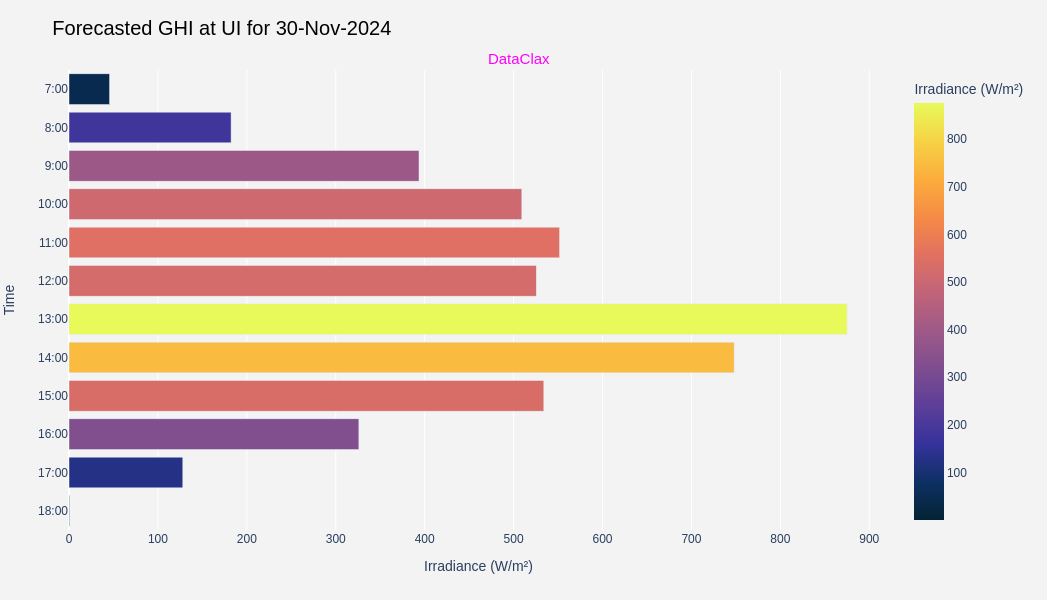

In [123]:
import plotly.express as px

final_pred = cld_dry_rf_predictions.query("`Day` == 30")
# Create a new column for time in "Hour:Minute" format
final_pred['Time'] = final_pred['Hour'].astype(str) + ":" + final_pred['Minute'].astype(str).str.zfill(2)

# Plot the GHI as a horizontal bar plot using Plotly
fig = px.bar(final_pred, 
             y='Time', 
             x='GHI', 
             orientation='h',
             title='Forecasted GHI at UI for 30-Nov-2024',
             labels={'GHI': 'Irradiance (W/m²)', 'Time': 'Time'},
             color='GHI',  # Color based on GHI values for a gradient effect
             color_continuous_scale='thermal'  # Using a color scale that is visually appealing
            )

# Update layout to invert the y-axis and enhance aesthetics, as well as adjust the width and height
fig.update_layout(
    yaxis=dict(autorange="reversed"),  # Invert the y-axis
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis_title_font=dict(size=14, family='Arial'),
    yaxis_title_font=dict(size=14, family='Arial'),
    plot_bgcolor='rgb(243, 243, 243)',  # Set background to ggplot style (light gray)
    paper_bgcolor='rgb(243, 243, 243)',  # Set paper background to match ggplot style
    showlegend=False,  # Remove legend if not needed
    width=900,  # Set a smaller width
    height=600,  # Set a larger height for better visualization
    margin=dict(l=50, r=50, t=70, b=70),  # Adjust margins for a better layout
    annotations=[
        dict(
            x=0.55,  # Place signature towards the bottom-right
            y=1.05,
            xref="paper",
            yref="paper",
            text="DataClax",
            showarrow=False,
            font=dict(size=15, color="magenta", family="Arial"),
            align="right"
        )
    ]
)

# Show the plot
fig.show()


####  LSTM

In [114]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
df = pd.read_csv('training_data.csv')

# Extract dry season dataset
dry_df =  df.loc[(df['Month'] >= 11 ) | (df['Month'] <= 4)]

# Filter out night (inutile) data
df = dry_df.loc[(dry_df['Hour'] >= 7) & (dry_df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Remove data with missing cloud properties
df =  df.query("`Fill Flag` != 4")


# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type']

target_columns = ['DHI', 'DNI', 'GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Check for NaNs or infinite values and handle them
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (important for LSTM)
scaler_lstm = StandardScaler()
X_train = scaler_lstm.fit_transform(X_train)
X_test = scaler_lstm.transform(X_test)
joblib.dump(scaler_lstm, 'feature_scaler_cld_dry_lstm.pkl')

# Standardizing the target variables
target_scaler_lstm = MinMaxScaler()
y_train = target_scaler_lstm.fit_transform(y_train)
y_test = target_scaler_lstm.transform(y_test)
joblib.dump(target_scaler_lstm, 'target_scaler_cld_dry_lstm.pkl')

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model 
model_lstm = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(units=100, return_sequences=True),
    Dropout(0.3),
    LSTM(units=100),
    Dropout(0.3),
    Dense(units=3)  # Output layer with 3 units for DHI, DNI, GHI
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model with callbacks
history = model_lstm.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test),
                         callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
losses = model_lstm.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {losses[0]}")

# Make predictions
y_pred = model_lstm.predict(X_test)

# Inverse transform the predictions and the actual values
y_pred_inv = target_scaler_lstm.inverse_transform(y_pred)
y_test_inv = target_scaler_lstm.inverse_transform(y_test)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each target variable
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_inv[:, i], y_pred_inv[:, i])
    nrmse = rmse / np.mean(y_test_inv[:, i])
    r2 = r2_score(y_test_inv[:, i], y_pred_inv[:, i])

    print(f"Test MSE for {target}: {mse}")
    print(f"Test RMSE for {target}: {rmse}")
    print(f"Test MAE for {target}: {mae}")
    print(f"Test nRMSE for {target}: {nrmse}")
    print(f"Test R-squared for {target}: {r2}\n")

# Save the trained model
model_lstm.save('cld_dry_lstm.h5')


Epoch 1/40


/home/peter/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



462/462 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0517 - mse: 0.0517 - val_loss: 0.0091 - val_mse: 0.0091 - learning_rate: 0.0010
Epoch 2/40
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0074 - val_mse: 0.0074 - learning_rate: 0.0010
Epoch 3/40
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0067 - val_mse: 0.0067 - learning_rate: 0.0010
Epoch 4/40
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0062 - val_mse: 0.0062 - learning_rate: 0.0010
Epoch 5/40
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0061 - val_mse: 0.0061 - learning_rate: 0.0010
Epoch 6/40
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0060 - val_mse: 0.0060 - learning_rate: 0.0010
Epoch 7/40
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0057 - val_mse: 0.0057 - learning_rate: 0.0010
Epoch 8/40
462/46

Test MSE for DHI: 1544.211653626848
Test RMSE for DHI: 39.29645853797576
Test MAE for DHI: 19.174035309213192
Test nRMSE for DHI: 0.16008459541619532
Test R-squared for DHI: 0.9381875268000248

Test MSE for DNI: 4277.733738512478
Test RMSE for DNI: 65.40438623297736
Test MAE for DNI: 30.883273148852766
Test nRMSE for DNI: 0.22912125718764714
Test R-squared for DNI: 0.9319153194338688

Test MSE for GHI: 3346.4900393415496
Test RMSE for GHI: 57.848855125590426
Test MAE for GHI: 28.098695498895207
Test nRMSE for GHI: 0.12729350825253985
Test R-squared for GHI: 0.9619398142839106



#### Predictions

In [7]:
clr_pure_lstm_predictions

Clearsky DHI  Clearsky DNI  Clearsky GHI
0    174.494293    688.322021    717.695251

In [19]:
import pandas as pd
import numpy as np
import joblib

# Load the saved models and scalers
scaler_lstm = joblib.load('feature_scaler_cld_dry_lstm.pkl')
target_scaler_lstm = joblib.load('target_scaler_cld_dry_lstm.pkl')
model_lstm = tf.keras.models.load_model('cld_dry_lstm.h5')

# Use the first stage LSTM predicions -- the clearsky predictions along with the weather variables
new_data = clr_dry_lstm_predictions

# Ensure new data has the same features as the training data
feature_columns = ['Month', 'Day', 'Hour', 'Minute', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type']

# Check if all required columns are present
if not all(column in new_data.columns for column in feature_columns):
    missing_columns = [col for col in feature_columns if col not in new_data.columns]
    raise ValueError(f"Missing required columns: {missing_columns}")

# Extract features
X_new = new_data[feature_columns]

# Apply the feature scaler
X_new_scaled = scaler_lstm.transform(X_new)

# Reshape the scaled data for LSTM input
X_new_scaled = X_new_scaled.reshape(X_new_scaled.shape[0], 1, X_new_scaled.shape[1])

# Make predictions using the loaded LSTM model
pred_scaled = model_lstm.predict(X_new_scaled)

# Inverse transform predictions to the original scale
predictions = target_scaler_lstm.inverse_transform(pred_scaled)

# Convert predictions to DataFrame
pred_df = pd.DataFrame(predictions, columns=['DHI', 'DNI', 'GHI'])

# Combine predictions with original data for reference
cld_dry_lstm_predictions = pd.concat([new_data, pred_df], axis=1)

# Display the final predictions DataFrame
cld_dry_lstm_predictions


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 336ms/step


Month  Day  Hour  Minute  Precipitable Water  Dew Point  \
0      11   25    16       0                 4.9      17.99   
1      11   25    17       0                 4.9      16.59   
2      11   25    18       0                 4.9      14.89   
3      11   26     7       0                 4.9      19.15   
4      11   26     8       0                 4.9      19.19   
5      11   26     9       0                 4.9      19.30   
6      11   26    10       0                 4.9      19.25   
7      11   26    11       0                 4.9      19.33   
8      11   26    12       0                 4.9      19.55   
9      11   26    13       0                 4.9      19.91   
10     11   26    14       0                 4.9      19.51   
11     11   26    15       0                 4.9      19.05   
12     11   26    16       0                 4.9      18.63   
13     11   26    17       0                 4.9      16.03   
14     11   26    18       0                 4.9      14.29   
15     11   27     7       0                 4.9      21.00   
16     11   27     8       0                 4.9      21.04   
17     11   27     9       0                 4.9      21.13   
18     11   27    10       0                 4.9      21.34   
19     11   27    11       0                 4.9      21.46   
20     11   27    12       0                 4.9      21.41   
21     11   27    13       0                 4.9      21.45   
22     11   27    14       0                 4.9      20.77   
23     11   27    15       0                 4.9      19.99   
24     11   27    16       0                 4.9      19.38   
25     11   27    17       0                 4.9      17.97   
26     11   27    18       0                 4.9      16.60   
27     11   28     7       0                 4.9      20.03   
28     11   28     8       0                 4.9      20.15   
29     11   28     9       0                 4.9      20.36   
30     11   28    10       0                 4.9      20.57   
31     11   28    11       0                 4.9      20.92   
32     11   28    12       0                 4.9      21.13   
33     11   28    13       0                 4.9      21.12   
34     11   28    14       0                 4.9      20.43   
35     11   28    15       0                 4.9      19.91   
36     11   28    16       0                 4.9      19.30   
37     11   28    17       0                 4.9      17.71   
38     11   28    18       0                 4.9      17.47   
39     11   29     7       0                 4.9      20.02   
40     11   29     8       0                 4.9      20.56   
41     11   29     9       0                 4.9      20.97   
42     11   29    10       0                 4.9      21.11   
43     11   29    11       0                 4.9      21.56   
44     11   29    12       0                 4.9      21.76   
45     11   29    13       0                 4.9      21.82   
46     11   29    14       0                 4.9      21.08   
47     11   29    15       0                 4.9      20.38   

    Relative Humidity  Pressure  Temperature  Temperature Min  \
0                  17      1008        34.59            33.54   
1                  20      1008        32.59            29.20   
2                  23      1009        30.29            27.25   
3                  79      1013        23.35            23.35   
4                  65      1014        26.19            26.19   
5                  52      1014        28.90            28.90   
6                  40      1013        31.25            31.25   
7                  31      1012        33.13            33.13   
8                  25      1011        34.55            34.55   
9                  23      1010        35.31            35.31   
10                 21      1009        35.31            35.31   
11                 22      1008        34.65            34.65   
12                 25      1009        33.63            33.63   
13    

#### CNN

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Input, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
df = pd.read_csv('training_data.csv')

# Extract dry season dataset
dry_df =  df.loc[(df['Month'] >= 11 ) | (df['Month'] <= 4)]

# Filter out night (inutile) data
df = dry_df.loc[(dry_df['Hour'] >= 7 ) & (dry_df['Hour'] <= 18)]

# Drop NaNs
df = df.dropna()

# Remove data with missing cloud properties
df =  df.query("`Fill Flag` != 4")

# Define columns of interest (features and targets)
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type']

target_columns = ['DHI', 'DNI', 'GHI']

# Select relevant columns from the DataFrame
df = df[feature_columns + target_columns]

# Splitting data into features (X) and target variables (y)
X = df.drop(columns=target_columns)
y = df[target_columns]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the feature scaler
joblib.dump(scaler, 'feature_scaler_cld_dry_cnn.pkl')

# Standardizing the target variables
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_test_scaled = target_scaler.transform(y_test)

# Save the target scaler
joblib.dump(target_scaler, 'target_scaler_cld_dry_cnn.pkl')

# Reshape input data for CNN model
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Input(shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', padding='same',))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=256, kernel_size=2, activation='relu', padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=3))

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train_scaled, epochs=40, batch_size=64, validation_data=(X_test_cnn, y_test_scaled),
              callbacks=[early_stopping, reduce_lr])

# Generate predictions from CNN model
cnn_preds = cnn_model.predict(X_test_cnn)

# Inverse transform predictions to get original scale
cnn_preds = target_scaler.inverse_transform(cnn_preds)

# Calculate MSE, RMSE, MAE, nRMSE, and R-squared for each component
metrics = {}
for i, target in enumerate(target_columns):
    mse = mean_squared_error(y_test[target], cnn_preds[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test[target], cnn_preds[:, i])
    nrmse = rmse / np.mean(y_test[target])
    r2 = r2_score(y_test[target], cnn_preds[:, i])

    metrics[target] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'nRMSE': nrmse,
        'R-squared': r2
    }

# Print out the metrics
for target, values in metrics.items():
    print(f"{target} - MSE: {values['MSE']}, RMSE: {values['RMSE']}, MAE: {values['MAE']}, nRMSE: {values['nRMSE']}, R-squared: {values['R-squared']}")

# Save the trained model
cnn_model.save('cld_dry_cnn.h5')


Epoch 1/40
462/462 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0066 - val_mse: 0.0066 - learning_rate: 0.0010
Epoch 2/40
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0060 - val_mse: 0.0060 - learning_rate: 0.0010
Epoch 3/40
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0056 - val_mse: 0.0056 - learning_rate: 0.0010
Epoch 4/40
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0048 - val_mse: 0.0048 - learning_rate: 0.0010
Epoch 5/40
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0049 - val_mse: 0.0049 - learning_rate: 0.0010
Epoch 6/40
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0044 - val_mse: 0.0044 - learning_rate: 0.0010
Epoch 7/40
462/462 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0044 - val_mse: 0.0044 - learning_rate: 0.0010
Epoch 

DHI - MSE: 1487.23674826053, RMSE: 38.56470858518874, MAE: 21.211668632940682, nRMSE: 0.15710361698974182, R-squared: 0.9404681466896334
DNI - MSE: 4327.717876753647, RMSE: 65.78539257885178, MAE: 34.081136485583905, nRMSE: 0.23045597887821176, R-squared: 0.9311197687302604
GHI - MSE: 3164.380984419851, RMSE: 56.252830901385316, MAE: 29.273397610091415, nRMSE: 0.12378153688657183, R-squared: 0.9640109707402033


#### Prediction

In [53]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# Load the saved feature scaler and target scaler
feature_scaler = joblib.load('feature_scaler_cld_dry_cnn.pkl')
target_scaler = joblib.load('target_scaler_cld_dry_cnn.pkl')

# Load the trained CNN model
cnn_model = load_model('cld_dry_cnn.h5')

# Use the first stage CNN predicions -- the clearsky predictions along with the weather variables
new_data = clr_dry_cnn_predictions

feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 'Relative Humidity',
                   'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed', 
                   'Clearsky DHI',	'Clearsky DNI', 'Clearsky GHI', 'Cloud Type'
                  ]

# Scale the features
new_data_scaled = feature_scaler.transform(new_data[feature_columns])

# Reshape for CNN model input
new_data_cnn = new_data_scaled.reshape((new_data_scaled.shape[0], new_data_scaled.shape[1], 1))

# Predict using the trained model
predictions_scaled = cnn_model.predict(new_data_cnn)

# Inverse transform predictions to the original scale
predictions = target_scaler.inverse_transform(predictions_scaled)


# Convert predictions to DataFrame
pred_df = pd.DataFrame(predictions, columns=['DHI', 'DNI', 'GHI'])

# Combine predictions with original data for reference
cld_dry_cnn_predictions = pd.concat([new_data, pred_df], axis=1)
cld_dry_cnn_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Month  Day  Hour  Minute  Precipitable Water  Dew Point  Relative Humidity  \
0      2   19     9      17                 4.9      22.88                 77   

   Pressure  Temperature  Temperature Min  Temperature Max  Wind Direction  \
0      1012        27.48            27.48            27.48             175   

   Wind Speed  Cloud Type Cloud Description  Clearsky DHI  Clearsky DNI  \
0        2.38           5        light rain    173.626465    526.256531   

   Clearsky GHI         DHI         DNI         GHI  
0    635.189392  194.087982  134.878296  347.740875

## Best Model Forecasting

The Random Forest is the best Model out of the 3, therefore it will be use to make prediction on the Validation set

In [2]:
merged_df = pd.read_csv('../datasets/merged_data.csv')

# Use only rows where the year is 2022
validation_data = merged_df[merged_df['Year'] == 2022]

# Save the filtered DataFrame to a CSV file
validation_data.to_csv('validation_data.csv', index=False)
validation_data.shape

(8760, 22)

In [3]:
validation_data = pd.read_csv('validation_data.csv')

# Extract the actual irradiance frpm the dataset along with timestamps
actual_cols = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI',
               'Clearsky DNI', 'Clearsky GHI', 'DHI', 'DNI', 'GHI']

actual_irradiance = validation_data[actual_cols]

# Drop the actual; irradiance from the validation data
new_data = validation_data.drop(['Clearsky DHI','Clearsky DNI', 'Clearsky GHI', 
                                 'DHI', 'DNI', 'GHI'], axis=1)

# filter out night data from actual_irradiance
actual_irradiance = actual_irradiance.loc[(actual_irradiance['Hour'] >= 7 ) & (actual_irradiance['Hour'] <= 18)]
actual_irradiance = actual_irradiance.reset_index(drop=True)

# filter out night data from new_data
new_data = new_data.loc[(new_data['Hour'] >= 7 ) & (new_data['Hour'] <= 18)].reset_index(drop=True)



In [4]:
actual_irradiance

Year  Month  Day  Hour  Minute  Clearsky DHI  Clearsky DNI  \
0     2022      1    1     7       0            39            33   
1     2022      1    1     8       0           154           244   
2     2022      1    1     9       0           223           418   
3     2022      1    1    10       0           264           520   
4     2022      1    1    11       0           290           572   
...    ...    ...  ...   ...     ...           ...           ...   
4375  2022     12   31    14       0           400           383   
4376  2022     12   31    15       0           340           325   
4377  2022     12   31    16       0           242           263   
4378  2022     12   31    17       0           125            92   
4379  2022     12   31    18       0             1             0   

      Clearsky GHI  DHI  DNI  GHI  
0               43   39   33   43  
1              238  154  244  238  
2              449  223  418  449  
3              629  264  520  629  
4              753  290  572  753  
...            ...  ...  ...  ...  
4375           696  400  383  696  
4376           549  340  325  549  
4377           364  242  263  364  
4378           148  125   92  148  
4379             1    1    0    1  

[4380 rows x 11 columns]

### Clearsky Forecasting

In [5]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load Trained Models
scaler_rf = joblib.load('feature_scaler_clr_annual_rf.pkl')
target_scaler_rf = joblib.load('target_scaler_clr_annual_rf.pkl')

multi_output_rf = joblib.load('clr_annual_rf.pkl')

# Define a function to make predictions
def make_prediction(df):
    # Define feature columns
    feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water',
                       'Dew Point', 'Relative Humidity', 'Pressure', 'Temperature',
                       'Wind Direction', 'Wind Speed']

    # Ensure the DataFrame has the correct columns
    df = df[feature_columns]

    # Standardize the features
    X_scaled = scaler_rf.transform(df)

    # Make predictions
    pred_scaled = multi_output_rf.predict(X_scaled)

    # Inverse transform predictions to get original scale
    pred = target_scaler_rf.inverse_transform(pred_scaled)

    # Create a DataFrame for the predictions
    pred_df = pd.DataFrame(pred, columns=['Clearsky DHI', 
                                          'Clearsky DNI', 
                                          'Clearsky GHI'
                                         ]
                          )

    return pred_df


# Make predictions
clr_best_predictions = make_prediction(new_data)
clr_best_predictions = pd.concat([new_data, clr_best_predictions], axis=1)
clr_best_predictions


Year  Month  Day  Hour  Minute  Solar Zenith Angle  Surface Albedo  \
0     2022      1    1     7       0               83.20            0.15   
1     2022      1    1     8       0               69.91            0.15   
2     2022      1    1     9       0               57.12            0.15   
3     2022      1    1    10       0               45.41            0.15   
4     2022      1    1    11       0               35.90            0.15   
...    ...    ...  ...   ...     ...                 ...             ...   
4375  2022     12   31    14       0               39.50            0.16   
4376  2022     12   31    15       0               50.09            0.16   
4377  2022     12   31    16       0               62.33            0.16   
4378  2022     12   31    17       0               75.37            0.16   
4379  2022     12   31    18       0               88.60            0.16   

      Precipitable Water  Cloud Type  Dew Point  Relative Humidity  Pressure  \
0                    4.5           0       22.8              95.02       989   
1                    4.5           0       23.7              90.77       989   
2                    4.5           0       24.3              84.49       989   
3                    4.6           1       23.8              75.57       989   
4                    4.6           0       23.1              68.01       988   
...                  ...         ...        ...                ...       ...   
4375                 2.1           0       14.5              40.44       987   
4376                 2.1           0       15.5              43.42       986   
4377                 2.1           0       15.7              46.63       986   
4378                 2.1           0       18.2              62.02       987   
4379                 2.1           0       17.4              65.93       987   

      Fill Flag  Temperature  Wind Direction  Wind Speed  Clearsky DHI  \
0             0         23.6             317         0.6         31.81   
1             0         25.3             290         0.8        145.26   
2             0         27.1             262         0.7        202.08   
3             0         28.5             166         0.4        246.45   
4             0         29.6              77         0.6        260.19   
...         ...          ...             ...         ...           ...   
4375          0         29.3              80         2.3        344.36   
4376          0         29.2              85         1.9        321.88   
4377          0         28.2              89         1.4        230.57   
4378          0         26.0              94         1.1        109.34   
4379          0         24.2              98         1.0          2.04   

      Clearsky DNI  Clearsky GHI  
0            38.49         37.78  
1           241.24        220.05  
2           399.80        434.52  
3           517.85        632.14  
4           583.91        738.43  
...            ...           ...  
4375        509.90        703.67  
4376        444.17        560.70  
4377        227.72        339.62  
4378        145.05        149.67  
4379          1.12          1.91  

[4380 rows x 19 columns]

### Cloudysky Forecasting

In [6]:
import pandas as pd
import numpy as np
import joblib

# Load the saved models and scalers
cld_scaler_rf = joblib.load('feature_scaler_cld_annual_rf.pkl')
cld_target_scaler_rf_ = joblib.load('target_scaler_cld_annual_rf.pkl')
cld_rf = joblib.load('cld_annual_rf.pkl')

# Load new data (replace 'new_data.csv' with your actual data path)
new_data = clr_best_predictions

# Ensure new data has the same features as the training data
feature_columns = ['Month', 'Day', 'Hour', 'Precipitable Water', 'Dew Point', 
                   'Relative Humidity', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed',
                   'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type'
                  ]

# Check if all required columns are present
if not all(column in new_data.columns for column in feature_columns):
    missing_columns = [col for col in feature_columns if col not in new_data.columns]
    raise ValueError(f"Missing required columns: {missing_columns}")

# Extract features
X_new = new_data[feature_columns]

# Apply the feature scaler
X_new_scaled = cld_scaler_rf.transform(X_new)

# Make predictions
pred_scaled = cld_rf.predict(X_new_scaled)

# Inverse transform predictions to original scale
predictions = cld_target_scaler_rf_.inverse_transform(pred_scaled)

# Convert predictions to DataFrame
pred_df = pd.DataFrame(predictions, columns=['DHI', 'DNI', 'GHI'])

# Combine predictions with original data for reference
new_data = pd.concat([new_data, pred_df], axis=1)
new_data

Year  Month  Day  Hour  Minute  Solar Zenith Angle  Surface Albedo  \
0     2022      1    1     7       0               83.20            0.15   
1     2022      1    1     8       0               69.91            0.15   
2     2022      1    1     9       0               57.12            0.15   
3     2022      1    1    10       0               45.41            0.15   
4     2022      1    1    11       0               35.90            0.15   
...    ...    ...  ...   ...     ...                 ...             ...   
4375  2022     12   31    14       0               39.50            0.16   
4376  2022     12   31    15       0               50.09            0.16   
4377  2022     12   31    16       0               62.33            0.16   
4378  2022     12   31    17       0               75.37            0.16   
4379  2022     12   31    18       0               88.60            0.16   

      Precipitable Water  Cloud Type  Dew Point  Relative Humidity  Pressure  \
0                    4.5           0       22.8              95.02       989   
1                    4.5           0       23.7              90.77       989   
2                    4.5           0       24.3              84.49       989   
3                    4.6           1       23.8              75.57       989   
4                    4.6           0       23.1              68.01       988   
...                  ...         ...        ...                ...       ...   
4375                 2.1           0       14.5              40.44       987   
4376                 2.1           0       15.5              43.42       986   
4377                 2.1           0       15.7              46.63       986   
4378                 2.1           0       18.2              62.02       987   
4379                 2.1           0       17.4              65.93       987   

      Fill Flag  Temperature  Wind Direction  Wind Speed  Clearsky DHI  \
0             0         23.6             317         0.6         31.81   
1             0         25.3             290         0.8        145.26   
2             0         27.1             262         0.7        202.08   
3             0         28.5             166         0.4        246.45   
4             0         29.6              77         0.6        260.19   
...         ...          ...             ...         ...           ...   
4375          0         29.3              80         2.3        344.36   
4376          0         29.2              85         1.9        321.88   
4377          0         28.2              89         1.4        230.57   
4378          0         26.0              94         1.1        109.34   
4379          0         24.2              98         1.0          2.04   

      Clearsky DNI  Clearsky GHI     DHI    DNI    GHI  
0            38.49         37.78   32.00   38.0   38.0  
1           241.24        220.05  145.00  241.0  220.0  
2           399.80        434.52  202.00  400.0  435.0  
3           517.85        632.14  246.00  518.0  632.0  
4           583.91        738.43  260.00  584.0  738.0  
...            ...           ...     ...    ...    ...  
4375        509.90        703.67  344.00  510.0  704.0  
4376        444.17        560.70  322.00  444.0  561.0  
4377        227.72        339.62  232.82  228.0  340.0  
4378        145.05        149.67  109.00  145.0  150.0  
4379          1.12          1.91    2.00    1.0    2.0  

[4380 rows x 22 columns]

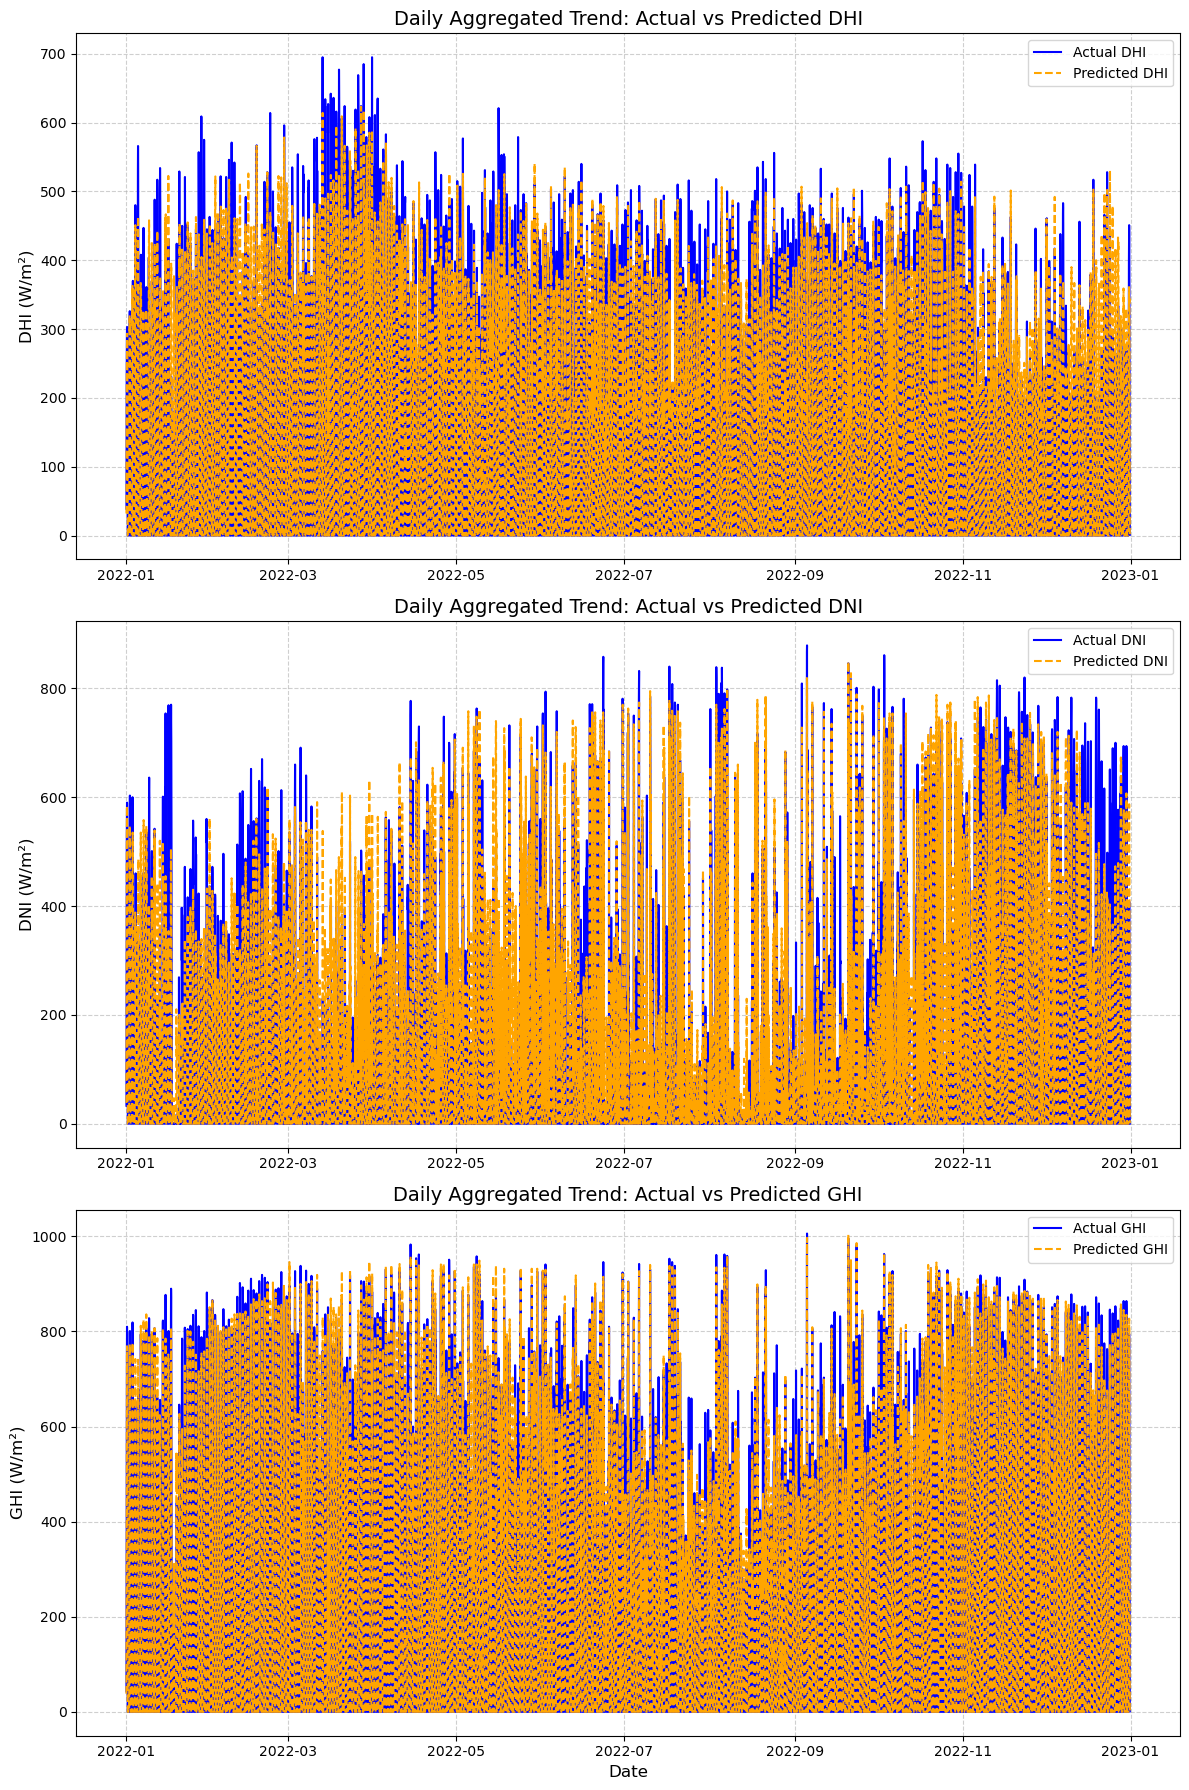

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine 'Year', 'Month', 'Day', 'Hour', 'Minute' into a single Timestamp for each DataFrame
def prepare_dataframe(df):
    df['Timestamp'] = pd.to_datetime(
        df[['Year', 'Month', 'Day', 'Hour', 'Minute']]
    )
    df.set_index('Timestamp', inplace=True)
    # Aggregate to daily means
    daily_data = df.resample('H').sum()
    return daily_data

# Prepare the data
actual_daily = prepare_dataframe(actual_irradiance)
predicted_daily = prepare_dataframe(new_data)

# Define the components to plot
components = ['DHI', 'DNI', 'GHI']

# Create a figure and subplots
fig, axes = plt.subplots(len(components), 1, figsize=(12, 18))

# Iterate over each component to plot
for i, component in enumerate(components):
    ax = axes[i]
    
    # Plot actual irradiance (observed)
    ax.plot(
        actual_daily.index, 
        actual_daily[component], 
        label=f'Actual {component}', 
        color='blue', 
        linestyle='-', 
        linewidth=1.5
    )
    
    # Plot predicted irradiance (new_data)
    ax.plot(
        predicted_daily.index, 
        predicted_daily[component], 
        label=f'Predicted {component}', 
        color='orange', 
        linestyle='--', 
        linewidth=1.5
    )
    
    # Customize subplot
    ax.set_title(f'Daily Aggregated Trend: Actual vs Predicted {component}', fontsize=14)
    ax.set_ylabel(f'{component} (W/m²)', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)

# Set the x-axis label for the last subplot
axes[-1].set_xlabel('Date', fontsize=12)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


# PVLIB

## Dissertation

In [10]:
import pvlib
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [11]:
# Define Location
location = Location(latitude=7.451541139578495, longitude=3.889850809097754,
                    tz='Africa/Lagos', altitude=277 + 3.6576, name='CPEEL')

In [12]:
mod_path = "../datasets/CEC_Modules.csv"
inv_path = '../datasets/CEC_Inverters.csv'

modules = pvlib.pvsystem.retrieve_sam(path=mod_path)
inverters = pvlib.pvsystem.retrieve_sam(path=inv_path)

temp_params = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

/home/peter/anaconda3/lib/python3.11/site-packages/pvlib/pvsystem.py:2095: UserWarning: Original names contain 29 duplicate(s).
  warnings.warn('Original names contain %d duplicate(s).' % n_duplicates)
/home/peter/anaconda3/lib/python3.11/site-packages/pvlib/pvsystem.py:2099: UserWarning: Normalized names contain 29 duplicate(s).
  warnings.warn(


In [14]:
# Function to return a DataFrame with columns that contain a specific substring
pd.set_option('display.max_columns', None)
def find_cols(df, substring):
    columns = [col for col in df.columns if substring in col]
    return df[columns]
    
find_cols(modules, 'Trina_Solar_TSM_500DE18M_II_')
# find_cols(inverters, 'Fronius')


Trina_Solar_TSM_500DE18M_II_
Manufacturer                  Trina Solar
Technology                      Mono-c-Si
Bifacial                                0
STC                               500.332
PTC                                 468.3
A_c                                  2.34
Length                                NaN
Width                                 NaN
N_s                                    75
I_sc_ref                            12.28
V_oc_ref                             51.7
I_mp_ref                            11.69
V_mp_ref                             42.8
alpha_sc                         0.006754
beta_oc                         -0.136488
T_NOCT                               45.0
a_ref                              1.9071
I_L_ref                           12.2823
I_o_ref                               0.0
R_s                              0.257757
R_sh_ref                          1373.48
Adjust                            7.10179
gamma_r                            -0.337
BIPV                                    N
Version                        2023.10.31
Date                           11/16/2022

In [15]:
find_cols(inverters, 'Fronius')

Fronius_International_GmbH__Fronius_Primo_10_0_1_208_240__208V_  \
Vac                                                       208                
Pso                                                   36.2304                
Paco                                                   9995.0                
Pdco                                                  10292.2                
Vdco                                                    660.0                
C0                                                       -0.0                
C1                                                  -0.000029                
C2                                                  -0.000758                
C3                                                  -0.002785                
Pnt                                                      0.24                
Vdcmax                                                  800.0                
Idcmax                                                15.5942                
Mppt_low                                                100.0                
Mppt_high                                               800.0                
CEC_Date                                             3/1/2019                
CEC_hybrid                                                  N                

           Fronius_International_GmbH__Fronius_Primo_10_0_1_208_240__240V_  \
Vac                                                       240                
Pso                                                   44.2769                
Paco                                                   9995.0                
Pdco                                                  10296.0                
Vdco                                                    655.0                
C0                                                  -0.000001                
C1                                                  -0.000028                
C2                                                   -0.00062                
C3                                                   0.000286                
Pnt                                                      0.32                
Vdcmax                                                  800.0                
Idcmax                                                15.7191                
Mppt_low                                                100.0                
Mppt_high                                               800.0                
CEC_Date                                             3/1/2019                
CEC_hybrid                                                  N                

           Fronius_International_GmbH__Fronius_Primo_11_4_1_208_240__208V_  \
Vac                                                       208                
Pso                                                   36.8573                
Paco                                                  11400.0                
Pdco                                                  11743.9                
Vdco                                                    660.0                
C0                                                       -0.0                
C1                                                  -0.000032                
C2                                                  -0.000729                
C3                                                  -0.001775                
Pnt                                                      0.24                
Vdcmax                                                  800.0                
Idcmax                                                17.7938                
Mppt_low                                                240.0                
Mppt_high                                               800.0                
CEC_Date                                             3/1/2019                
CEC_hybrid                                                  N                

           Fronius_Internation

### Trina_Solar_TSM_500DE18M_II Energy Modelling

In [16]:
module = modules['Trina_Solar_TSM_500DE18M_II_']
inverter = inverters['Fronius_International_GmbH__Primo_GEN24_3_8_208_240_Plus__240V_']

In [17]:
module

Manufacturer    Trina Solar
Technology        Mono-c-Si
Bifacial                  0
STC                 500.332
PTC                   468.3
A_c                    2.34
Length                  NaN
Width                   NaN
N_s                      75
I_sc_ref              12.28
V_oc_ref               51.7
I_mp_ref              11.69
V_mp_ref               42.8
alpha_sc           0.006754
beta_oc           -0.136488
T_NOCT                 45.0
a_ref                1.9071
I_L_ref             12.2823
I_o_ref                 0.0
R_s                0.257757
R_sh_ref            1373.48
Adjust              7.10179
gamma_r              -0.337
BIPV                      N
Version          2023.10.31
Date             11/16/2022
Name: Trina_Solar_TSM_500DE18M_II_, dtype: object

In [18]:
inverter

Vac                240
Pso            27.8054
Paco            3802.0
Pdco           3904.29
Vdco             400.0
C0           -0.000002
C1           -0.000033
C2           -0.001674
C3           -0.000169
Pnt                8.3
Vdcmax           480.0
Idcmax         9.76072
Mppt_low         200.0
Mppt_high        480.0
CEC_Date           NaN
CEC_hybrid           Y
Name: Fronius_International_GmbH__Primo_GEN24_3_8_208_240_Plus__240V_, dtype: object

Generate PV Electrical characteristics under certain condions


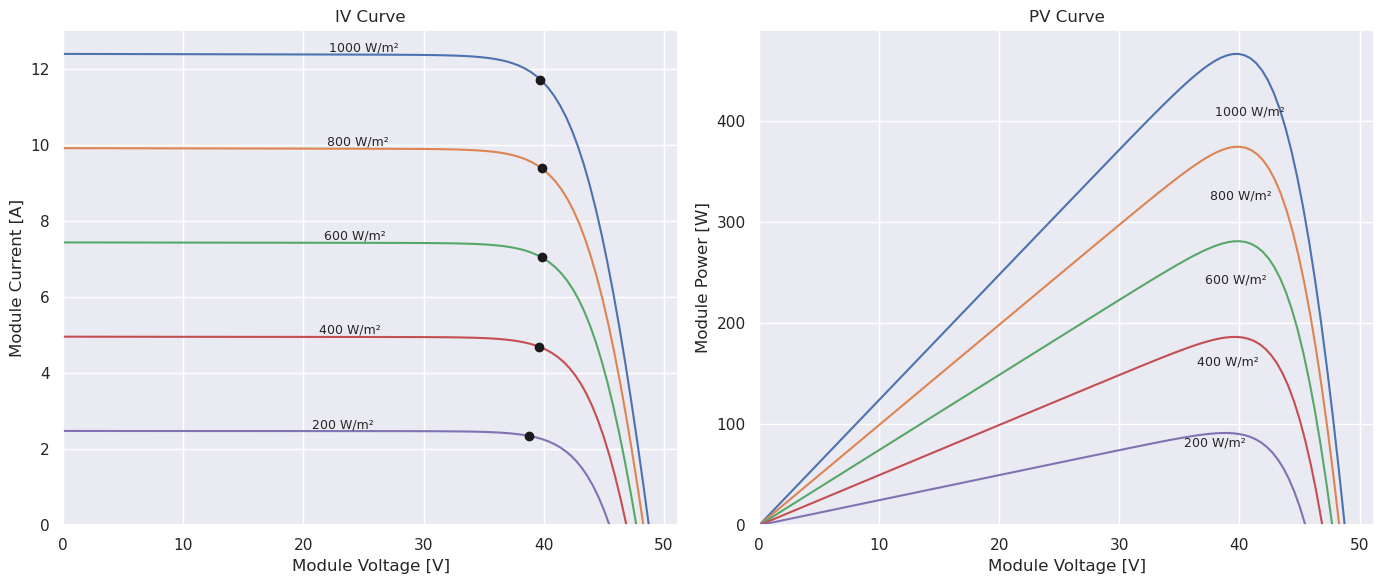

In [19]:
# IV and PV curve under contant temperature (45 degree celcius) and varying irradiance

temp = 45
# Define cases and conditions
cases = [
    (1000, temp),
    (800, temp),
    (600, temp),
    (400, temp),
    (200, temp),
]

conditions = pd.DataFrame(cases, columns=['Geff', 'Tcell'])

# Adjust the reference parameters using the De Soto model
IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_cec(
    conditions['Geff'],
    conditions['Tcell'],
    alpha_sc=module['alpha_sc'],
    a_ref=module['a_ref'],
    I_L_ref=module['I_L_ref'],
    I_o_ref=module['I_o_ref'],
    R_sh_ref=module['R_sh_ref'],
    R_s=module['R_s'],
    Adjust=module['Adjust'],
    EgRef=1.121,
    dEgdT=-0.0002677
)

# Solve for IV and PV curves using the single diode model
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}
curve_info = pvlib.pvsystem.singlediode(method='lambertw', **SDE_params)
v = pd.DataFrame(np.linspace(0., curve_info['v_oc'], 100))
i = pd.DataFrame(pvlib.pvsystem.i_from_v(voltage=v, method='lambertw', **SDE_params))
p = v * i  # Power curve

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot IV curves
for idx, case in conditions.iterrows():
    label = f"{case['Geff']} W/m²"
    axes[0].plot(v[idx], i[idx], label=label)
    v_mp = curve_info['v_mp'][idx]
    i_mp = curve_info['i_mp'][idx]

    # mark the MPP
    axes[0].plot([v_mp], [i_mp], ls='', marker='o', c='k')

    # Place labels on top of curves
    axes[0].text(v[idx].iloc[45], i[idx].iloc[45], label, fontsize=9, va='bottom')

axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)
axes[0].set_xlabel('Module Voltage [V]')
axes[0].set_ylabel('Module Current [A]')
axes[0].set_title('IV Curve')
axes[0].grid(True)

# Plot PV curves
for idx, case in conditions.iterrows():
    label = f"{case['Geff']} W/m²"
    axes[1].plot(v[idx], p[idx], label=label)
    # Place labels on top of curves
    axes[1].text(v[idx].iloc[77], p[idx].iloc[66], label, fontsize=9, va='bottom')

axes[1].set_xlim(left=0)
axes[1].set_ylim(bottom=0)
axes[1].set_xlabel('Module Voltage [V]')
axes[1].set_ylabel('Module Power [W]')
axes[1].set_title('PV Curve')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


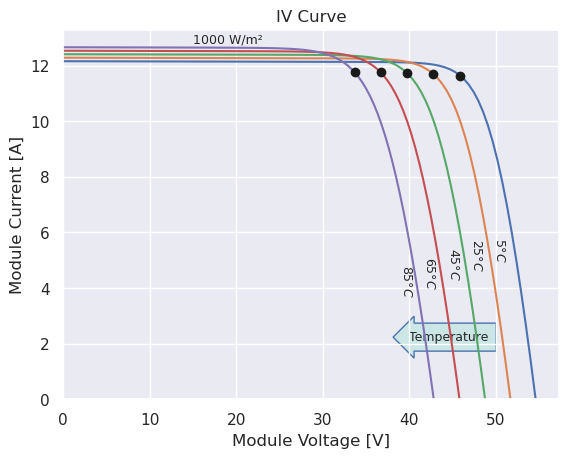

In [20]:
# IV a under varying temperature and constant irradiance of 1000 W/m2

irradiance = 1000
# Define cases and conditions
cases = [
    (irradiance, 5),
    (irradiance, 25),
    (irradiance, 45),
    (irradiance, 65),
    (irradiance, 85),
]

conditions = pd.DataFrame(cases, columns=['Geff', 'Tcell'])

# Adjust the reference parameters using the De Soto model
IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_cec(
    conditions['Geff'],
    conditions['Tcell'],
    alpha_sc=module['alpha_sc'],
    a_ref=module['a_ref'],
    I_L_ref=module['I_L_ref'],
    I_o_ref=module['I_o_ref'],
    R_sh_ref=module['R_sh_ref'],
    R_s=module['R_s'],
    Adjust=module['Adjust'],
    EgRef=1.121,
    dEgdT=-0.0002677
)

# Solve for IV and PV curves using the single diode model
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}
curve_info = pvlib.pvsystem.singlediode(method='lambertw', **SDE_params)
v = pd.DataFrame(np.linspace(0., curve_info['v_oc'], 100))
i = pd.DataFrame(pvlib.pvsystem.i_from_v(voltage=v, method='lambertw', **SDE_params))
p = v * i  # Power curve

# Create subplots

# Plot IV curves
for idx, case in conditions.iterrows():
    label = f"{case['Tcell']}$\\degree C$"
    plt.plot(v[idx], i[idx], label=label)
    v_mp = curve_info['v_mp'][idx]
    i_mp = curve_info['i_mp'][idx]

    # mark the MPP
    plt.plot([v_mp], [i_mp], ls='', marker='o', c='k')

    # Place labels on top of curves
    plt.text(v[idx].iloc[90], i[idx].iloc[95], label, fontsize=9, va='bottom', rotation=-90)

plt.text(15, 12.8, f'1000 W/m²', fontsize=9, )
# draw trend arrows
def draw_arrow(ax, label, x0, y0, rotation, size, direction):
    style = direction + 'arrow'
    bbox_props = dict(boxstyle=style, fc=(0.8, 0.9, 0.9), ec="b", lw=1)
    t = ax.text(x0, y0, label, ha="left", va="bottom", rotation=rotation,
                size=size, bbox=bbox_props, zorder=-1)

    bb = t.get_bbox_patch()
    bb.set_boxstyle(style, pad=0.6)


# ax = plt.gca()
draw_arrow(plt, 'Temperature', 40, 2, 0, 9, 'l')

plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Module Voltage [V]')
plt.ylabel('Module Current [A]')
plt.title('IV Curve')
plt.grid(True)



In [21]:
system = PVSystem(surface_tilt=location.latitude, surface_azimuth=180,
                  module_parameters=module, inverter_parameters=inverter,
                  temperature_model_parameters=temp_params, 
                  modules_per_string=1, strings_per_inverter=1, 
                  
                 )

In [22]:
modelchain = ModelChain(system, location, aoi_model='no_loss')

In [23]:
solpos = location.get_solarposition(new_data.index)

dni_extra = pvlib.irradiance.get_extra_radiation(new_data.index)

total_irradiance = pvlib.irradiance.get_total_irradiance(surface_tilt=location.latitude,
                                                         surface_azimuth=180,
                                                         solar_zenith=solpos['apparent_zenith'],
                                                         solar_azimuth=solpos['azimuth'],
                                                         dni=new_data['DNI'],
                                                         ghi=new_data['GHI'],
                                                         dhi=new_data['DHI'],
                                                         dni_extra=dni_extra,
                                                         albedo=0.155,
                                                         model='haydavies'
                                                         )

temp_cell = pvlib.temperature.faiman(poa_global=total_irradiance['poa_global'],
                                     temp_air=new_data['Temperature'],
                                     wind_speed=new_data['Wind Speed'],
                                     )
temp_cell.name='cell_temperature'
temp_cell = pd.DataFrame(temp_cell)


data = pd.concat(
    [
        total_irradiance[['poa_global', 'poa_direct', 'poa_diffuse']],
        new_data[['Temperature', 'Wind Speed', 'Precipitable Water']],
        temp_cell
    ],  axis=1
)

data.rename(columns={'Temperature':'temp_air', 
                     'Wind Speed':'wind_speed',
                     'Precipitable Water':'precipitable_water'
                    },
            inplace=True
           )

modelchain.run_model_from_poa(data)

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: sandia_inverter
  aoi_model: no_aoi_loss
  spectral_model: first_solar_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

<Axes: xlabel='Timestamp'>

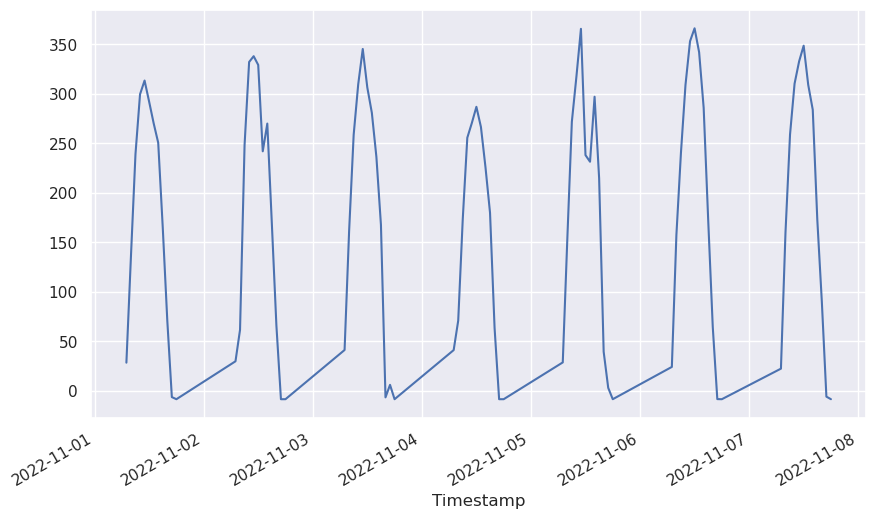

In [24]:
modelchain.results.ac['2022-11-01 00:00':'2022-11-07 23:00'].plot(figsize=(10, 6))

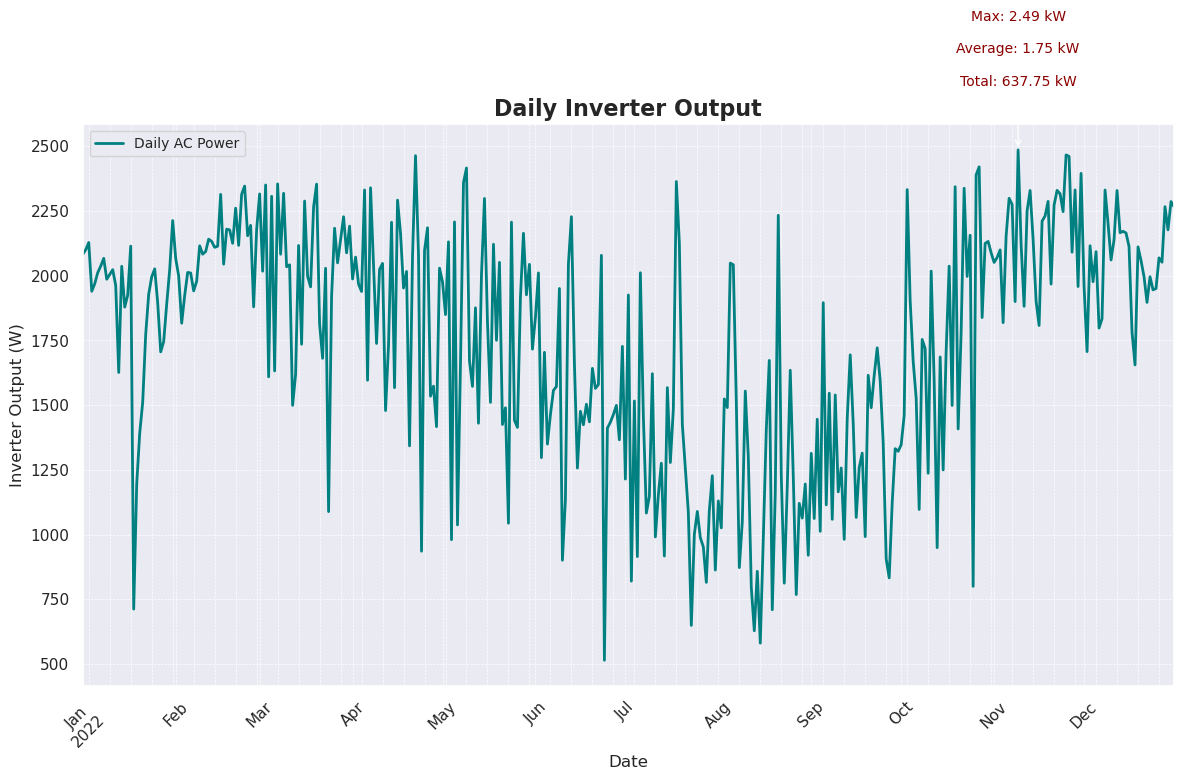

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Resample data to daily sums
daily_ac_power = modelchain.results.ac.resample('D').sum()

# Calculate maximum power and total power
max_date = daily_ac_power.idxmax()
max_value = daily_ac_power.max()
avg_value = daily_ac_power.mean()
total_power = daily_ac_power.sum()

# Plot the inverter output with improved aesthetics
fig, ax = plt.subplots(figsize=(12, 8))

# Plot daily sum of AC power output
daily_ac_power.plot(
    ax=ax, 
    color='teal', 
    linewidth=2, 
    linestyle='-'
)

# Add a title and axis labels
ax.set_title('Daily Inverter Output', fontsize=16, weight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Inverter Output (W)', fontsize=12)

# Annotate maximum output point
ax.annotate(
    f'Max: {max_value/1000:.2f} kW\n\nAverage: {avg_value/1000:.2f} kW\n\nTotal: {total_power/1000:.2f} kW',
    xy=(max_date, max_value),
    xytext=(max_date, max_value * 1.1),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=10,
    color='darkred',
    ha='center'
)

# Customize ticks for better readability
ax.tick_params(axis='x', labelrotation=45)
ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5)

# Add a legend
ax.legend(['Daily AC Power'], loc='upper left', fontsize=10)

# Add a tight layout
plt.tight_layout()

# Show the plot
plt.show()


### Canadian CS3Y-500MS Energy Modelling
As at the time of writing, this module is not included in CEC database. Therefore the parameters had to be extracted from the manufacturer datasheets. Other extra parameters needed that were not in the datasheet was generated using `sdm.fit_cec_sam`

In [27]:
ca_mod = {
    'Manufacturer':'Candian Solar', 
    'Technology':'Mono-c-Si', 
    'Bifacial':0, 
    'STC':500.40, 
    'PTC':np.nan,
    'A_c':np.nan, 
    'Length':np.nan,
    'Width':np.nan, 
    'N_s':78, 
    'I_sc_ref':11.77,
    'V_oc_ref':53.7, 
    'I_mp_ref':11.12, 
    'V_mp_ref':45,
    'alpha_sc':0.005885, 
    'beta_oc':-0.13962, 
    'T_NOCT':45, 
    'gamma_r':-0.34,
    'BIPV':'N'       
}

extra_params = pvlib.ivtools.sdm.fit_cec_sam(celltype='monoSi', 
                                             v_mp=ca_mod['V_mp_ref'], 
                                             i_mp=ca_mod['I_mp_ref'], 
                                             v_oc=ca_mod['V_oc_ref'], 
                                             i_sc=ca_mod['I_sc_ref'], 
                                             alpha_sc=ca_mod['alpha_sc'], 
                                             beta_voc=ca_mod['beta_oc'], 
                                             gamma_pmp=ca_mod['gamma_r'], 
                                             cells_in_series=ca_mod['N_s'], 
                                             temp_ref=25
                                            )

I_L_ref, I_o_ref, R_s, R_sh_ref, a_ref, Adjust = extra_params

ca_mod['I_L_ref'] = I_L_ref
ca_mod['I_o_ref'] = I_o_ref
ca_mod['R_s'] = R_s
ca_mod['R_sh_ref'] = R_sh_ref
ca_mod['a_ref'] = a_ref
ca_mod['Adjust'] = Adjust

inverter = inverters['Fronius_International_GmbH__Primo_GEN24_3_8_208_240_Plus__240V_']

In [28]:
ca_mod

{'Manufacturer': 'Candian Solar',
 'Technology': 'Mono-c-Si',
 'Bifacial': 0,
 'STC': 500.4,
 'PTC': nan,
 'A_c': nan,
 'Length': nan,
 'Width': nan,
 'N_s': 78,
 'I_sc_ref': 11.77,
 'V_oc_ref': 53.7,
 'I_mp_ref': 11.12,
 'V_mp_ref': 45,
 'alpha_sc': 0.005885,
 'beta_oc': -0.13962,
 'T_NOCT': 45,
 'gamma_r': -0.34,
 'BIPV': 'N',
 'I_L_ref': 11.77787226112155,
 'I_o_ref': 2.3707571494843015e-11,
 'R_s': 0.22363339190852521,
 'R_sh_ref': 334.35946849747984,
 'a_ref': 1.9949684337270626,
 'Adjust': 10.480869653415862}

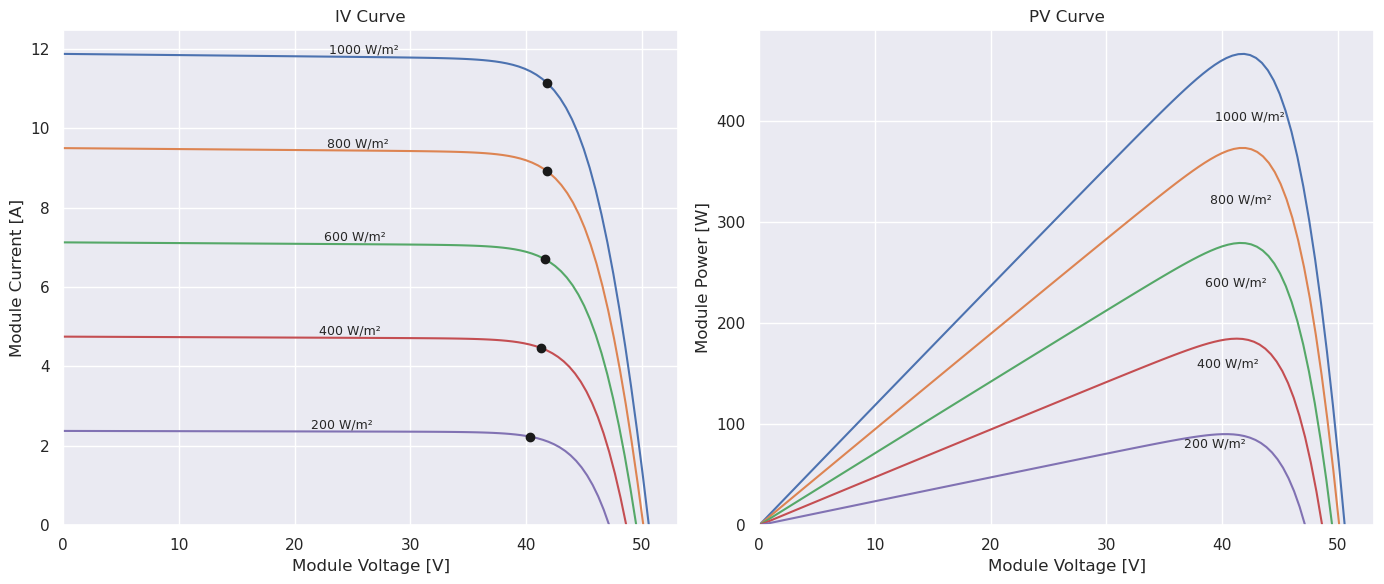

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pvlib

temp = 45
# Define cases and conditions
cases = [
    (1000, temp),
    (800, temp),
    (600, temp),
    (400, temp),
    (200, temp),
]

conditions = pd.DataFrame(cases, columns=['Geff', 'Tcell'])

# Adjust the reference parameters using the De Soto model
IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_cec(
    conditions['Geff'],
    conditions['Tcell'],
    alpha_sc=ca_mod['alpha_sc'],
    a_ref=ca_mod['a_ref'],
    I_L_ref=ca_mod['I_L_ref'],
    I_o_ref=ca_mod['I_o_ref'],
    R_sh_ref=ca_mod['R_sh_ref'],
    R_s=ca_mod['R_s'],
    Adjust=ca_mod['Adjust'],
    EgRef=1.121,
    dEgdT=-0.0002677
)

# Solve for IV and PV curves using the single diode model
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}
curve_info = pvlib.pvsystem.singlediode(method='lambertw', **SDE_params)
v = pd.DataFrame(np.linspace(0., curve_info['v_oc'], 100))
i = pd.DataFrame(pvlib.pvsystem.i_from_v(voltage=v, method='lambertw', **SDE_params))
p = v * i  # Power curve

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot IV curves
for idx, case in conditions.iterrows():
    label = f"{case['Geff']} W/m²"
    axes[0].plot(v[idx], i[idx], label=label)
    v_mp = curve_info['v_mp'][idx]
    i_mp = curve_info['i_mp'][idx]

    # mark the MPP
    axes[0].plot([v_mp], [i_mp], ls='', marker='o', c='k')

    # Place labels on top of curves
    axes[0].text(v[idx].iloc[45], i[idx].iloc[45], label, fontsize=9, va='bottom')

axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)
axes[0].set_xlabel('Module Voltage [V]')
axes[0].set_ylabel('Module Current [A]')
axes[0].set_title('IV Curve')
axes[0].grid(True)

# Plot PV curves
for idx, case in conditions.iterrows():
    label = f"{case['Geff']} W/m²"
    axes[1].plot(v[idx], p[idx], label=label)
    # Place labels on top of curves
    axes[1].text(v[idx].iloc[77], p[idx].iloc[66], label, fontsize=9, va='bottom')

axes[1].set_xlim(left=0)
axes[1].set_ylim(bottom=0)
axes[1].set_xlabel('Module Voltage [V]')
axes[1].set_ylabel('Module Power [W]')
axes[1].set_title('PV Curve')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


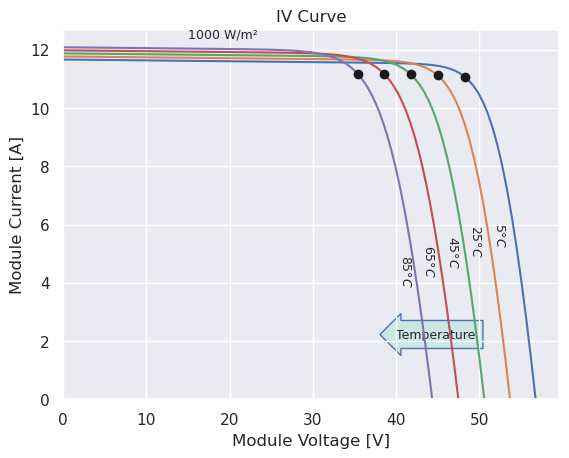

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pvlib

irradiance = 1000
# Define cases and conditions
cases = [
    (irradiance, 5),
    (irradiance, 25),
    (irradiance, 45),
    (irradiance, 65),
    (irradiance, 85),
]

conditions = pd.DataFrame(cases, columns=['Geff', 'Tcell'])

# Adjust the reference parameters using the De Soto model
IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_cec(
    conditions['Geff'],
    conditions['Tcell'],
    alpha_sc=ca_mod['alpha_sc'],
    a_ref=ca_mod['a_ref'],
    I_L_ref=ca_mod['I_L_ref'],
    I_o_ref=ca_mod['I_o_ref'],
    R_sh_ref=ca_mod['R_sh_ref'],
    R_s=ca_mod['R_s'],
    Adjust=ca_mod['Adjust'],
    EgRef=1.121,
    dEgdT=-0.0002677
)

# Solve for IV and PV curves using the single diode model
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}
curve_info = pvlib.pvsystem.singlediode(method='lambertw', **SDE_params)
v = pd.DataFrame(np.linspace(0., curve_info['v_oc'], 100))
i = pd.DataFrame(pvlib.pvsystem.i_from_v(voltage=v, method='lambertw', **SDE_params))
p = v * i  # Power curve

# Create subplots

# Plot IV curves
for idx, case in conditions.iterrows():
    label = f"{case['Tcell']}$\\degree C$"
    plt.plot(v[idx], i[idx], label=label)
    v_mp = curve_info['v_mp'][idx]
    i_mp = curve_info['i_mp'][idx]

    # mark the MPP
    plt.plot([v_mp], [i_mp], ls='', marker='o', c='k')

    # Place labels on top of curves
    plt.text(v[idx].iloc[90], i[idx].iloc[95], label, fontsize=9, va='bottom', rotation=-90)

plt.text(15, 12.4, f'1000 W/m²', fontsize=9, )
# draw trend arrows
def draw_arrow(ax, label, x0, y0, rotation, size, direction):
    style = direction + 'arrow'
    bbox_props = dict(boxstyle=style, fc=(0.8, 0.9, 0.9), ec="b", lw=1)
    t = ax.text(x0, y0, label, ha="left", va="bottom", rotation=rotation,
                size=size, bbox=bbox_props, zorder=-1)

    bb = t.get_bbox_patch()
    bb.set_boxstyle(style, pad=0.6)


# ax = plt.gca()
draw_arrow(plt, 'Temperature', 40, 2, 0, 9, 'l')

plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Module Voltage [V]')
plt.ylabel('Module Current [A]')
plt.title('IV Curve')
plt.grid(True)



In [31]:
system = PVSystem(surface_tilt=location.latitude, surface_azimuth=180,
                  module_parameters=ca_mod, inverter_parameters=inverter,
                  temperature_model_parameters=temp_params, 
                  modules_per_string=1, strings_per_inverter=1, 
                 )

In [32]:
modelchain = ModelChain(system, location, aoi_model='no_loss')

In [33]:
solpos = location.get_solarposition(new_data.index)

dni_extra = pvlib.irradiance.get_extra_radiation(new_data.index)

total_irradiance = pvlib.irradiance.get_total_irradiance(surface_tilt=location.latitude,
                                                         surface_azimuth=180,
                                                         solar_zenith=solpos['apparent_zenith'],
                                                         solar_azimuth=solpos['azimuth'],
                                                         dni=new_data['DNI'],
                                                         ghi=new_data['GHI'],
                                                         dhi=new_data['DHI'],
                                                         dni_extra=dni_extra,
                                                         albedo=0.155,
                                                         model='haydavies'
                                                         )

temp_cell = pvlib.temperature.faiman(poa_global=total_irradiance['poa_global'],
                                     temp_air=new_data['Temperature'],
                                     wind_speed=new_data['Wind Speed'],
                                     )
temp_cell.name='cell_temperature'
temp_cell = pd.DataFrame(temp_cell)


data = pd.concat(
    [
        total_irradiance[['poa_global', 'poa_direct', 'poa_diffuse']],
        new_data[['Temperature', 'Wind Speed', 'Precipitable Water']],
        temp_cell
    ],  axis=1
)

data.rename(columns={'Temperature':'temp_air', 
                     'Wind Speed':'wind_speed',
                     'Precipitable Water':'precipitable_water'
                    },
            inplace=True
           )

modelchain.run_model_from_poa(data)

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: sandia_inverter
  aoi_model: no_aoi_loss
  spectral_model: first_solar_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

<Axes: xlabel='Timestamp'>

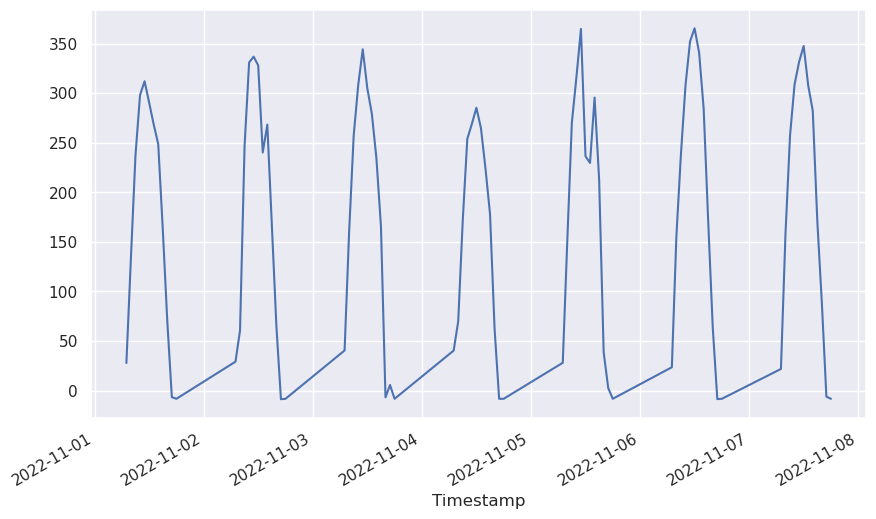

In [34]:
modelchain.results.ac['2022-11-01 00:00':'2022-11-07 23:00'].plot(figsize=(10, 6))

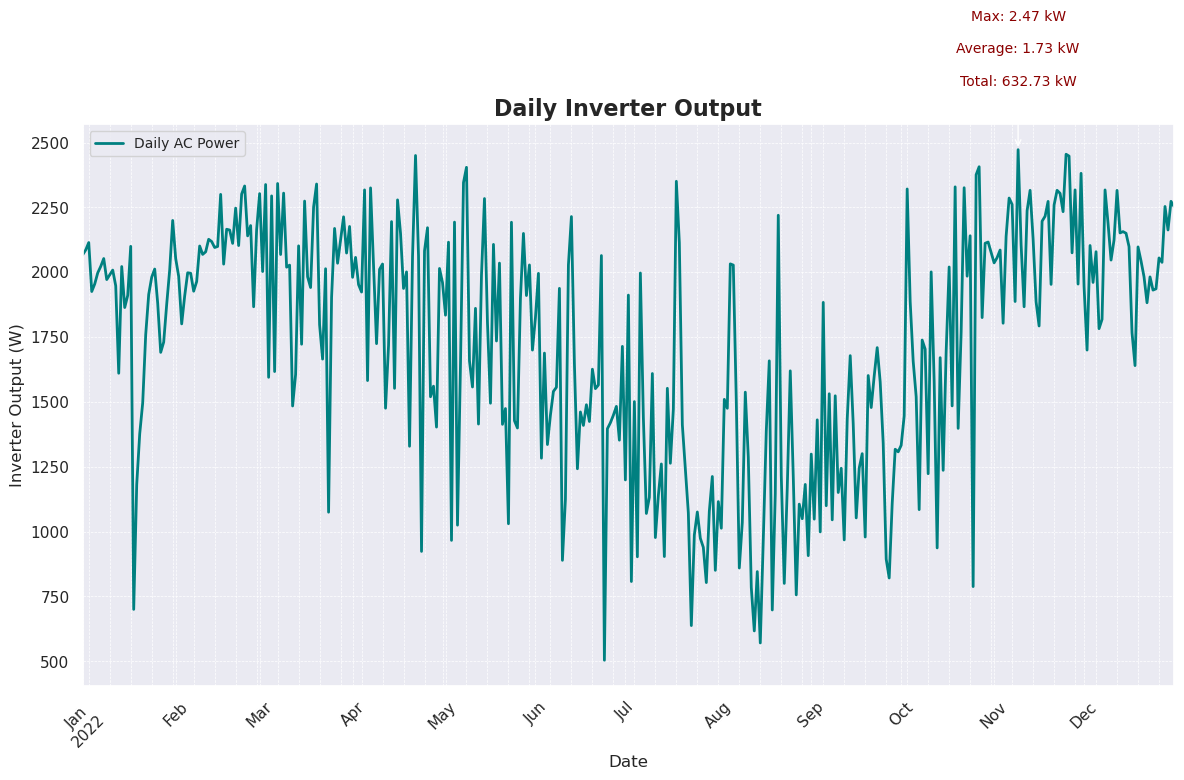

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Resample data to daily sums
daily_ac_power = modelchain.results.ac.resample('D').sum()

# Calculate maximum power and total power
max_date = daily_ac_power.idxmax()
max_value = daily_ac_power.max()
avg_value = daily_ac_power.mean()
total_power = daily_ac_power.sum()

# Plot the inverter output with improved aesthetics
fig, ax = plt.subplots(figsize=(12, 8))

# Plot daily sum of AC power output
daily_ac_power.plot(
    ax=ax, 
    color='teal', 
    linewidth=2, 
    linestyle='-'
)

# Add a title and axis labels
ax.set_title('Daily Inverter Output', fontsize=16, weight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Inverter Output (W)', fontsize=12)

# Annotate maximum output point
ax.annotate(
    f'Max: {max_value/1000:.2f} kW\n\nAverage: {avg_value/1000:.2f} kW\n\nTotal: {total_power/1000:.2f} kW',
    xy=(max_date, max_value),
    xytext=(max_date, max_value * 1.1),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=10,
    color='darkred',
    ha='center'
)

# Customize ticks for better readability
ax.tick_params(axis='x', labelrotation=45)
ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5)

# Add a legend
ax.legend(['Daily AC Power'], loc='upper left', fontsize=10)

# Add a tight layout
plt.tight_layout()

# Show the plot
plt.show()


I tried to fit an inverter not listed in the cec database(at the moment of writing) but I am not getting it right. Let me know how you did this if you eventually figure it out. 

In [36]:
import pandas as pd
import numpy as np

# Inverter specifications
paco = 3000  # Rated AC power [W]
pso = 0.01 * paco    # 1% of paco
pnt = 0.0022 * paco  # 0.22% of paco
efficiency = 0.95  # Efficiency at rated load
v_min = 120  # Min DC voltage [V]
v_max = 500  # Max DC voltage [V]
v_nom = v_min + 0.25 * (v_max-v_min), v_min + 0.75 * (v_max-v_min), # Nominal DC voltage [V] 

# Generate synthetic data points
n_points = 6  # Number of data points
dc_voltage = np.linspace(v_min, v_max, n_points)  # Random DC voltages [V]
dc_power = np.linspace(1000, 4000, n_points)  # DC input power range [W]
ac_power = efficiency * dc_power  # Calculate AC power based on efficiency

# Create a DataFrame
data = pd.DataFrame({
    'dc_power': dc_power,
    'dc_voltage': dc_voltage,
    'ac_power': ac_power,
    'dc_voltage_level': ['Vnom' if (v >= v_nom[0] and v <= v_nom[1]) else ('Vmin' if v < v_nom[0] else 'Vmax') for v in dc_voltage]
})

# Save to Excel or CSV for further use
data.to_csv('inverter_synthetic_data.csv', index=False)

# Display the first few rows
data.head()
data[data['dc_voltage_level'] == 'Vnom']

dc_power  dc_voltage  ac_power dc_voltage_level
2    2200.0       272.0    2090.0             Vnom
3    2800.0       348.0    2660.0             Vnom

In [37]:
ivem_3048 = pvlib.inverter.fit_sandia(ac_power=data['ac_power'],
                                      dc_power=data['dc_power'],
                                      dc_voltage=data['dc_voltage'],
                                      dc_voltage_level=data['dc_voltage_level'],
                                      p_ac_0=paco,
                                      p_nt=pnt,
                                     )

/home/peter/anaconda3/lib/python3.11/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
/home/peter/anaconda3/lib/python3.11/site-packages/pvlib/inverter.py:515: RuntimeWarning: invalid value encountered in scalar power
  return (-b + (b**2 - 4 * a * c)**.5) / (2 * a)


In [38]:
ivem_3048

{'Paco': 3000,
 'Pdco': 2982.9251097497977,
 'Vdco': 310.0,
 'Pso': nan,
 'C0': 0.00015026703382963524,
 'C1': 0.0004910770811203822,
 'C2': nan,
 'C3': -0.003369935845814399,
 'Pnt': 6.6000000000000005}

## PVLIB Tutorial

In [51]:
import pvlib
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [52]:
location = Location(latitude=7.451541139578495, longitude=3.889850809097754,
                    tz='Africa/Lagos', altitude=277 + 3.6576, name='CPEEL')

In [71]:
modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
inverters = pvlib.pvsystem.retrieve_sam('CECInverter')

temp_params = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [72]:
# Function to return a DataFrame with columns that contain a specific substring
pd.set_option('display.max_columns', None)
def find_cols(df, substring):
    columns = [col for col in df.columns if substring in col]
    return df[columns]
find_cols(modules, 'Canadan')   
find_cols(inverters, 'ABB')


ABB__MICRO_0_25_I_OUTD_US_208__208V_  \
Vac                                        208   
Pso                                   2.089607   
Paco                                     250.0   
Pdco                                259.588593   
Vdco                                      40.0   
C0                                   -0.000041   
C1                                   -0.000091   
C2                                    0.000494   
C3                                   -0.013171   
Pnt                                      0.075   
Vdcmax                                    50.0   
Idcmax                                6.489715   
Mppt_low                                  30.0   
Mppt_high                                 50.0   
CEC_Date                                   NaN   
CEC_Type                   Utility Interactive   

          ABB__MICRO_0_25_I_OUTD_US_240__240V_  \
Vac                                        240   
Pso                                   2.240412   
Paco                                     250.0   
Pdco                                259.492065   
Vdco                                      40.0   
C0                                   -0.000039   
C1                                   -0.000132   
C2                                    0.002418   
C3                                   -0.014926   
Pnt                                      0.075   
Vdcmax                                    50.0   
Idcmax                                6.487302   
Mppt_low                                  30.0   
Mppt_high                                 50.0   
CEC_Date                                   NaN   
CEC_Type                   Utility Interactive   

          ABB__MICRO_0_3_I_OUTD_US_208__208V_  \
Vac                                       208   
Pso                                  1.846506   
Paco                                    300.0   
Pdco                                311.66925   
Vdco                                     40.0   
C0                                  -0.000033   
C1                                  -0.000192   
C2                                   0.000907   
C3                                  -0.031742   
Pnt                                      0.09   
Vdcmax                                   50.0   
Idcmax                               7.791731   
Mppt_low                                 30.0   
Mppt_high                                50.0   
CEC_Date                                  NaN   
CEC_Type                  Utility Interactive   

          ABB__MICRO_0_3_I_OUTD_US_240__240V_  \
Vac                                       240   
Pso                                  1.950539   
Paco                                    300.0   
Pdco                               311.580872   
Vdco                                     40.0   
C0                                  -0.000034   
C1                                  -0.000256   
C2                                   0.002453   
C3                                  -0.028223   
Pnt                                      0.09   
Vdcmax                                   50.0   
Idcmax                               7.789522   
Mppt_low                                 30.0   
Mppt_high                                50.0   
CEC_Date                                  NaN   
CEC_Type                  Utility Interactive   

          ABB__MICRO_0_3HV_I_OUTD_US_208__208V_  \
Vac                                         208   
Pso                                    1.769444   
Paco                                      300.0   
Pdco                                 312.421082   
Vdco                                       45.0   
C0                                    -0.000045   
C1                                    -0.000196   
C2                                     0.001959   
C3                                    -0.023725   
Pnt                                        0.09   
Vdcmax                                     60.0   
Idcmax                      

<Axes: >

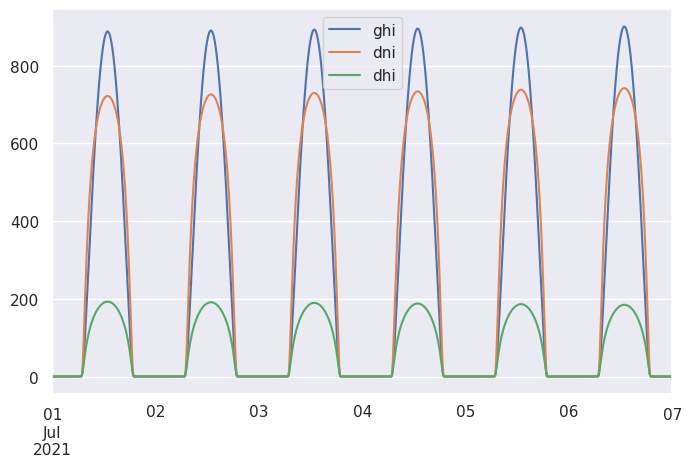

In [9]:
clear_sky = location.get_clearsky(times)
clear_sky.plot(figsize=(8, 5))

In [10]:
import pytz
from datetime import datetime

<Axes: >

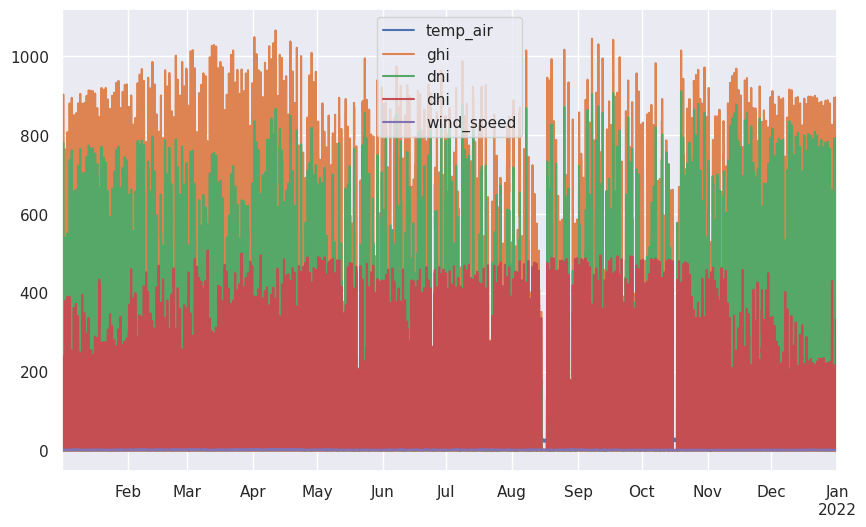

In [11]:
# Using TMY data downloaded from PVGIS
tmy = pd.read_csv("../datasets/solar_weather_data/CPEEL_tmy_2005_2023.csv", skiprows=16, nrows=365*24, 
                  usecols=['time(UTC)', 'T2m', 'G(h)', 'Gb(n)', 'Gd(h)', 'WS10m'], 
                  index_col=0
                 )
tmy.index = pd.date_range(start='2021-01-01 00:00', end='2021-12-31 23:00', freq='h', tz='UTC')
tmy.index = tmy.index.tz_convert('Africa/Lagos')
tmy.columns = ['temp_air', 'ghi', 'dni', 'dhi', 'wind_speed']
tmy.plot(figsize=(10, 6))

<Axes: xlabel='time'>

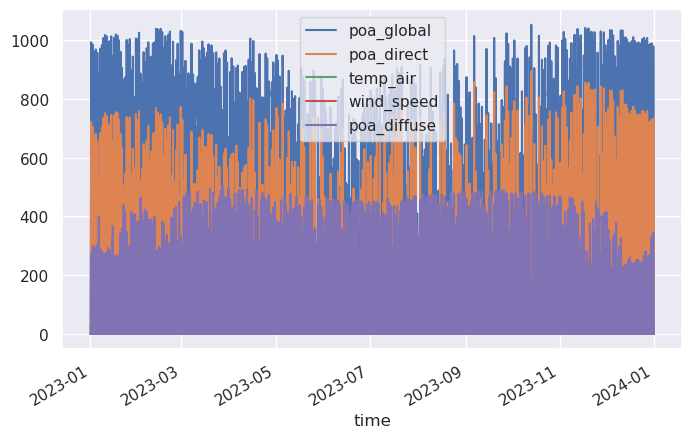

In [39]:
# Using Hourly data from a single year downloaded from PVGIS

poa_global = pd.read_csv('../datasets/solar_weather_data/CPEEL_global_2023.csv', skiprows=8, nrows=365*24,
                        index_col=0
                        )

poa_components = pd.read_csv('../datasets/solar_weather_data/CPEEL_components_2023.csv', skiprows=8, nrows=365*24,
                             index_col=0
                            ).drop(['T2m', 'WS10m'], axis=1)

poa_data = pd.concat([poa_global, poa_components], axis=1)
poa_data = poa_data[['G(i)', 'Gb(i)', 'Gd(i)', 'Gr(i)', 'T2m', 'WS10m']]
poa_data['poa_diffuse'] = poa_data['Gd(i)'] + poa_data['Gr(i)']
poa_data.drop(['Gd(i)', 'Gr(i)'], axis=1, inplace=True)
poa_data.columns = ['poa_global', 'poa_direct', 'temp_air', 'wind_speed', 'poa_diffuse']
poa_data.index = pd.to_datetime(poa_data.index, format='%Y%m%d:%H%M')
poa_data.plot(figsize=(8, 5))

In [14]:
poa_io, metadata, inputs = pvlib.iotools.get_pvgis_hourly(latitude=7.451541139578495, longitude=3.889850809097754,
                                                          start='2023', end='2023',raddatabase='PVGIS-SARAH3',
                                                          surface_tilt=location.latitude, surface_azimuth=0,
                                                          url='https://re.jrc.ec.europa.eu/api/v5_3/')

<Axes: xlabel='time'>

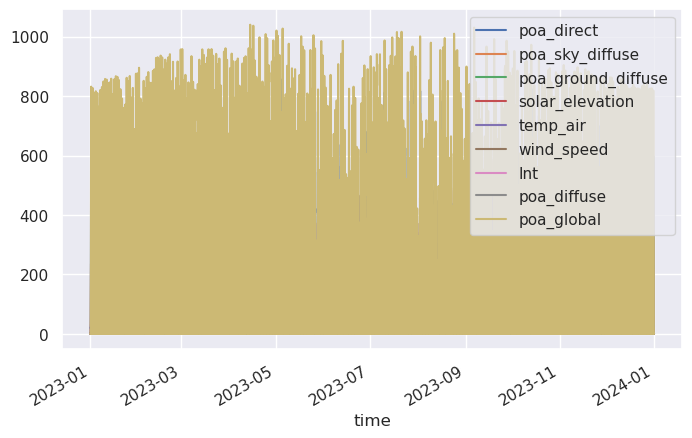

In [15]:
poa_io['poa_diffuse'] = poa_io['poa_sky_diffuse'] + poa_io['poa_ground_diffuse']
poa_io['poa_global'] = poa_io['poa_diffuse'] + poa_io['poa_direct']
poa_io.plot(figsize=(8, 5))

In [ ]:
# modelchain.run_model_from_effective_irradiance()

In [16]:
modelchain.run_model_from_poa(poa_io)

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: sandia_inverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

<Axes: xlabel='time'>

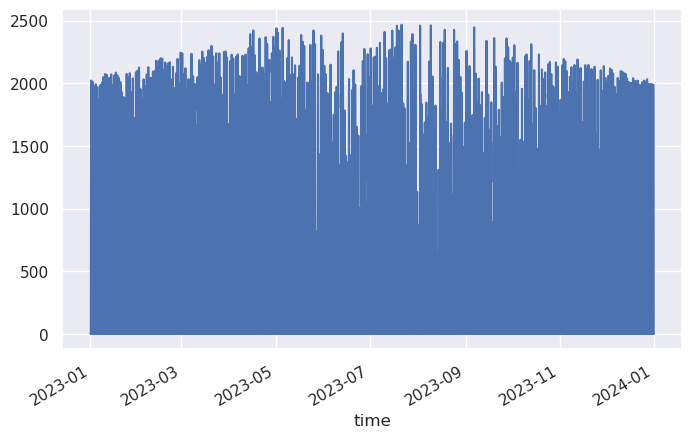

In [17]:
modelchain.results.ac.plot(figsize=(8, 5))

In [18]:
# Jinko 54HL4R-BDB 440 Watt

my_module = {'STC':440,
             'N_s':54 * 2,
             'V_mp_ref':33.44,
             'I_mp_ref':13.16,
             'V_oc_ref':39.83,
             'I_sc_ref':13.98,
             'alpha_sc':0.045/100 * 13.98,
             'beta_oc':-0.25/100 * 39.83,
             'gamma_r':-0.29/100,
            }
             

In [19]:
poa_data.index = pd.date_range('2023-01-01 00:00', periods=len(poa_data.index), freq='h')
start = pd.to_datetime('2023-07-01 00:00')
end = pd.to_datetime('2023-07-07 23:00')
poa_data = poa_data[start:end]
poa_data

poa_global  poa_direct  temp_air  wind_speed  poa_diffuse
2023-07-01 00:00:00         0.0         0.0     23.24        1.10          0.0
2023-07-01 01:00:00         0.0         0.0     22.95        1.03          0.0
2023-07-01 02:00:00         0.0         0.0     22.77        0.97          0.0
2023-07-01 03:00:00         0.0         0.0     22.77        0.55          0.0
2023-07-01 04:00:00         0.0         0.0     22.84        0.48          0.0
...                         ...         ...       ...         ...          ...
2023-07-07 19:00:00         0.0         0.0     24.43        1.72          0.0
2023-07-07 20:00:00         0.0         0.0     23.92        1.52          0.0
2023-07-07 21:00:00         0.0         0.0     23.68        1.31          0.0
2023-07-07 22:00:00         0.0         0.0     23.62        1.10          0.0
2023-07-07 23:00:00         0.0         0.0     23.53        0.97          0.0

[168 rows x 5 columns]

<Axes: title={'center': 'DC Power'}>

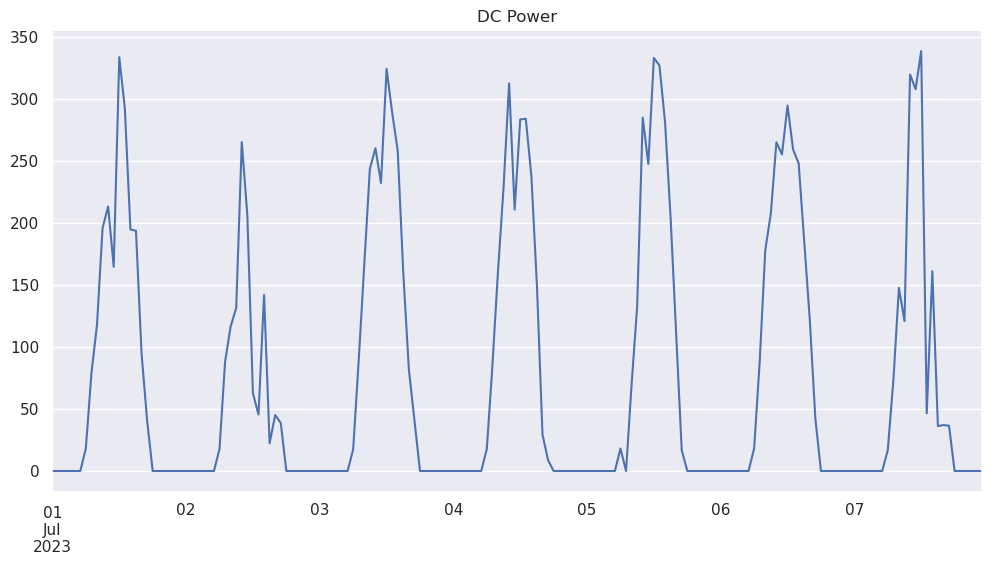

In [20]:
solpos = location.get_solarposition(poa_data.index)

aoi = pvlib.irradiance.aoi(surface_tilt=location.latitude, 
                           surface_azimuth=180, 
                           solar_zenith=solpos.apparent_zenith, 
                           solar_azimuth=solpos.azimuth
                          )

iam = pvlib.iam.ashrae(aoi)

effective_irradiance = poa_data['poa_direct'] * iam + poa_data['poa_diffuse']

temp_cell = pvlib.temperature.faiman(poa_data.poa_global, 
                                     poa_data.temp_air, 
                                     poa_data.wind_speed
                                    )

result_dc = pvlib.pvsystem.pvwatts_dc(g_poa_effective=effective_irradiance,
                                      temp_cell=temp_cell,
                                      pdc0=my_module['STC'],
                                      gamma_pdc=my_module['gamma_r'],
                                      temp_ref=25.0,
                                     )

result_dc.plot(figsize=(12, 6), title='DC Power')

<Axes: title={'center': 'AC Power'}>

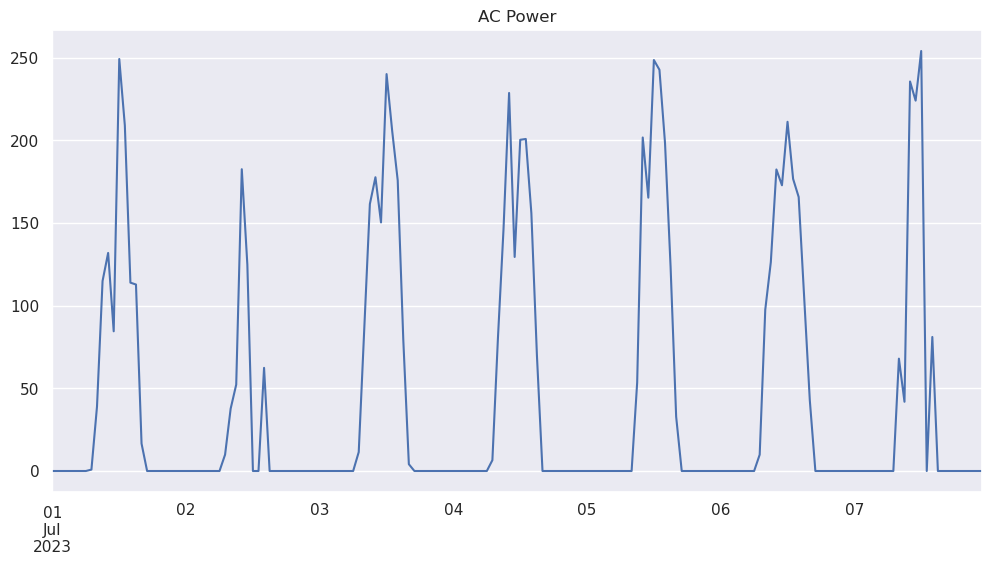

In [21]:
result_ac = pvlib.inverter.pvwatts(pdc=result_dc,
                                   pdc0=13000,
                                   eta_inv_nom=0.97,
                                   eta_inv_ref=0.98
                                  )
result_ac.plot(figsize=(12, 6), title='AC Power')

In [22]:
my_module

{'STC': 440,
 'N_s': 108,
 'V_mp_ref': 33.44,
 'I_mp_ref': 13.16,
 'V_oc_ref': 39.83,
 'I_sc_ref': 13.98,
 'alpha_sc': 0.006291,
 'beta_oc': -0.099575,
 'gamma_r': -0.0029}

<Axes: >

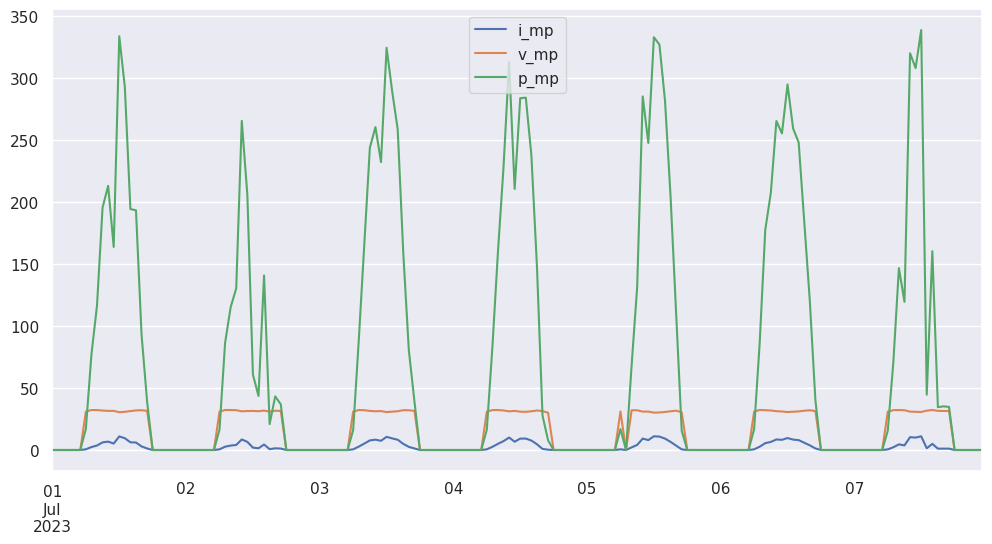

In [23]:
I_L_ref, I_o_ref, R_s, R_sh_ref, a_ref, Adjust = pvlib.ivtools.sdm.fit_cec_sam(celltype='monoSi',
                                                                               v_mp=my_module['V_mp_ref'],
                                                                               i_mp=my_module['I_mp_ref'],
                                                                               v_oc=my_module['V_oc_ref'],
                                                                               i_sc=my_module['I_sc_ref'], 
                                                                               alpha_sc=my_module['alpha_sc'],
                                                                               beta_voc=my_module['beta_oc'],
                                                                               gamma_pmp=my_module['gamma_r'] * 100, # Units is %/C
                                                                               cells_in_series=my_module['N_s'],
                                                                               )

cec_params = pvlib.pvsystem.calcparams_cec(effective_irradiance=effective_irradiance, 
                                           temp_cell=temp_cell, 
                                           alpha_sc=my_module['alpha_sc'], 
                                           a_ref=a_ref,
                                           I_L_ref=I_L_ref,
                                           I_o_ref=I_o_ref,
                                           R_sh_ref=R_sh_ref,
                                           R_s=R_s, 
                                           Adjust=Adjust
                                          )

mpp = pvlib.pvsystem.max_power_point(*cec_params)
mpp.plot(figsize=(12, 6))

<Axes: >

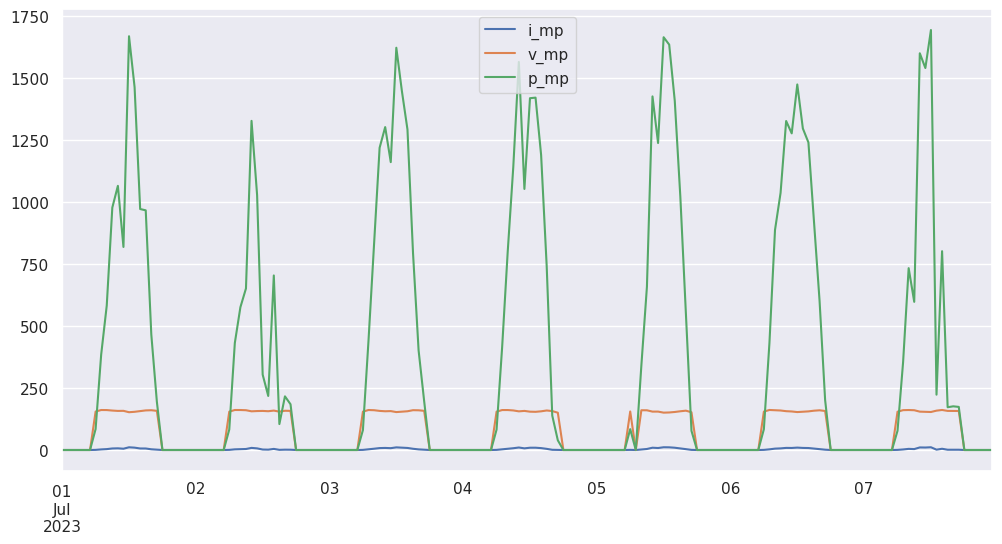

In [24]:
system = PVSystem(modules_per_string=5, strings_per_inverter=1)
dc_scaled = system.scale_voltage_current_power(mpp)
dc_scaled.plot(figsize=(12, 6))

<Axes: >

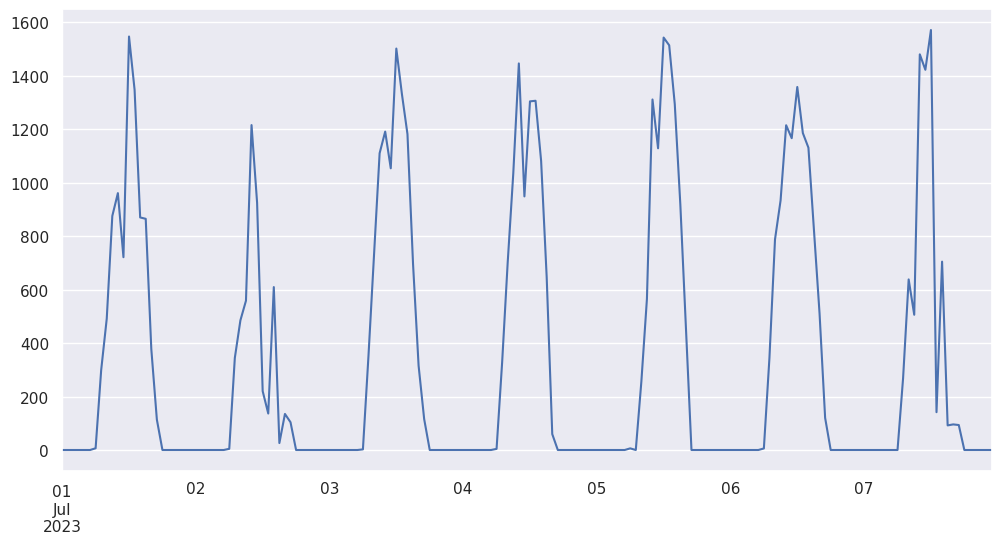

In [25]:
ac_scaled = pvlib.inverter.pvwatts(pdc=dc_scaled.p_mp,
                                   pdc0=13000,
                                   eta_inv_nom=0.97,
                                   eta_inv_ref=0.98
                                  )

ac_scaled.plot(figsize=(12, 6))

<Axes: >

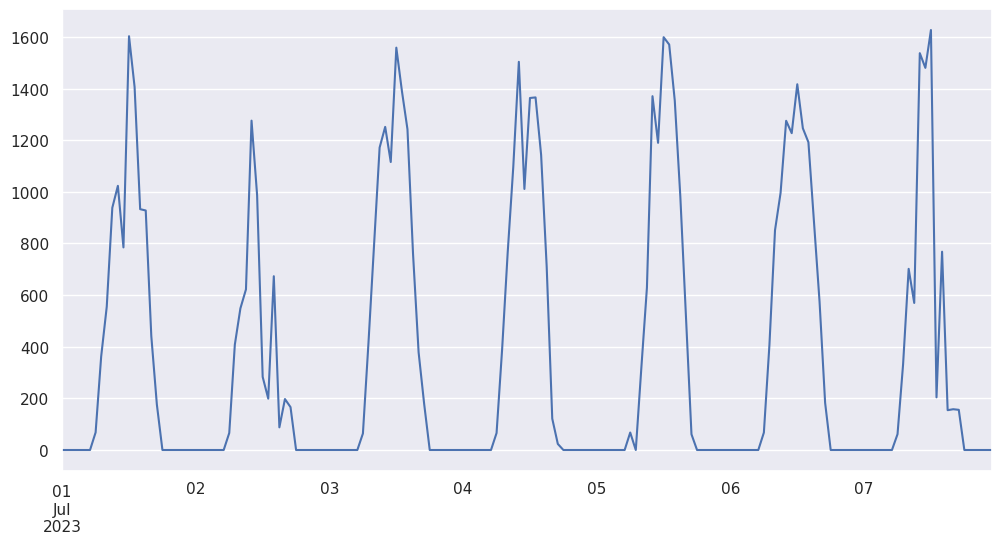

In [26]:
ac_scaled = pvlib.inverter.sandia(v_dc=dc_scaled.v_mp,
                                  p_dc=dc_scaled.p_mp,
                                  inverter=inv
                                 )

ac_scaled.plot(figsize=(12, 6))

### Single axis tracking

<function matplotlib.pyplot.show(close=None, block=None)>

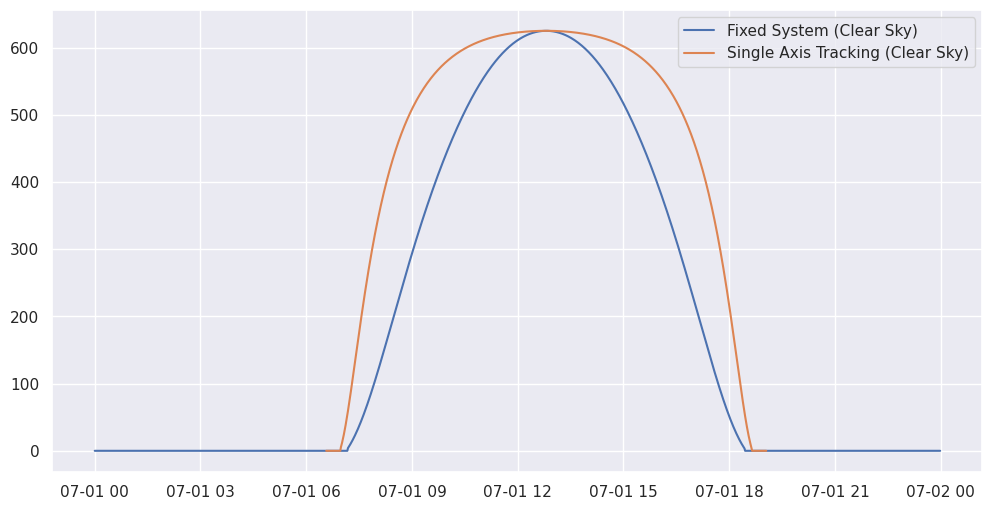

In [29]:
from pvlib.pvsystem import SingleAxisTrackerMount, Array

system = PVSystem(surface_tilt=location.latitude, surface_azimuth=180,
                  module_parameters=mod, inverter_parameters=inv,
                  temperature_model_parameters=temp_params,
                  modules_per_string=4, strings_per_inverter=1
                 )

modelchain = ModelChain(system, location)

start = '2023-07-01 00:00:00'
end = '2023-07-01 23:59:00'

times = pd.date_range(start=start, end=end, freq='1min', tz=location.tz)
clear_sky = location.get_clearsky(times)

modelchain.run_model(clear_sky)
ac_clr = modelchain.results.ac

# poa_data, metadata, inputs = pvlib.iotools.get_pvgis_hourly(latitude=7.451541139578495, longitude=3.889850809097754,
#                                                           start=start, end=end,raddatabase='PVGIS-SARAH3',
#                                                           surface_tilt=location.latitude, surface_azimuth=0,
#                                                           url='https://re.jrc.ec.europa.eu/api/v5_3/'
#                                                            )

# poa_data['poa_diffuse'] = poa_data['poa_sky_diffuse'] + poa_data['poa_ground_diffuse']
# poa_data['poa_global'] = poa_data['poa_diffuse'] + poa_data['poa_direct']

poa_data = poa_data[start:end]
modelchain.run_model_from_poa(poa_data)
ac_poa = modelchain.results.ac

mount = SingleAxisTrackerMount(axis_tilt=location.latitude,
                               axis_azimuth= 180,
                               max_angle=90.0,
                               backtrack=False,
                              )
solpos = location.get_solarposition(poa_data.index)
orientation = mount.get_orientation(solar_zenith=solpos.apparent_zenith, 
                                    solar_azimuth=solpos.azimuth 
                                   )

# orientation['tracker_theta'].fillna(0).plot(title='Tracker Orientaton')
array = Array(mount=mount, 
              module_parameters=mod,
              temperature_model_parameters=temp_params,
              modules_per_string=4,
              strings=1,
             )

system_sat = PVSystem(arrays=[array], inverter_parameters=inv)
modelchain_sat = ModelChain(system_sat, location)


modelchain_sat.run_model(clear_sky)
ac_clr_sat = modelchain_sat.results.ac 

modelchain_sat.run_model_from_poa(poa_data)
ac_poa_sat = modelchain_sat.results.ac 

plt.figure(figsize=(12, 6))
plt.plot(ac_clr, )
plt.plot(ac_clr_sat)
plt.legend(['Fixed System (Clear Sky)', 'Single Axis Tracking (Clear Sky)'])
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

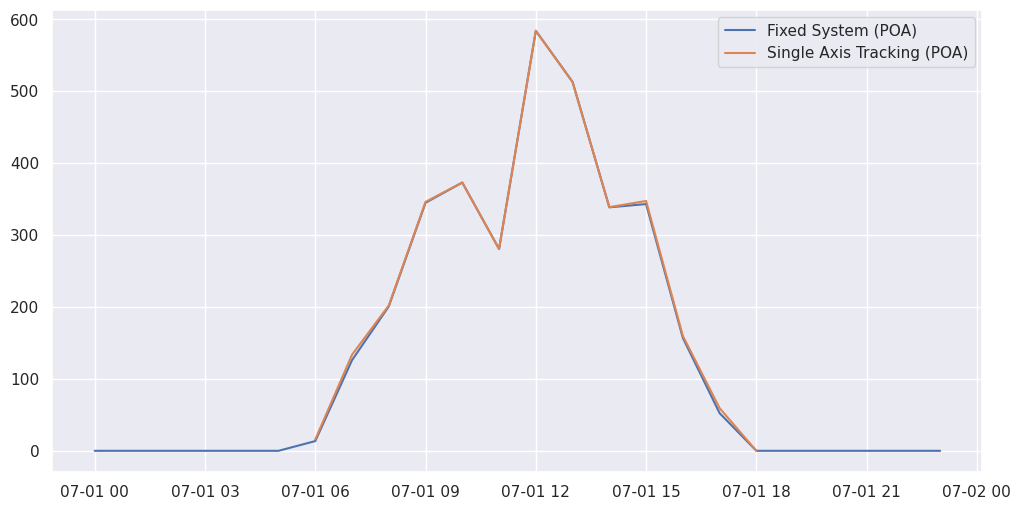

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(ac_poa)
plt.plot(ac_poa_sat)

plt.legend(['Fixed System (POA)', 'Single Axis Tracking (POA)'])
plt.show

### Dual Axis Tracking

<function matplotlib.pyplot.show(close=None, block=None)>

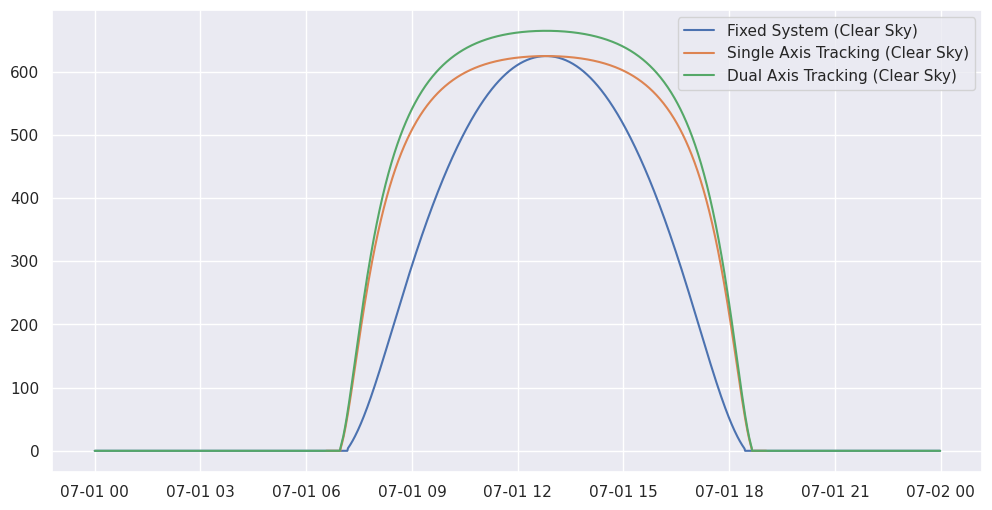

In [35]:
from pvlib.pvsystem import AbstractMount
class DualAxisTrackerMount(AbstractMount):
    def get_orientation(self, solar_zenith, solar_azimuth):
        return {'surface_tilt':solar_zenith, 'surface_azimuth':solar_azimuth}

mount_dat = DualAxisTrackerMount()
array = Array(mount=mount_dat, 
              module_parameters=mod,
              temperature_model_parameters=temp_params,
              modules_per_string=4,
              strings=1,
             )
system_dat = PVSystem(arrays=[array], inverter_parameters=inv)
modelchain_dat = ModelChain(system_dat, location)
modelchain_dat.run_model(clear_sky)
ac_clr_dat = modelchain_dat.results.ac

plt.figure(figsize=(12, 6))
plt.plot(ac_clr )
plt.plot(ac_clr_sat)
plt.plot(ac_clr_dat)
plt.legend(['Fixed System (Clear Sky)', 'Single Axis Tracking (Clear Sky)', 'Dual Axis Tracking (Clear Sky)'])
plt.show

### System with East-West Orientation

In [46]:
location

Location: 
  name: CPEEL
  latitude: 7.451541139578495
  longitude: 3.889850809097754
  altitude: 280.6576
  tz: Africa/Lagos

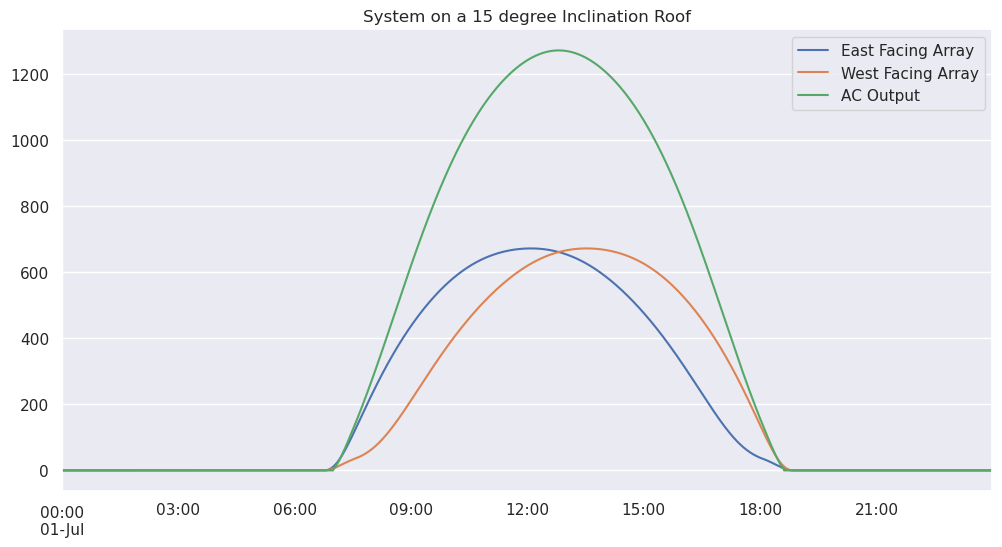

In [53]:
from pvlib.pvsystem import FixedMount, Array

location

start = '2023-07-01 00:00:00'
end = '2023-07-01 23:59:00'

times = pd.date_range(start=start, end=end, freq='1min', tz=location.tz)
clear_sky = location.get_clearsky(times)

arrays = [
    Array(mount=FixedMount(surface_tilt=15, surface_azimuth=90),
          module_parameters=mod,
          temperature_model_parameters=temp_params,
          modules_per_string=4,
          strings=1,
          name='East Facing Array'
         ),
    Array(mount=FixedMount(surface_tilt=15, surface_azimuth=270),
          module_parameters=mod,
          temperature_model_parameters=temp_params,
          modules_per_string=4,
          strings=1,
          name='West Facing Array'
         )
         ]

system = PVSystem(arrays=arrays, inverter_parameters=inv)
modelchain = ModelChain(system, location)
modelchain.run_model(clear_sky)
modelchain.results.dc[0]['p_mp'].plot(figsize=(12, 6), label=system.arrays[0].name)
modelchain.results.dc[1]['p_mp'].plot(figsize=(12, 6), label=system.arrays[1].name)
modelchain.results.ac.plot(figsize=(12, 6), label='AC Output')
plt.title('System on a 15 degree Inclination Roof')
plt.legend()

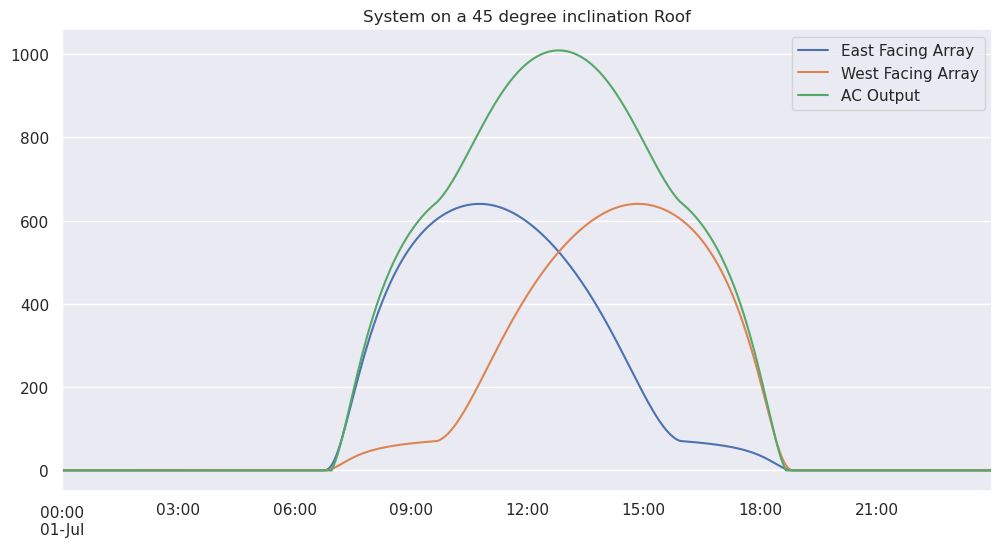

In [49]:
from pvlib.pvsystem import FixedMount, Array

location

start = '2023-07-01 00:00:00'
end = '2023-07-01 23:59:00'

times = pd.date_range(start=start, end=end, freq='1min', tz=location.tz)
clear_sky = location.get_clearsky(times)

arrays = [
    Array(mount=FixedMount(surface_tilt=45, surface_azimuth=90),
          module_parameters=mod,
          temperature_model_parameters=temp_params,
          modules_per_string=4,
          strings=1,
          name='East Facing Array'
         ),
    Array(mount=FixedMount(surface_tilt=45, surface_azimuth=270),
          module_parameters=mod,
          temperature_model_parameters=temp_params,
          modules_per_string=4,
          strings=1,
          name='West Facing Array'
         )
         ]

system = PVSystem(arrays=arrays, inverter_parameters=inv)
modelchain = ModelChain(system, location)
modelchain.run_model(clear_sky)
modelchain.results.dc[0]['p_mp'].plot(figsize=(12, 6), label=system.arrays[0].name)
modelchain.results.dc[1]['p_mp'].plot(figsize=(12, 6), label=system.arrays[1].name)
modelchain.results.ac.plot(figsize=(12, 6), label='AC Output')
plt.title('System on a 45 degree inclination Roof')
plt.legend()

In [15]:
modules = pvlib.pvsystem.retrieve_sam('CECMod')
find_cols(modules, 'Cana' )

Canadian_Solar_Inc__CS5C_80M Canadian_Solar_Inc__CS5C_90M  \
Technology                    Mono-c-Si                    Mono-c-Si   
Bifacial                              0                            0   
STC                               80.15                        89.82   
PTC                                72.7                         82.0   
A_c                               0.664                        0.664   
Length                            1.213                        1.213   
Width                             0.547                        0.547   
N_s                                  36                           36   
I_sc_ref                           4.97                          5.4   
V_oc_ref                           21.8                         22.2   
I_mp_ref                           4.58                         4.99   
V_mp_ref                           17.5                         18.0   
alpha_sc                       0.004423                     0.004806   
beta_oc                       -0.081532                    -0.083028   
T_NOCT                             42.4                         42.4   
a_ref                          0.976234                     0.998612   
I_L_ref                        4.980938                     5.409365   
I_o_ref                             0.0                          0.0   
R_s                            0.326085                     0.263006   
R_sh_ref                     148.161652                   151.660019   
Adjust                        10.454623                    11.377936   
gamma_r                          -0.476                       -0.476   
BIPV                                  N                            N   
Version               SAM 2018.11.11 r2            SAM 2018.11.11 r2   
Date                           1/3/2019                     1/3/2019   

           Canadian_Solar_Inc__CS5T_130M Canadian_Solar_Inc__CS5T_135M  \
Technology                     Mono-c-Si                     Mono-c-Si   
Bifacial                               0                             0   
STC                               129.94                        134.78   
PTC                                113.3                         117.8   
A_c                                1.549                         1.549   
Length                             1.615                         1.615   
Width                              0.959                         0.959   
N_s                                   60                            60   
I_sc_ref                            4.82                          4.95   
V_oc_ref                            36.3                          36.6   
I_mp_ref                            4.45                           4.6   
V_mp_ref                            29.2                          29.3   
alpha_sc                        0.002217                      0.002277   
beta_oc                        -0.132785                     -0.133883   
T_NOCT                              48.6                          48.6   
a_ref                           1.549582                      1.551694   
I_L_ref                         4.831287                      4.958797   
I_o_ref                              0.0                           0.0   
R_s                             0.578812                      0.605825   
R_sh_ref                      247.168396                     340.86554   
Adjust                          3.804579                      2.506149   
gamma_r                          -0.4678                       -0.4678   
BIPV                                   N                             N   
Version                SAM 2018.11.11 r2             SAM 2018.11.11 r2   
Date                            1/3/2019                      1/3/2019   

           Canadian_Solar_Inc__CS5T_140M Canadian_Solar_Inc__CS6C_140P  \
Technology                     Mono-c-Si                    Multi-c-Si   
Bifacial                               0                         

In [65]:
inv

Vac                          208
Pso                    18.166279
Paco                      3000.0
Pdco                  3142.30127
Vdco                       310.0
C0                     -0.000008
C1                     -0.000011
C2                      0.000999
C3                     -0.000287
Pnt                          0.1
Vdcmax                     480.0
Idcmax                 10.136456
Mppt_low                   100.0
Mppt_high                  480.0
CEC_Date                     NaN
CEC_Type     Utility Interactive
Name: ABB__PVI_3_0_OUTD_S_US__208V_, dtype: object

In [66]:
mod

Vintage                                                          2009
Area                                                            1.701
Material                                                         c-Si
Cells_in_Series                                                    96
Parallel_Strings                                                    1
Isco                                                          5.09115
Voco                                                          59.2608
Impo                                                          4.54629
Vmpo                                                          48.3156
Aisc                                                         0.000397
Aimp                                                         0.000181
C0                                                            1.01284
C1                                                           -0.01284
Bvoco                                                        -0.21696
Mbvoc               

In [6]:
# Deffine custom modules
# pvlib.ivtools.sdm.fit_cec_sam -> pvlib.pvsystem.calcparams_cec -> pvlib.pvsystem.singlediode

In [33]:
# Define custom inverters

p_ac_0 = 10000
p_nt = 0.02 * p_ac_0

# Data for each voltage level
data = {"dc_voltage_level": ["Vmin", "Vnom", "Vmax"],
        "dc_voltage": [200, 620, 1000],
        "ac_power": [10000, 10000, 10000],
        "dc_power": [2500, 7750, 13000] 
       }
data = pd.DataFrame(data)
inverter_params = pvlib.inverter.fit_sandia(ac_power=data.ac_power,
                                            dc_power=data.dc_power, 
                                            dc_voltage=data.dc_voltage,
                                            dc_voltage_level=data.dc_voltage_level,
                                            p_ac_0=p_ac_0, 
                                            p_nt=p_nt
                                           )

/home/peter/anaconda3/lib/python3.11/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
/home/peter/anaconda3/lib/python3.11/site-packages/pvlib/inverter.py:515: RuntimeWarning: invalid value encountered in scalar power
  return (-b + (b**2 - 4 * a * c)**.5) / (2 * a)


In [18]:
inverter_params

{'Paco': 10000,
 'Pdco': 8379.427792915521,
 'Vdco': 730.0,
 'Pso': nan,
 'C0': -1.5509091768947642e-05,
 'C1': 0.0018778961060076432,
 'C2': nan,
 'C3': -0.00792360299278082,
 'Pnt': 200.0}